# Project: Impact of Drought on Maple Tree Production

# **1. Data overview and pre-processing**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from google.colab import drive

# drive.mount('/content/drive', force_remount=True)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#loading dataset
maple = pd.read_excel('maple data updated.xlsx', sheet_name='state(northeast)_data')
maple

State    Year  State ANSI   Gallons      Value  \
0            MAINE  1992.0        23.0  153000.0  2433000.0   
1            MAINE  1993.0        23.0  113000.0  1616000.0   
2            MAINE  1994.0        23.0  150000.0  2145000.0   
3            MAINE  1995.0        23.0  162000.0  2965000.0   
4            MAINE  1996.0        23.0  167000.0  3657000.0   
..             ...     ...         ...       ...        ...   
205  MASSACHUSETTS  2017.0        25.0   84000.0  4217000.0   
206  MASSACHUSETTS  2018.0        25.0   72000.0  3816000.0   
207  MASSACHUSETTS  2019.0        25.0   73800.0  3910400.0   
208  MASSACHUSETTS  2020.0        25.0   76360.0  4005680.0   
209  MASSACHUSETTS  2021.0        25.0   76632.0  4049216.0   

     Avg. Temperture (1-Year)  Avg. Temperature (6-Months)  \
0                        39.8                         28.6   
1                        40.0                         27.4   
2                        40.4                         25.6   
3                        40.9                         30.8   
4                        41.0                         27.8   
..                        ...                          ...   
205                      49.6                         41.6   
206                      49.5                         40.7   
207                      48.5                         39.2   
208                      50.9                         40.2   
209                      50.8                         40.6   

     Precipitation (1-Year)  Precipitation (6-Months)        none  ...  \
0                     37.50                     21.83   78.682230  ...   
1                     43.61                     16.67   72.949760  ...   
2                     41.68                     23.79   92.625040  ...   
3                     42.72                     19.92   65.504380  ...   
4                     51.39                     27.40  105.346800  ...   
..                      ...                       ...         ...  ...   
205                   46.82                     20.19   60.019423  ...   
206                   61.03                     24.18   86.728269  ...   
207                   52.74                     33.73   92.949245  ...   
208                   42.40                     23.66   50.270385  ...   
209                   54.81                     23.00   86.753654  ...   

           D2        D3   D4       DSCI  SPI-Drought  SPI-Wet  EMNT(in air)  \
0    1.556237  0.507679  0.0  33.425985        12.93     8.72         -19.0   
1    3.984051  0.382212  0.0  44.001005        14.59     3.18         -31.0   
2    0.909592  0.057492  0.0  12.487768         1.94    17.40         -39.0   
3    0.755967  1.101983  0.0  55.124063        18.36     1.34         -24.0   
4   -0.345300 -0.131820  0.0  -8.365850         0.00    48.71         -20.0   
..        ...       ...  ...        ...          ...      ...           ...   
205  9.547308  0.741346  0.0  76.130000        11.09     9.70          -9.0   
206  0.000000  0.000000  0.0  14.063269         0.85    36.96         -18.0   
207  0.000000  0.000000  0.0   7.050755         0.00    61.11          -9.0   
208  8.601923  2.885192  0.0  96.166731         8.35     6.28          -2.0   
209  0.038462  0.000000  0.0  15.068654         4.95    37.37          -7.0   

     EMXT(in air)  Number of Taps  Yield per Tap  
0            94.0             NaN            NaN  
1            93.0             NaN            NaN  
2            92.0             NaN            NaN  
3            98.0             NaN            NaN  
4            89.0             NaN            NaN  
..            ...             ...            ...  
205          94.0        320000.0          0.263  
206          97.0             NaN            NaN  
207          95.0             NaN            NaN  
208          96.0             NaN            NaN  
209          95.0             NaN            NaN  

[210 rows x 22 columns]

In [ ]:
maple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State                        210 non-null    object 
 1   Year                         210 non-null    float64
 2   State ANSI                   210 non-null    float64
 3   Gallons                      210 non-null    float64
 4   Value                        210 non-null    float64
 5   Avg. Temperture (1-Year)     210 non-null    float64
 6   Avg. Temperature (6-Months)  210 non-null    float64
 7   Precipitation (1-Year)       210 non-null    float64
 8   Precipitation (6-Months)     210 non-null    float64
 9   none                         210 non-null    float64
 10  D0                           210 non-null    float64
 11  D1                           210 non-null    float64
 12  D2                           210 non-null    float64
 13  D3                  

In [ ]:
#convert float to int
maple["Year"]=maple['Year'].astype(int)

In [ ]:
maple.shape

(210, 22)

In [ ]:
maple.head()

State  Year  State ANSI   Gallons      Value  Avg. Temperture (1-Year)  \
0  MAINE  1992        23.0  153000.0  2433000.0                      39.8   
1  MAINE  1993        23.0  113000.0  1616000.0                      40.0   
2  MAINE  1994        23.0  150000.0  2145000.0                      40.4   
3  MAINE  1995        23.0  162000.0  2965000.0                      40.9   
4  MAINE  1996        23.0  167000.0  3657000.0                      41.0   

   Avg. Temperature (6-Months)  Precipitation (1-Year)  \
0                         28.6                   37.50   
1                         27.4                   43.61   
2                         25.6                   41.68   
3                         30.8                   42.72   
4                         27.8                   51.39   

   Precipitation (6-Months)       none  ...        D2        D3   D4  \
0                     21.83   78.68223  ...  1.556237  0.507679  0.0   
1                     16.67   72.94976  ...  3.984051  0.382212  0.0   
2                     23.79   92.62504  ...  0.909592  0.057492  0.0   
3                     19.92   65.50438  ...  0.755967  1.101983  0.0   
4                     27.40  105.34680  ... -0.345300 -0.131820  0.0   

        DSCI  SPI-Drought  SPI-Wet  EMNT(in air)  EMXT(in air)  \
0  33.425985        12.93     8.72         -19.0          94.0   
1  44.001005        14.59     3.18         -31.0          93.0   
2  12.487768         1.94    17.40         -39.0          92.0   
3  55.124063        18.36     1.34         -24.0          98.0   
4  -8.365850         0.00    48.71         -20.0          89.0   

   Number of Taps  Yield per Tap  
0             NaN            NaN  
1             NaN            NaN  
2             NaN            NaN  
3             NaN            NaN  
4             NaN            NaN  

[5 rows x 22 columns]

In [ ]:
#check missing value
maple.isna().sum()

State                           0
Year                            0
State ANSI                      0
Gallons                         0
Value                           0
Avg. Temperture (1-Year)        0
Avg. Temperature (6-Months)     0
Precipitation (1-Year)          0
Precipitation (6-Months)        0
none                            0
D0                              0
D1                              0
D2                              0
D3                              0
D4                              0
DSCI                            0
SPI-Drought                     0
SPI-Wet                         0
EMNT(in air)                    0
EMXT(in air)                    0
Number of Taps                 64
Yield per Tap                  64
dtype: int64

In [ ]:
type(maple.State.unique())

numpy.ndarray

In [ ]:
# Fill in with state mean
temp1 = maple.groupby('State')['Number of Taps'].mean().round(2).reset_index().sort_values('State')
temp2 = maple.groupby('State')['Yield per Tap'].mean().round(2).reset_index().sort_values('State')
for i,j in enumerate(temp1.State):
  maple.loc[(maple['Number of Taps'].isna()) & (maple['State'] == j),'Number of Taps']= temp1['Number of Taps'][i]
  maple.loc[(maple['Yield per Tap'].isna()) & (maple['State'] == j),'Yield per Tap']= temp2['Yield per Tap'][i]

In [ ]:
#describe
maple.iloc[:,3:].describe()

Gallons         Value  Avg. Temperture (1-Year)  \
count  2.100000e+02  2.100000e+02                210.000000   
mean   2.786344e+05  9.138970e+06                 46.180000   
std    3.887350e+05  1.213254e+07                  3.322992   
min    7.000000e+03  2.810000e+05                 39.800000   
25%    5.200000e+04  1.829000e+06                 43.325000   
50%    1.310000e+05  4.257000e+06                 46.150000   
75%    3.562500e+05  1.064675e+07                 48.875000   
max    2.070000e+06  5.796000e+07                 52.500000   

       Avg. Temperature (6-Months)  Precipitation (1-Year)  \
count                   210.000000              210.000000   
mean                     36.193333               46.612286   
std                       4.033455                6.367992   
min                      25.600000               29.830000   
25%                      33.600000               42.295000   
50%                      36.450000               46.030000   
75%                      39.200000               50.030000   
max                      44.800000               64.040000   

       Precipitation (6-Months)        none          D0          D1  \
count                210.000000  210.000000  210.000000  210.000000   
mean                  22.515238   78.511290   13.596630    5.763089   
std                    4.070452   20.385008   10.007286    7.831793   
min                   12.330000    8.235472   -3.120220   -7.741900   
25%                   20.197500   64.757885    5.627500    0.000000   
50%                   22.130000   84.983455   12.282896    2.599902   
75%                   24.755000   94.020032   21.042163   10.156604   
max                   35.610000  111.779500   39.731923   38.367692   

               D2          D3          D4        DSCI  SPI-Drought  \
count  210.000000  210.000000  210.000000  210.000000   210.000000   
mean     1.850746    0.278199    0.000005   31.787869     7.281143   
std      5.150238    1.458791    0.000078   38.409261    10.525411   
min     -4.376920   -1.067307    0.000000  -28.356470     0.000000   
25%      0.000000    0.000000    0.000000    4.411841     0.400000   
50%      0.000000    0.000000    0.000000   18.825580     2.420000   
75%      1.379321    0.000000    0.000000   48.890725    10.122500   
max     34.807170   14.326538    0.001132  208.081698    55.460000   

          SPI-Wet  EMNT(in air)  EMXT(in air)  Number of Taps  Yield per Tap  
count  210.000000    210.000000    210.000000    2.100000e+02     210.000000  
mean    25.388619     -9.842857     93.933333    1.233761e+06       0.223262  
std     20.704478     13.991764      4.346844    1.286764e+06       0.052597  
min      0.000000    -44.000000     83.000000    5.700000e+04       0.115000  
25%      8.600000    -20.000000     91.000000    2.577778e+05       0.190000  
50%     21.465000     -8.500000     94.000000    6.650000e+05       0.217000  
75%     36.460000      1.750000     97.000000    1.809727e+06       0.252250  
max     89.040000     19.000000    104.000000    6.000000e+06       0.410000

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

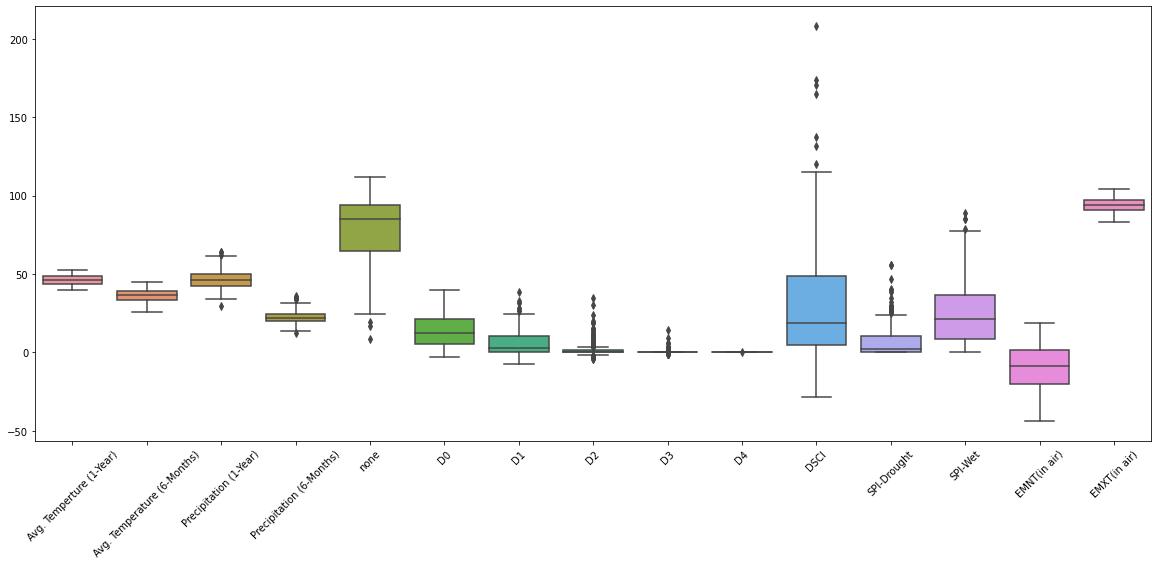

In [ ]:
#outlier check
import seaborn as sns 
plt.rcParams['figure.figsize']=[20,8] 
sns.boxplot(data=maple.iloc[:,5:20]) 
plt.xticks(rotation=45)

We also checked the outliers for each independent variable, from the boxplot, we can see our dataset has some outliers in a statistical sense, but ther are real value. The variables such as precipitation and drought level are unpredictable and vary year by year, so we didn't deal with those “outliers” for the futher regression analysis.

In [ ]:
# We used linear regression to fill in drought mitigator (none, D1-D4)
# There are none > 100 value; D1-D4 <0; 
# We interpret that as a tendency towards more likely to be drought or not;
# Model can be useful for prediction in similar situation
maple[(maple['none'] > 100) | (maple['D0'] < 0) | (maple['D1'] < 0)| (maple['D2'] < 0)\
      |(maple['D3'] < 0)]

State  Year  State ANSI   Gallons       Value  \
4            MAINE  1996        23.0  167000.0   3657000.0   
5            MAINE  1997        23.0  185000.0   3663000.0   
7            MAINE  1999        23.0  190000.0   3686000.0   
30         VERMONT  1992        50.0  570000.0  12711000.0   
31         VERMONT  1993        50.0  310000.0   7440000.0   
32         VERMONT  1994        50.0  435000.0  10397000.0   
34         VERMONT  1996        50.0  550000.0  14575000.0   
35         VERMONT  1997        50.0  395000.0  10902000.0   
36         VERMONT  1998        50.0  375000.0  10875000.0   
37         VERMONT  1999        50.0  370000.0  10730000.0   
60   NEW HAMPSHIRE  1992        33.0   94000.0   3093000.0   
61   NEW HAMPSHIRE  1993        33.0   66000.0   2343000.0   
62   NEW HAMPSHIRE  1994        33.0   73000.0   2540000.0   
64   NEW HAMPSHIRE  1996        33.0   89000.0   3311000.0   
65   NEW HAMPSHIRE  1997        33.0   76000.0   3055000.0   
66   NEW HAMPSHIRE  1998        33.0   70000.0   2534000.0   
67   NEW HAMPSHIRE  1999        33.0   63000.0   2356000.0   
91        NEW YORK  1993        36.0  180000.0   3366000.0   
92        NEW YORK  1994        36.0  251000.0   6150000.0   
94        NEW YORK  1996        36.0  343000.0   8747000.0   
95        NEW YORK  1997        36.0  269000.0   6752000.0   
96        NEW YORK  1998        36.0  263000.0   7062000.0   
121   PENNSYLVANIA  1993        42.0   40000.0    964000.0   
122   PENNSYLVANIA  1994        42.0   59000.0   1528000.0   
124   PENNSYLVANIA  1996        42.0   71000.0   1747000.0   
125   PENNSYLVANIA  1997        42.0   63000.0   1638000.0   
126   PENNSYLVANIA  1998        42.0   72000.0   1872000.0   
150    CONNECTICUT  1992         9.0   12000.0    504000.0   
151    CONNECTICUT  1993         9.0   10000.0    432000.0   
152    CONNECTICUT  1994         9.0   11000.0    471000.0   
154    CONNECTICUT  1996         9.0   10000.0    427000.0   
155    CONNECTICUT  1997         9.0    9000.0    375000.0   
156    CONNECTICUT  1998         9.0    9000.0    370000.0   
180  MASSACHUSETTS  1992        25.0   50000.0   1740000.0   
181  MASSACHUSETTS  1993        25.0   33000.0   1112000.0   
182  MASSACHUSETTS  1994        25.0   40000.0   1456000.0   
184  MASSACHUSETTS  1996        25.0   49000.0   1906000.0   

     Avg. Temperture (1-Year)  Avg. Temperature (6-Months)  \
4                        41.0                         27.8   
5                        39.8                         30.1   
7                        43.8                         31.5   
30                       40.6                         31.5   
31                       41.2                         30.4   
32                       41.3                         28.1   
34                       42.0                         30.8   
35                       41.1                         33.7   
36                       45.2                         33.6   
37                       44.3                         35.1   
60                       41.8                         33.6   
61                       42.5                         31.4   
62                       42.7                         30.2   
64                       43.0                         31.9   
65                       42.3                         34.0   
66                       46.0                         34.8   
67                       45.4                         35.6   
91                       44.2                         36.7   
92                       44.3                         34.2   
94                       44.5                         35.4   
95                       44.3                         37.8   
96                       48.3                         39.8   
121                      48.2                         34.8   
122                      48.0                         32.8   
124                      47.6                         34.2   
125                      48.0               

# **2. Exploratory Data Analysis**
- 2.1: Overall production of each state 
- 2.2: Overall correlation heatmap
- 2.3: Average Temperature  on gallons 
- 2.4: Average Temperature on Value
- 2.5: Extreme Maximum Air Temperature on Gallons
- 2.6: Extreme Minimum Air Temperature on Gallons
- 2.7: Average Precipitation on gallons
- 2.8: SPI drought (including d0-d4)




## 2.1 Overall production of each state


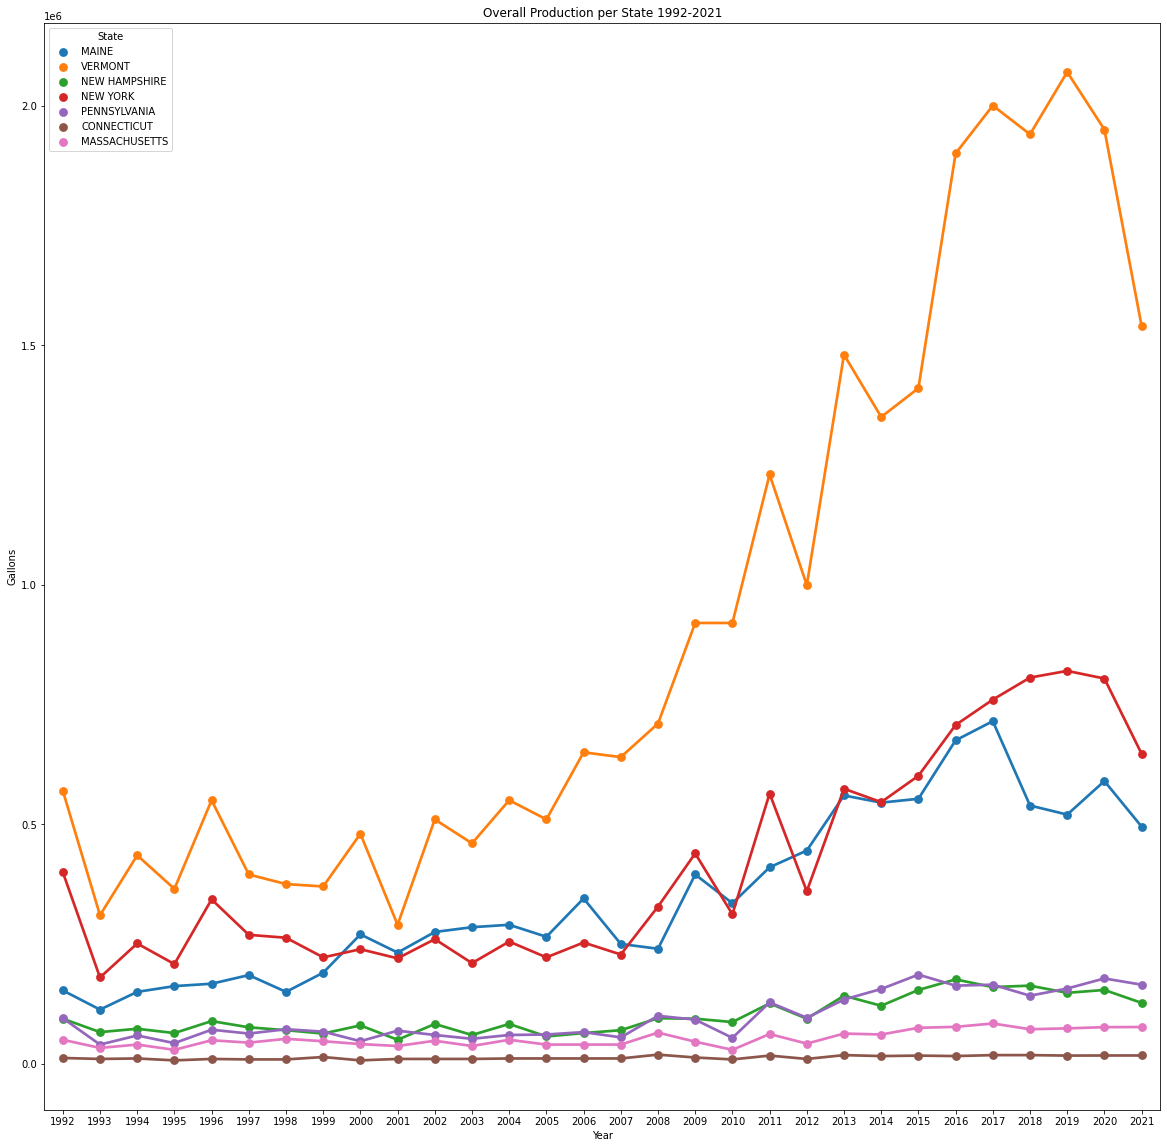

In [ ]:
#top 3 states (Maine, Vermont, New York)
plt.figure(figsize=(20,20))
plt.title('Overall Production per State 1992-2021')
sns.pointplot(x='Year',y='Gallons',hue='State',data=maple);

In [ ]:
#each state
def stateplot(state='MASSACHUSETTS'):
  df = maple[maple['State']==state]
  df.plot.line(x = 'Year', y ='Gallons')
  plt.title(state)

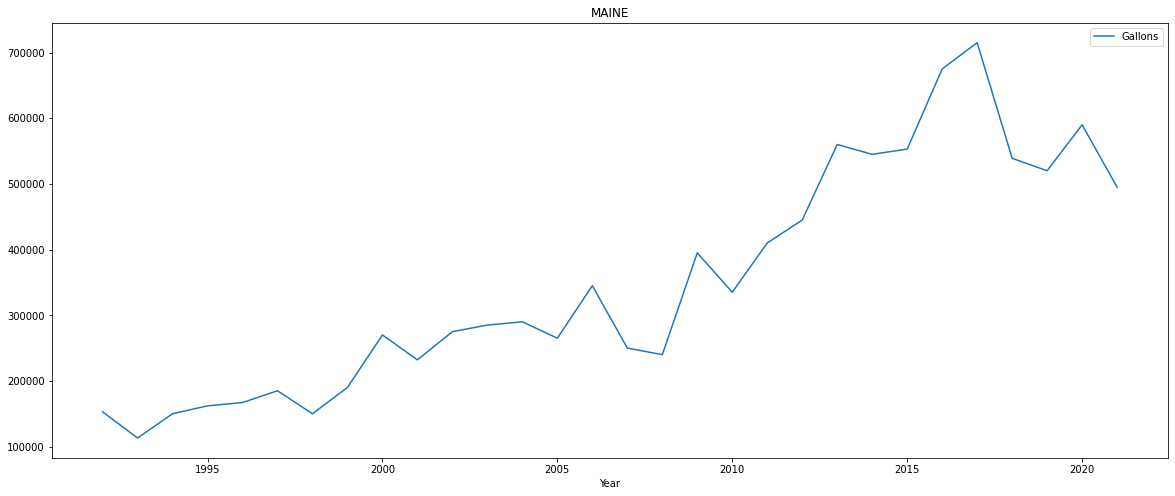

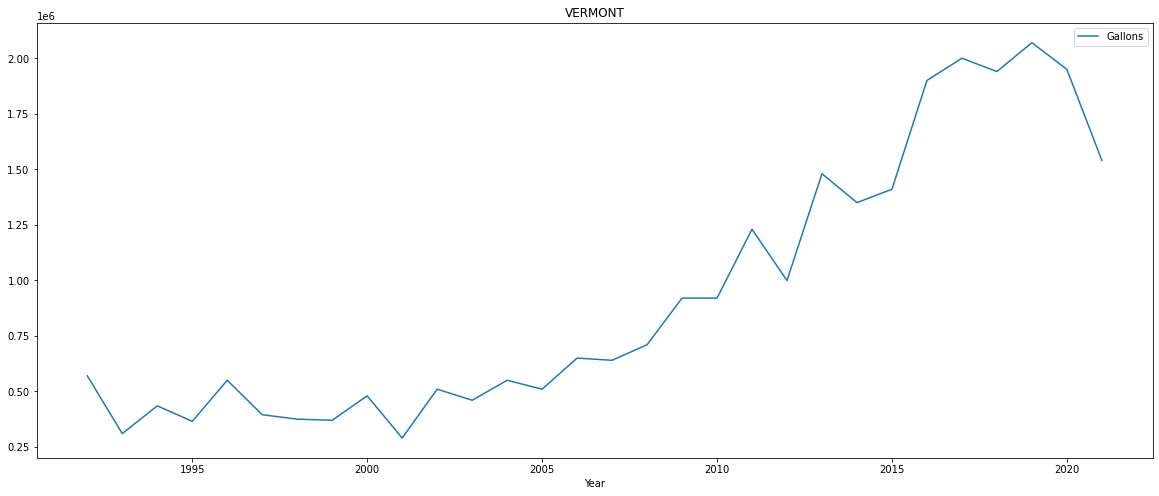

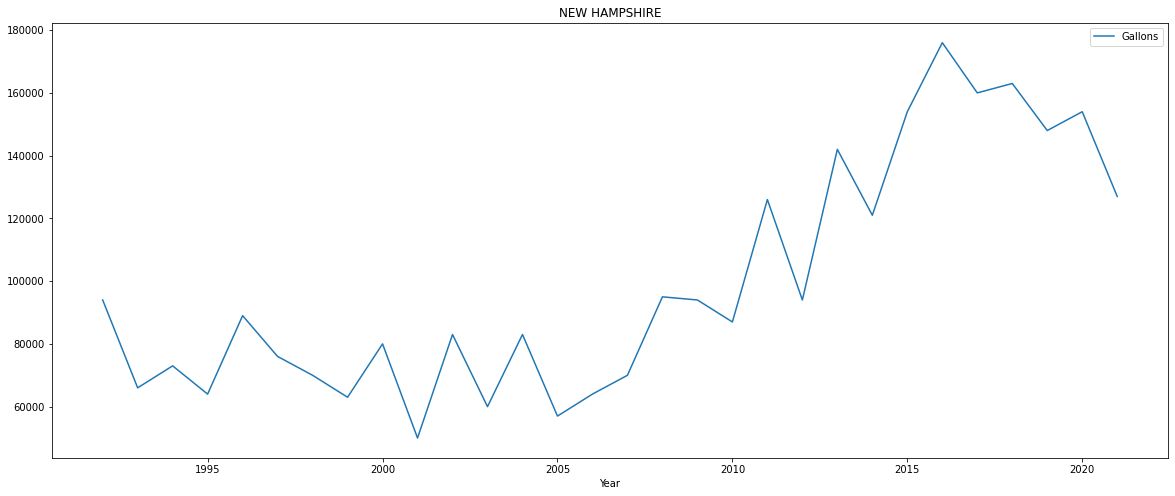

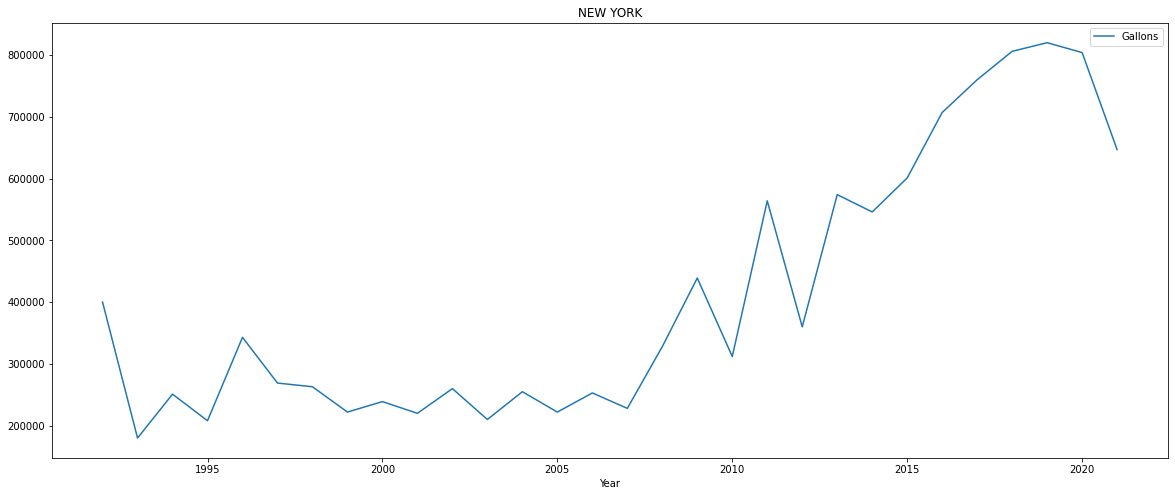

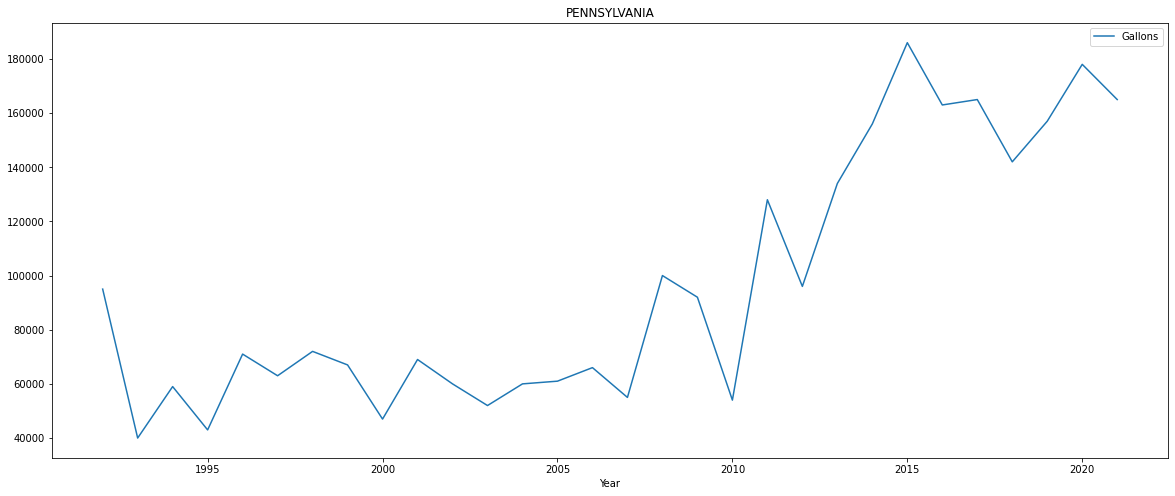

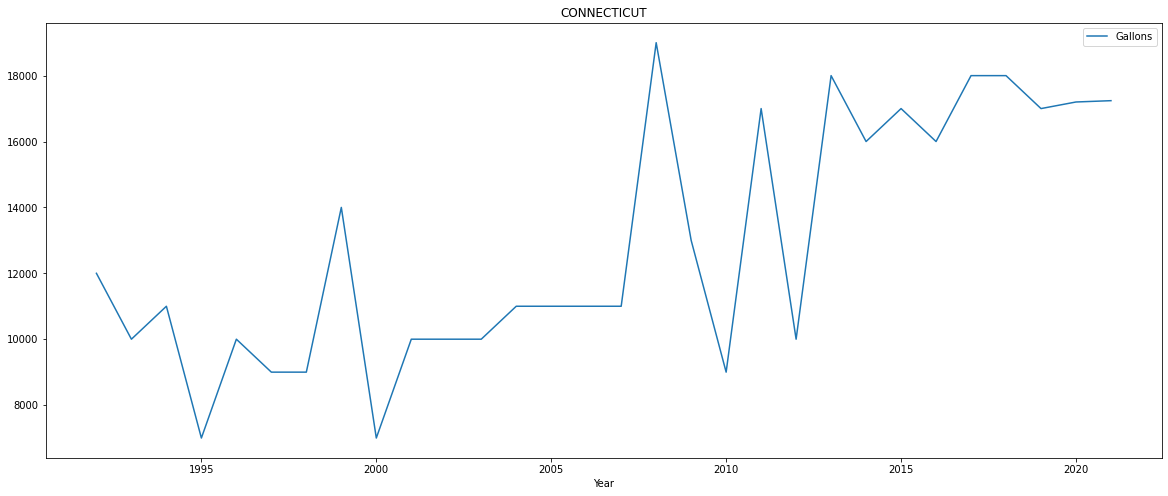

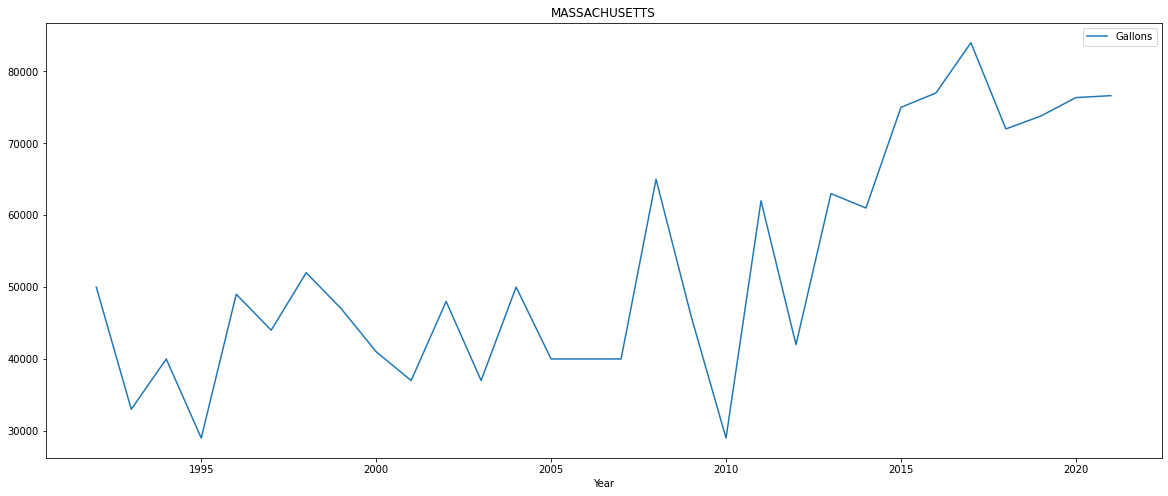

In [ ]:
for i in maple.State.unique():
  stateplot(i)

1. 2010, 2012 and 2021 are years that the maple syrup production in
gallons decreased dramatically.


*  According to *New England Agriculture Statistics*, "the 2012 maple syrup season in New England was considered too warm. A series of heat waves in March ended the season for many, and resulted in a significant drop in maple syrup production. An exception was Maine, where temperatures were cool enough in top-producing".

  https://www.uvm.edu/sites/default/files/Agriculture/maple-nass-2012.pdf



* Low production in 2021 was due to poor weather, which included warm weather in March that ended the season early, and low sugar content that meant producers had to boil more sap to make a gallon of syrup.

  https://www.wamc.org/new-england-news/2021-06-11/maple-production-off-in-2021


2. From the production time series chart, Vermont, NY, Maine are the three states that produced the most maple syrup in gallons.

## 2.2 Overall correlation heatmap

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


Text(0.5, 1.0, 'Heatmap-correlation matrix')

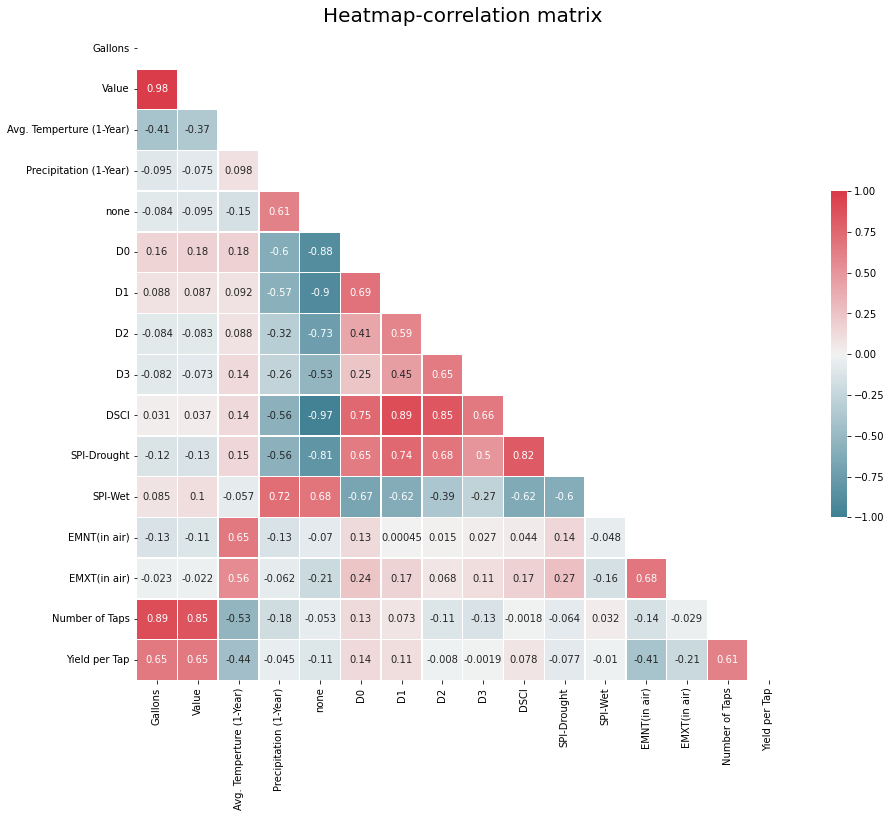

In [ ]:
#drop d4 because sum(d4)=0
maple[['D4']].sum()
#heatmap
maple_heatmap=maple[['Gallons','Value', 'Avg. Temperture (1-Year)',
       'Precipitation (1-Year)','none', 'D0', 'D1',
      'D2', 'D3', 'DSCI', 'SPI-Drought', 'SPI-Wet','EMNT(in air)', 'EMXT(in air)','Number of Taps','Yield per Tap']]
  
corr=maple_heatmap.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    corr,          
    mask=mask,    
    cmap=cmap,    
    annot=True,    
    vmax=1,      
    vmin=-1,     
    center=0,     
    square=True,  
    linewidths=.5, 
    cbar_kws={"shrink": .5} )
ax.set_title('Heatmap-correlation matrix',fontsize = 20)
#plt.show()

We created a correlation heatmap based on all the variables. The chart shows that gallons, value and number of taps are highly correlated and have a positive relationship. At the same time, there is a moderate negative correlation between average temperature and both gallons and value. We need to consider the multicollinearity issue for further machine learning since all the drought-related variables such as precipitation, SPI-drought, SPI-wet, DSCI, and D0 to D3 were highly correlated.

## 2.3 Average Temperature on gallons

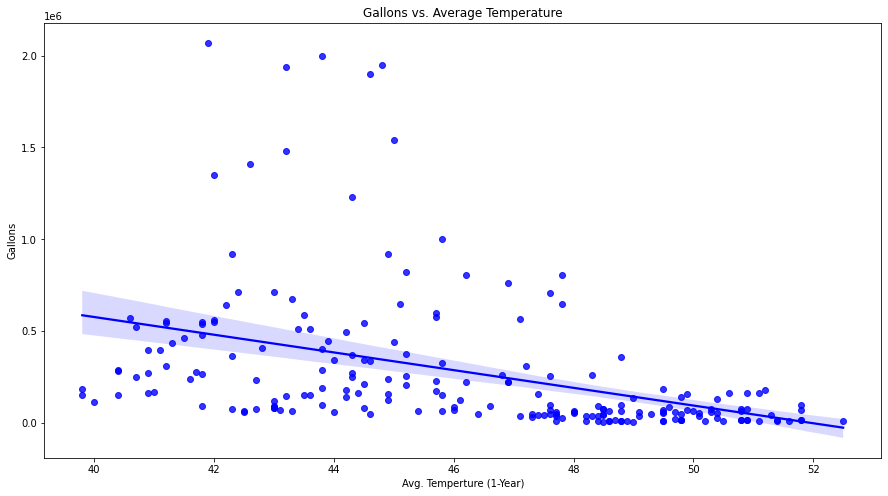

In [ ]:
# Negative Correlation between temperature and gallons

import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.regplot(x=maple[['Avg. Temperture (1-Year)']], y=maple[['Gallons']], data=maple, color = 'blue').set(title='Gallons vs. Average Temperature');

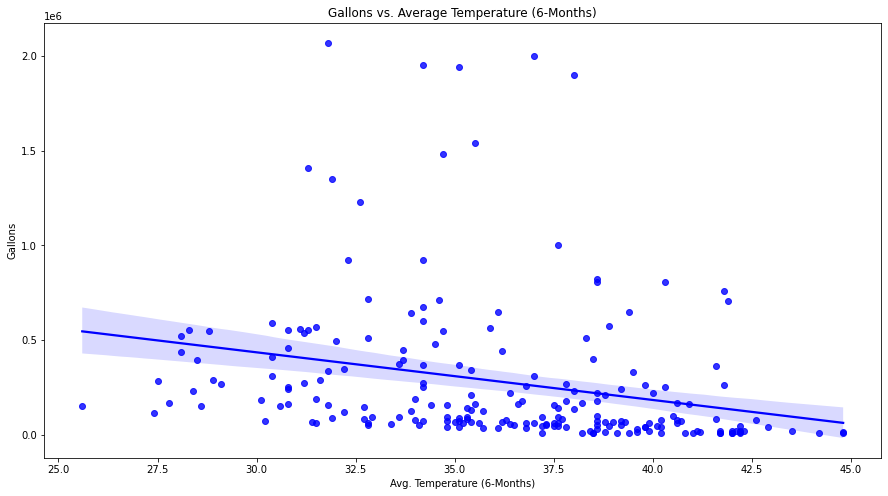

In [ ]:
# Not much difference between average temp (6-months) and gallons
plt.figure(figsize=(15,8))
sns.regplot(x='Avg. Temperature (6-Months)', y='Gallons', data=maple, color = 'blue').set(title='Gallons vs. Average Temperature (6-Months)');

We found a negative correlation between average temperature and gallons. This supports a study from UW-Extension that warmer weather stops enzymes in tree roots to stop producing sugar in tree sap and could also lead to tree root damage, leading to a reduction in sap flow which leads to a reduction in gallon production. These two features have a slope of -3.84 and an R-Squared value of 18%, which means that the annual average temperature can explain 18% of the change in gallons.

##2.4 Average Temperature  on Value

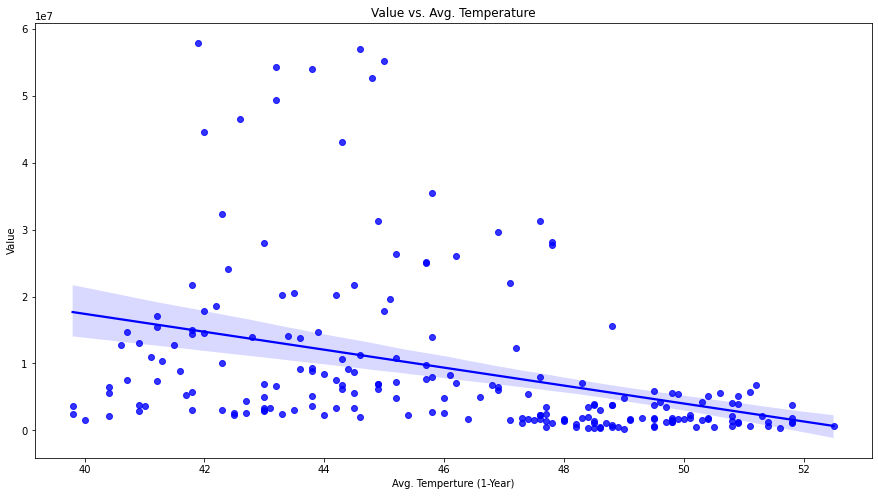

In [ ]:
# Value on temperature 
plt.figure(figsize=(15,8))
sns.regplot(x=maple[['Avg. Temperture (1-Year)']], y=maple[['Value']], data=maple, color = 'blue').set(title='Value vs. Avg. Temperature');

There is a negative correlation between average temperature and value, which makes sense since a reduction in gallons would reduce the total monetary value for syrup manufacturers. These two features have a slope of -1.10 and an R-Squared value of 15%, slightly lower than that between average temperature and gallons. This makes sense as gallons would be more directly correlated with temperature than monetary value temperature. 

##2.5 Extreme Maximum Air Temperature on Gallons

In [ ]:
maple.columns

Index(['State', 'Year', 'State ANSI', 'Gallons', 'Value',
       'Avg. Temperture (1-Year)', 'Avg. Temperature (6-Months)',
       'Precipitation (1-Year)', 'Precipitation (6-Months)', 'none', 'D0',
       'D1', 'D2', 'D3', 'D4', 'DSCI', 'SPI-Drought', 'SPI-Wet',
       'EMNT(in air)', 'EMXT(in air)', 'Number of Taps', 'Yield per Tap'],
      dtype='object')

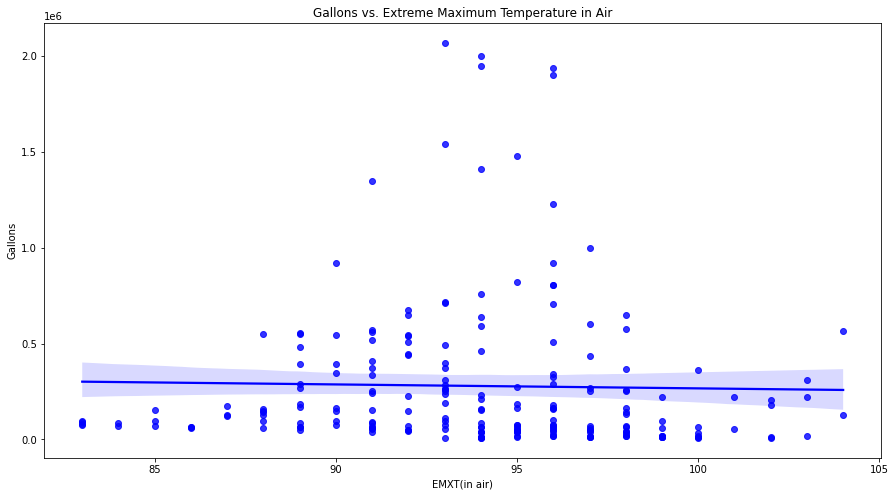

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=maple[['EMXT(in air)']], y=maple[['Gallons']], data=maple, color = 'blue').set(title='Gallons vs. Extreme Maximum Temperature in Air');

From the graph above we do not see a clear relationship between extreme maximum temperature and gallon production of maple syrup. The majority of the values of gallons production are nearing zero production which is expected given the extreme temperature in the air.



##2.6 Extreme Minimum Air Temperature on Gallons

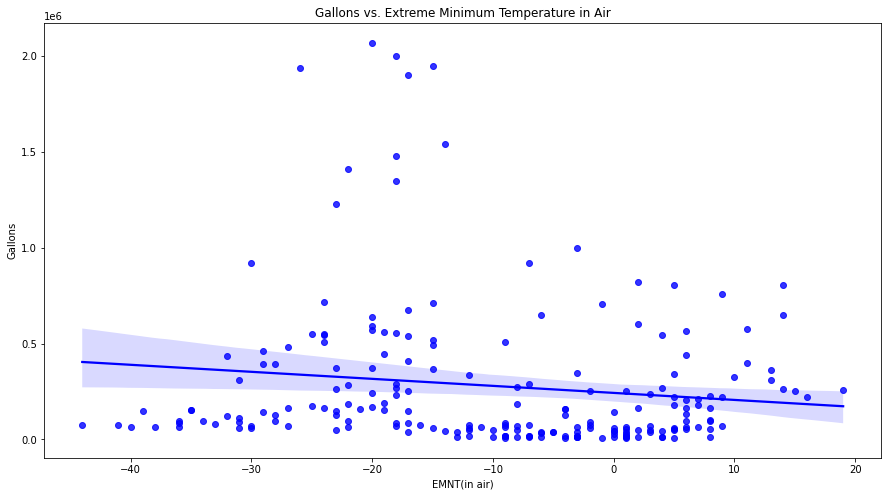

In [ ]:
# Gallons on min temperature 
plt.figure(figsize=(15,8))
sns.regplot(x=maple[['EMNT(in air)']], y=maple[['Gallons']], data=maple, color = 'blue').set(title='Gallons vs. Extreme Minimum Temperature in Air');

From the graph above we see a very slight negative relationship between extreme minimum temperature and gallon production of maple syrup. The majority of the values of gallons production are nearing zero production which is expected given the extreme temperature in the air.


##2.7 Average Precipitation on gallons 


###12-month Average Precipitation

In [ ]:
def stateplot1(state='MASSACHUSETTS'):
  df = maple[maple['State']==state]
  fig, ax = plt.subplots() 
  df.plot(x = 'Year', y = 'Precipitation (1-Year)', ax = ax) 
  df.plot(x = 'Year', y = 'Gallons', ax = ax, secondary_y = True)
  plt.title(state) 

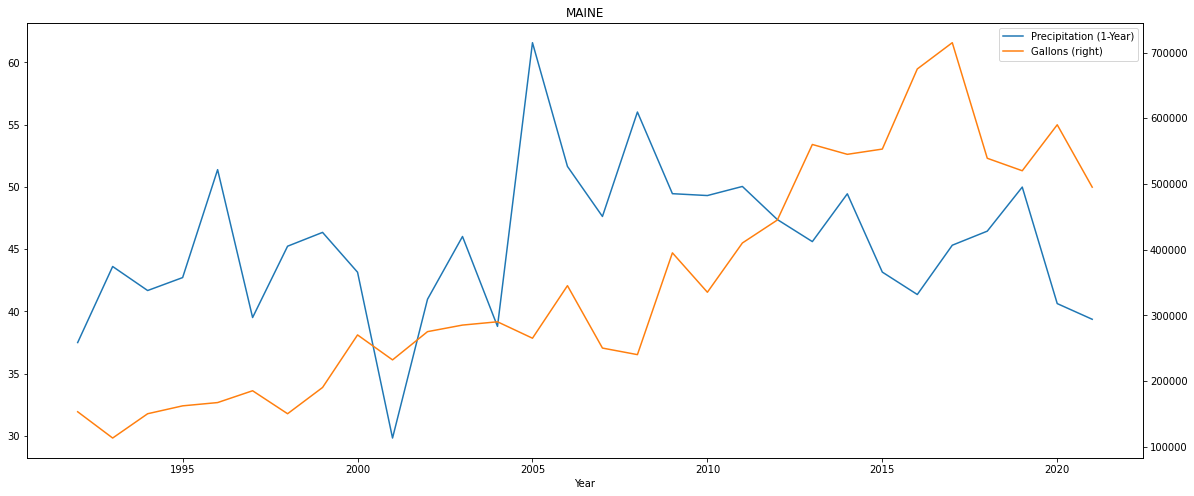

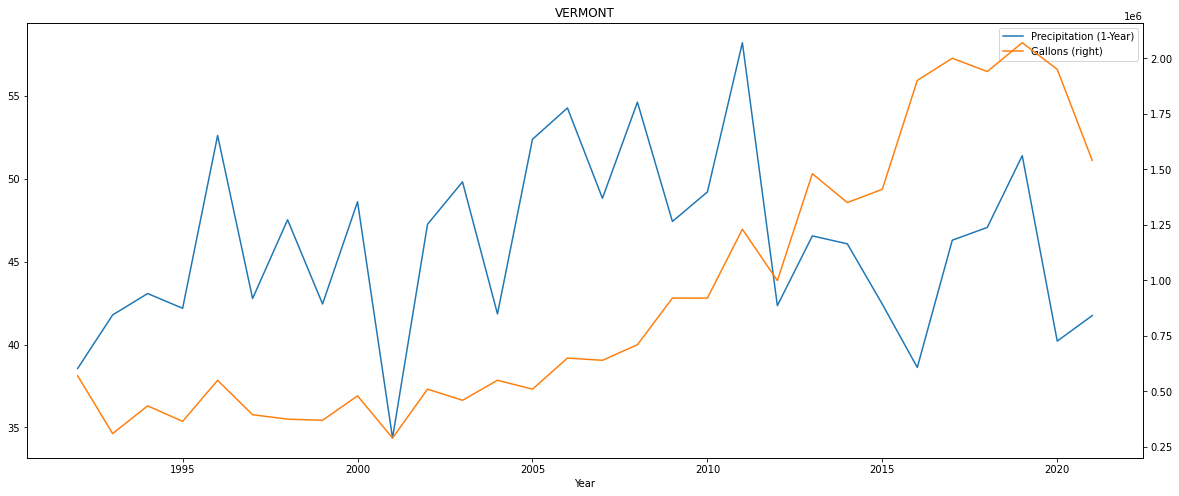

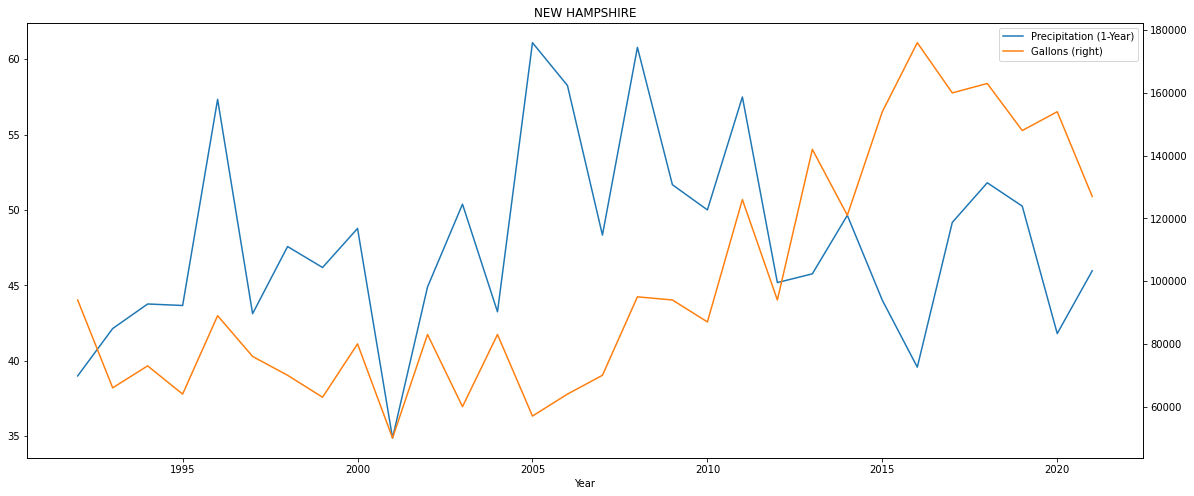

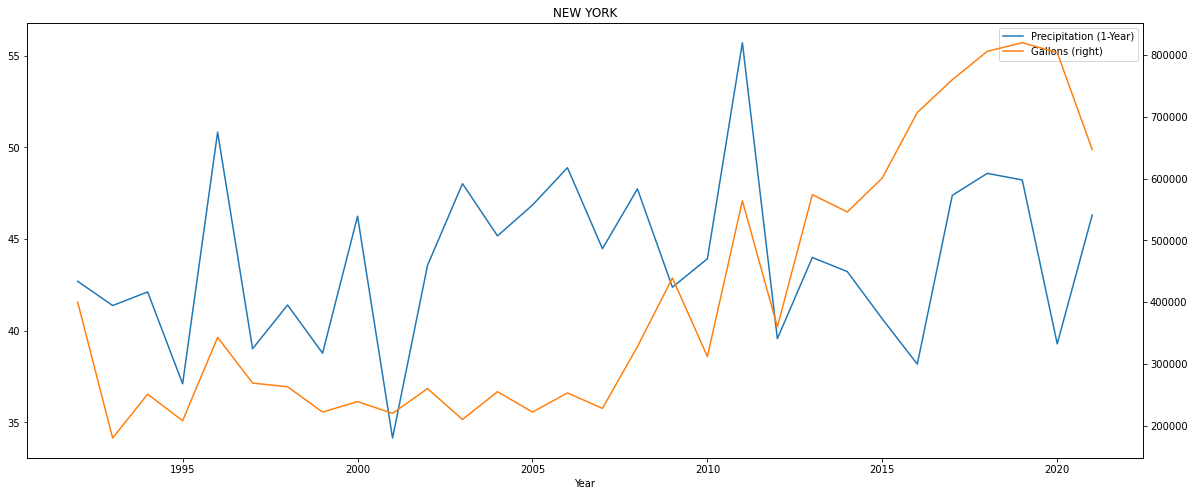

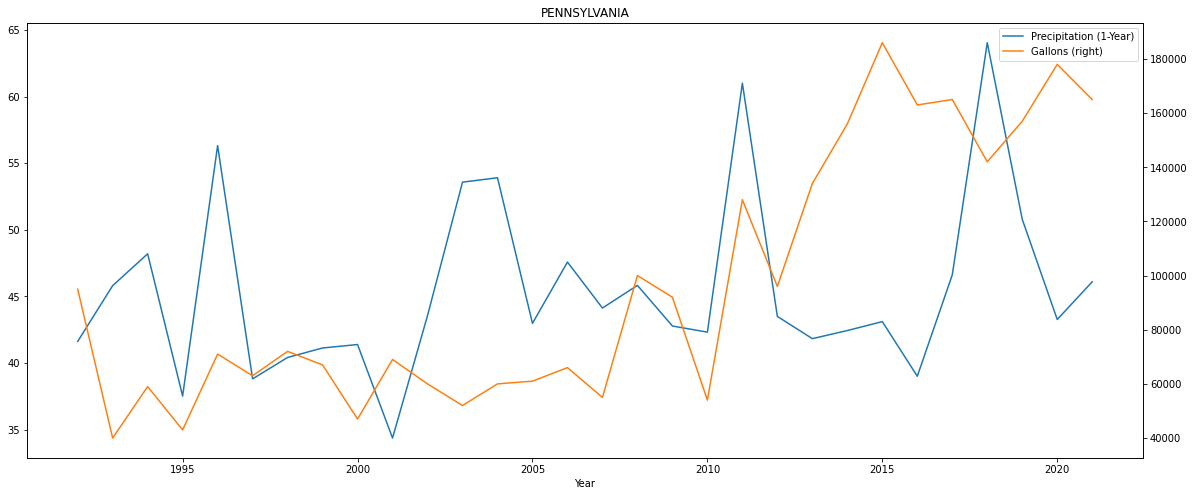

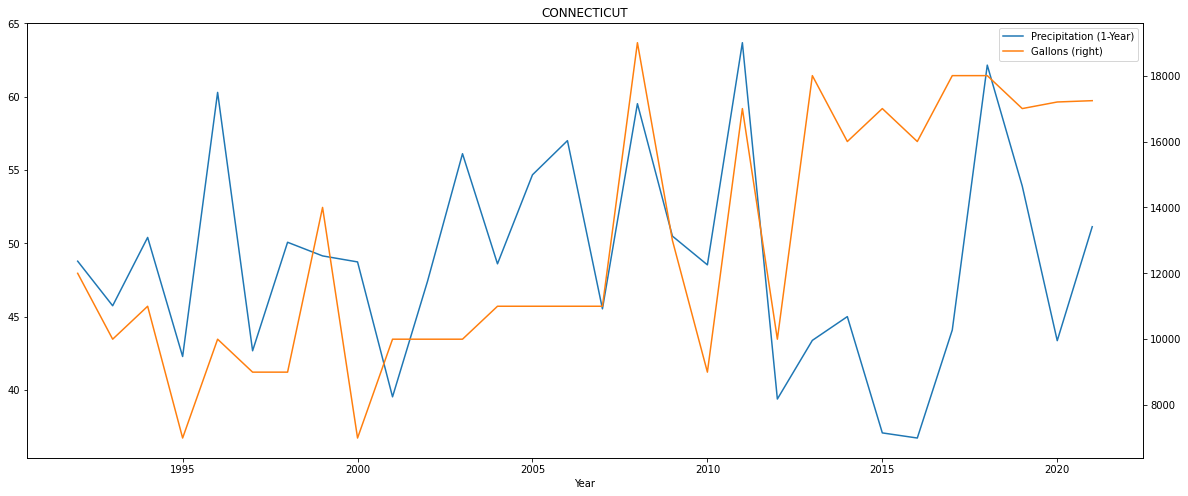

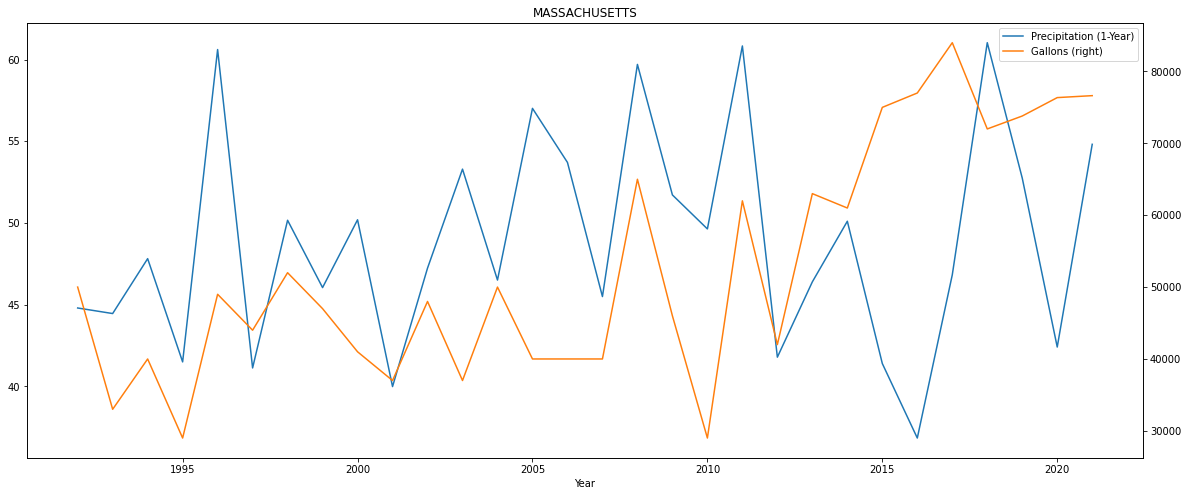

In [ ]:
for i in maple.State.unique():
  stateplot1(i)

For some states, the reduction of precipitation does not necessariliy mean intense reduction in production. This is because apart from precipitation, other factors could affect the production of maple syrup as well.

###6-month Average Precipitation 

1. After considering maple trees' growing season, we found that the coefficient for 6-months-precipitation over production in gallons is almost six times of that of 12-months. Also, it is statistically significant(under the confidence level of 95%). Thus we believe that precipitation, especially during the maple syrup growing period, is crucial to maple syrup's production. 

2. Although the R-squared is still not ideal, we believe that this is because we have not consider other factors such as temperature, drought-level and others. 

In [ ]:
def stateplot1(state='MASSACHUSETTS'):
  df = maple[maple['State']==state]
  fig, ax = plt.subplots() 
  df.plot(x = 'Year', y = 'Precipitation (6-Months)', ax = ax) 
  df.plot(x = 'Year', y = 'Gallons', ax = ax, secondary_y = True)
  plt.title(state) 

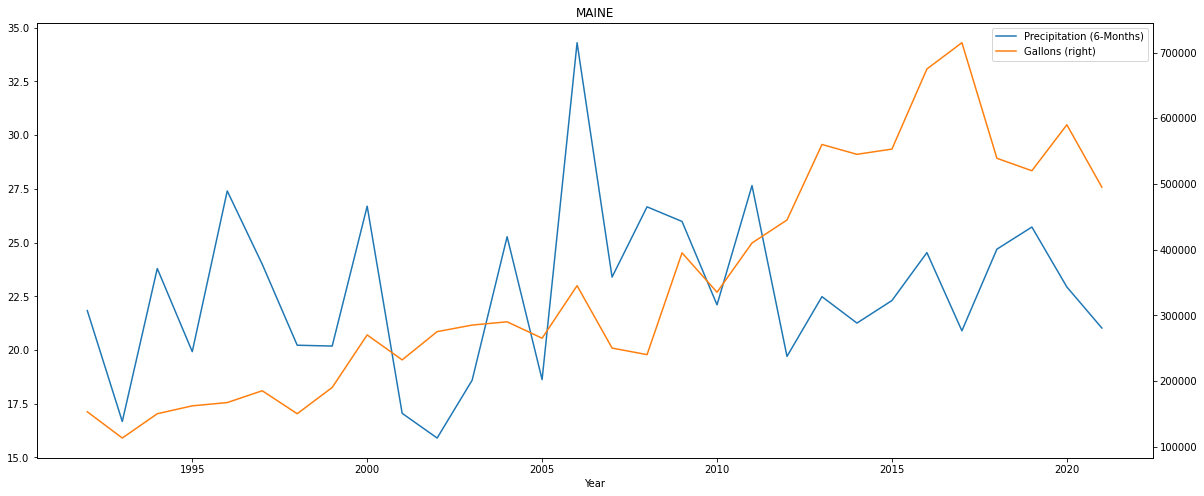

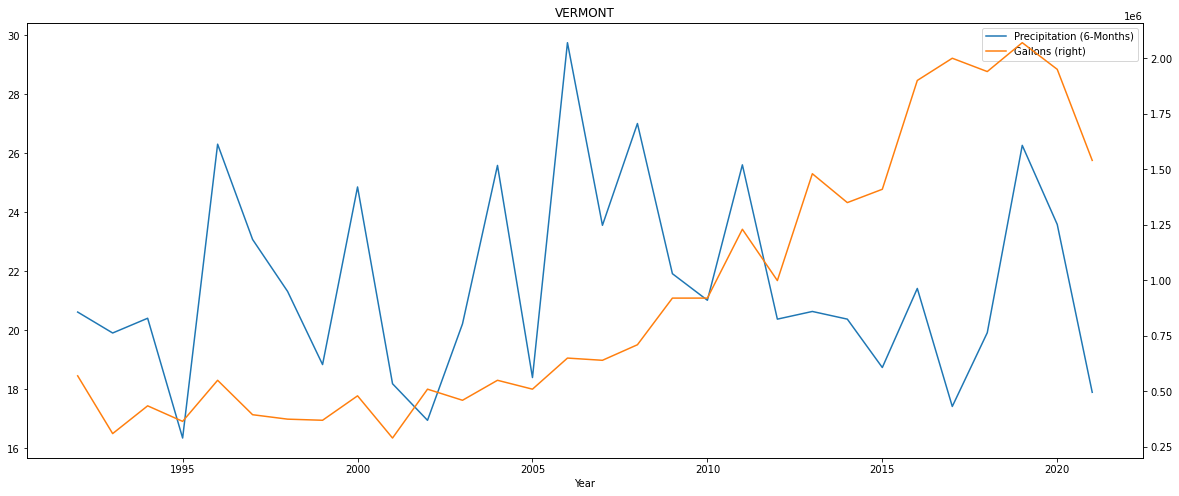

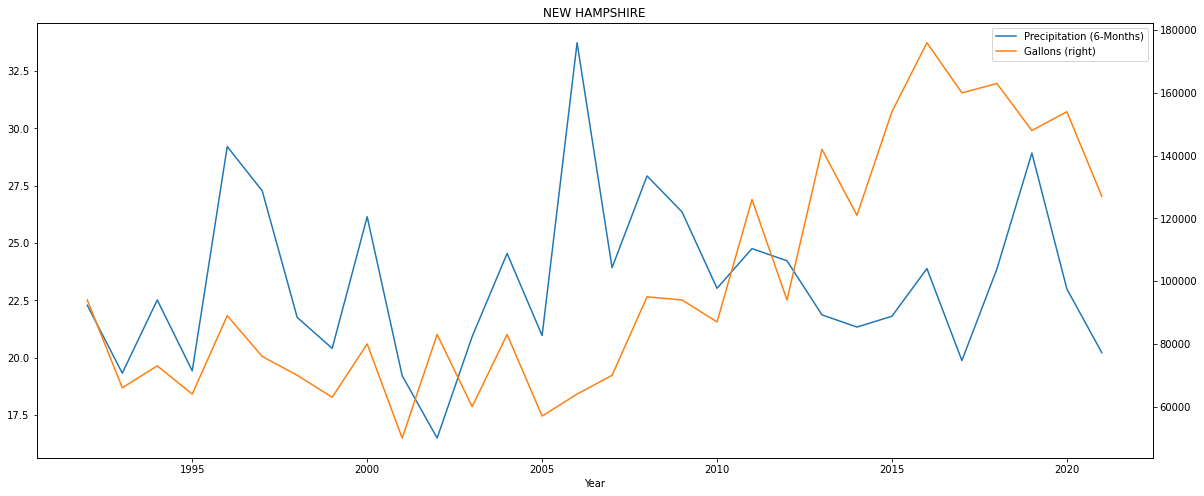

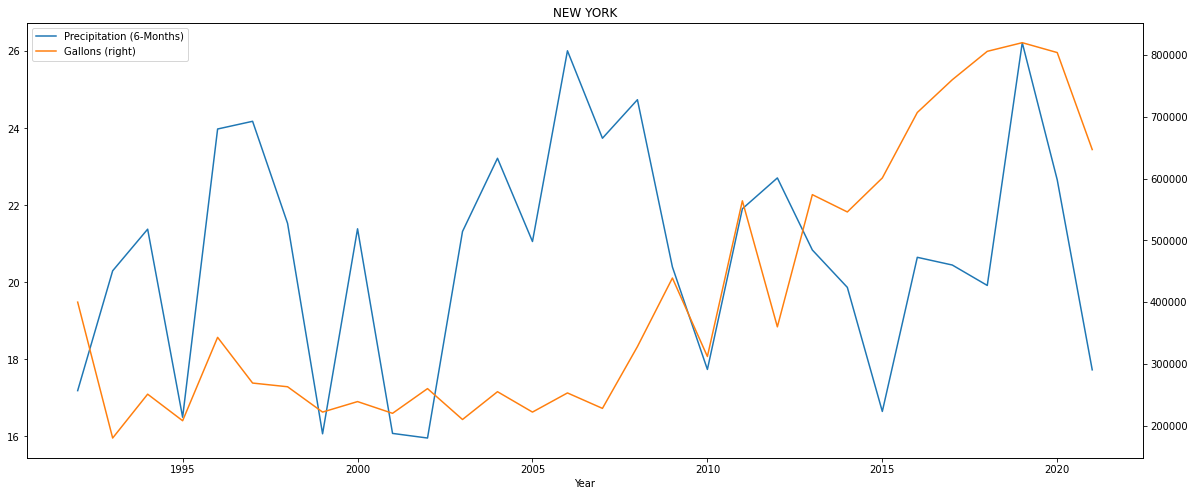

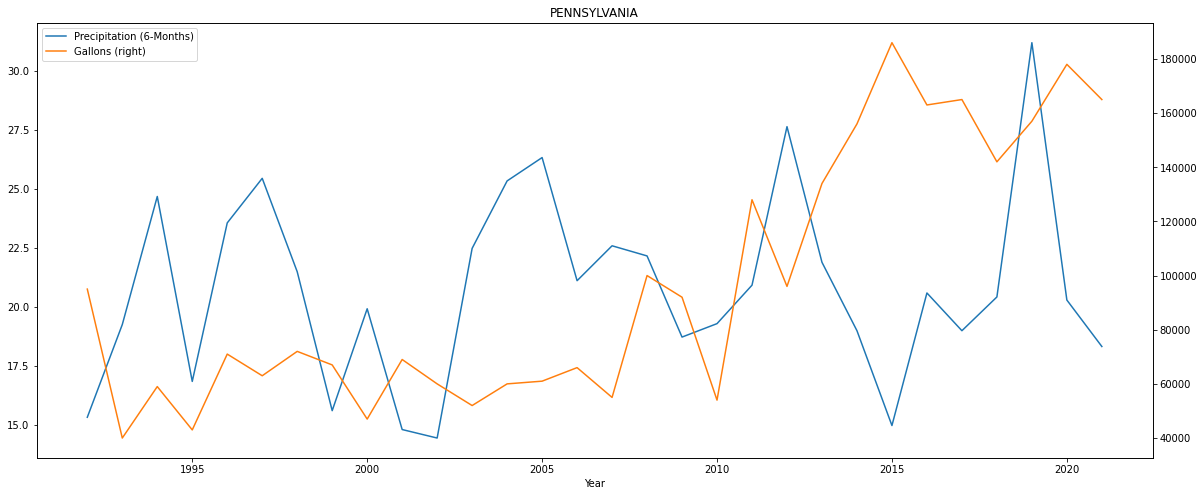

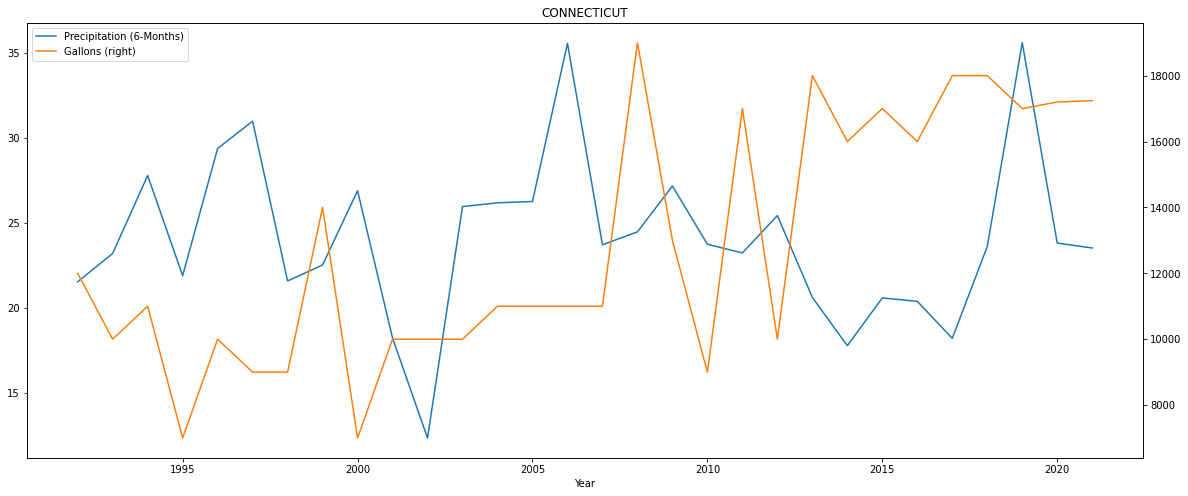

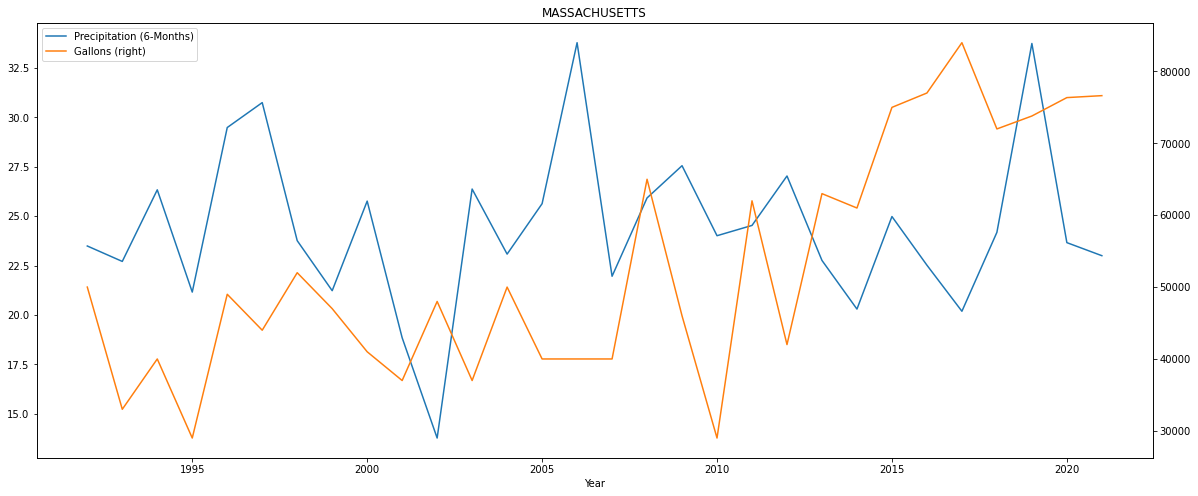

In [ ]:
for i in maple.State.unique():
  stateplot1(i)

##2.8 SPI drought (including d0-d4)

####Correlation between D0-D4 and gallons

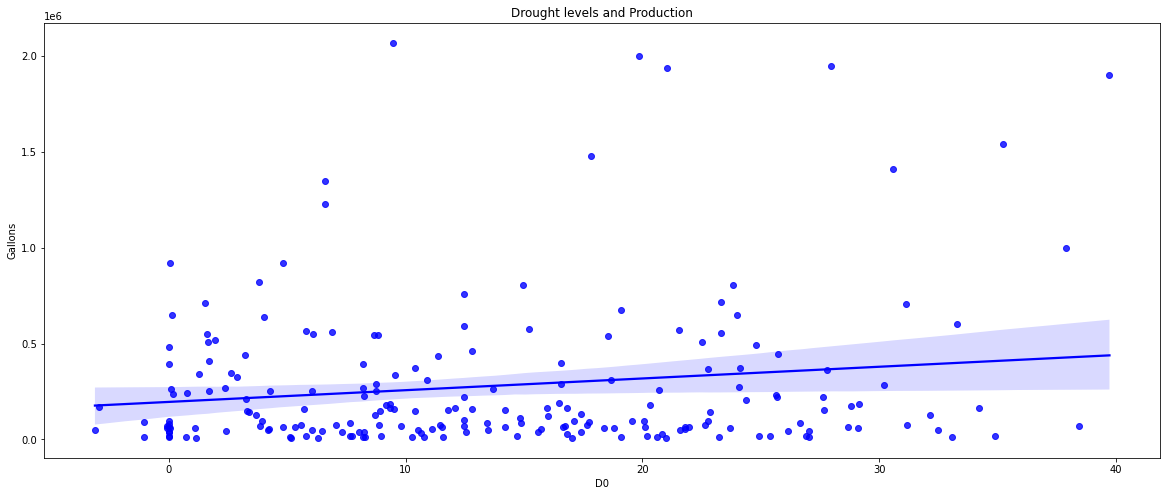

In [ ]:
sns.regplot(x=maple[['D0']], y=maple[['Gallons']], data=maple, color = 'blue').set(title='Drought levels and Production');

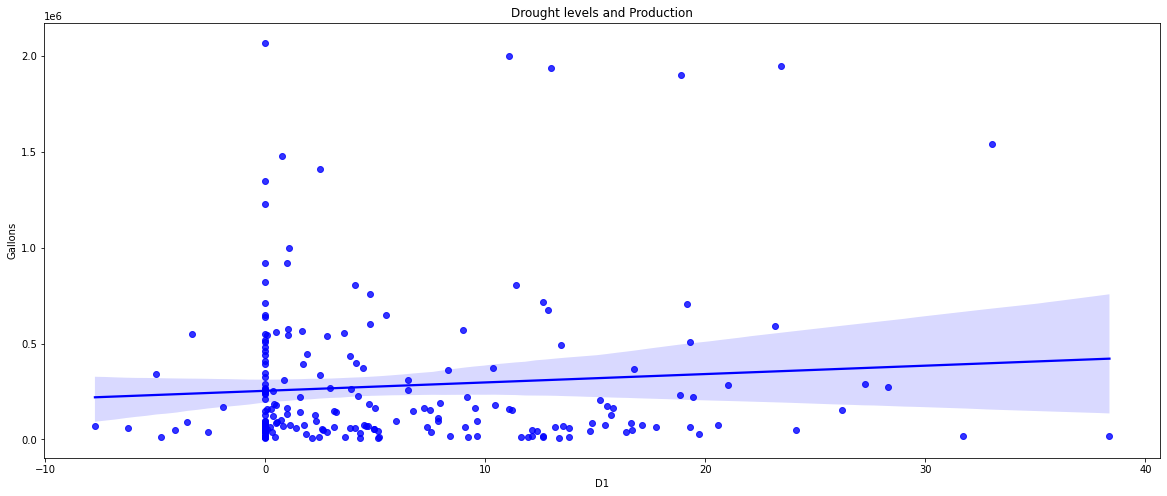

In [ ]:
sns.regplot(x=maple[['D1']], y=maple[['Gallons']], data=maple, color = 'blue').set(title='Drought levels and Production');

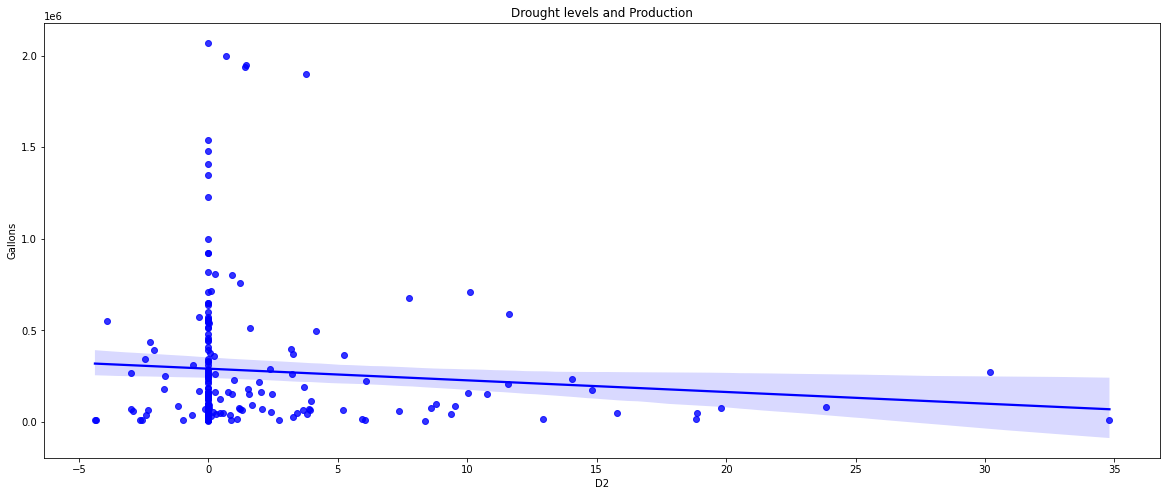

In [ ]:
sns.regplot(x=maple[['D2']], y=maple[['Gallons']], data=maple, color = 'blue').set(title='Drought levels and Production');

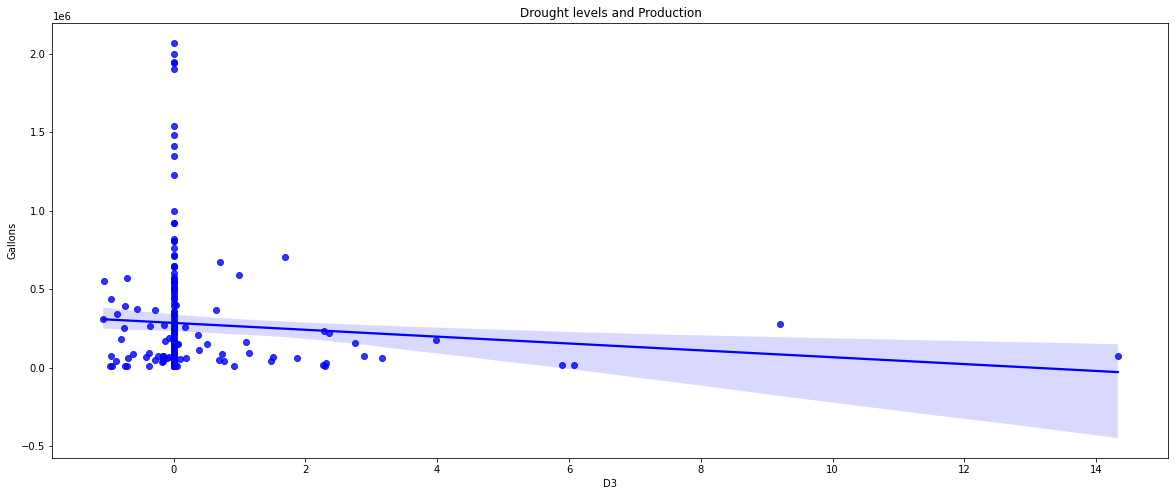

In [ ]:
sns.regplot(x=maple[['D3']], y=maple[['Gallons']], data=maple, color = 'blue').set(title='Drought levels and Production');


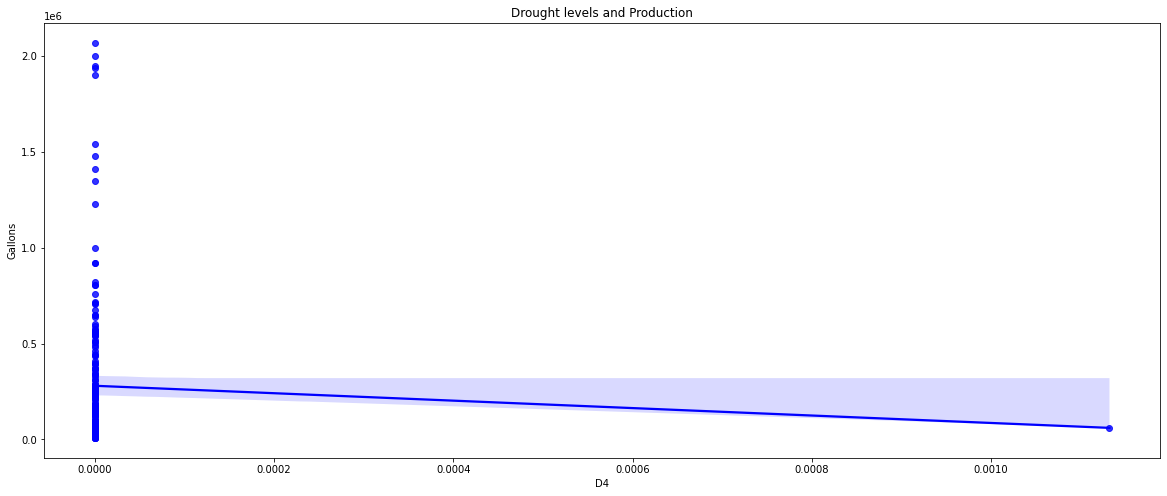

In [ ]:
sns.regplot(x=maple[['D4']], y=maple[['Gallons']], data=maple, color = 'blue').set(title='Drought levels and Production');

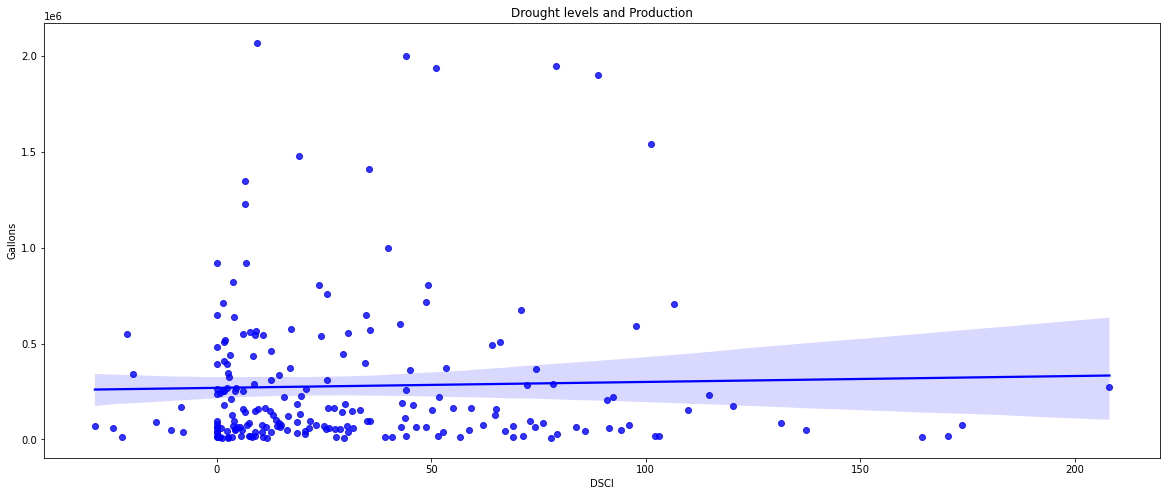

In [ ]:
sns.regplot(x=maple[['DSCI']], y=maple[['Gallons']], data=maple, color = 'blue').set(title='Drought levels and Production');

####D0-D4 drought levels against Gallon production over time

In [ ]:
def d0gallons(state='MASSACHUSETTS'):
  df = maple[maple['State']==state]
  fig, ax = plt.subplots() 
  df.plot(x = 'Year', y = 'D0', ax = ax) 
  df.plot(x = 'Year', y = 'Gallons', ax = ax, secondary_y = True)
  plt.style.use('tableau-colorblind10')
  plt.title(state) 

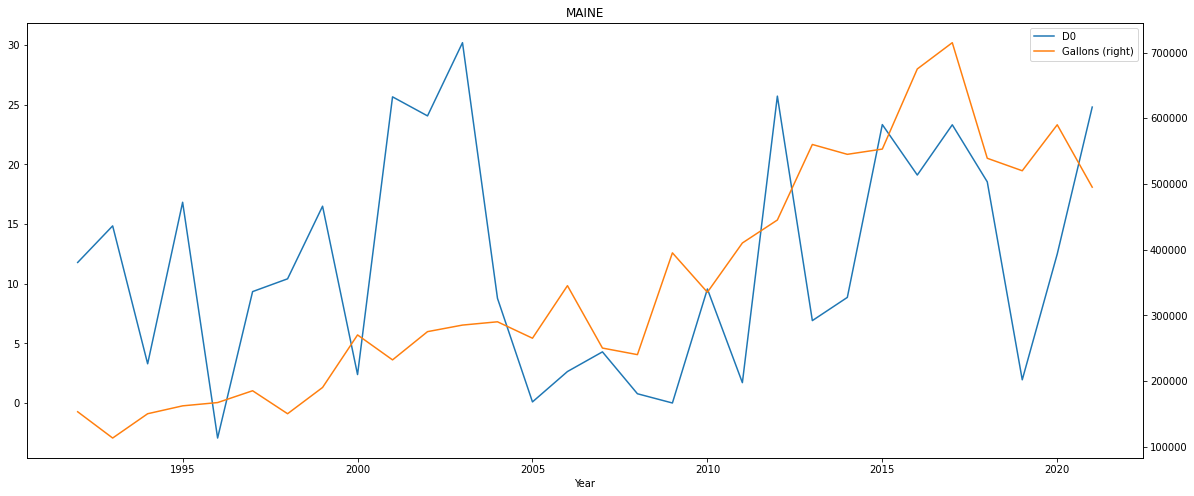

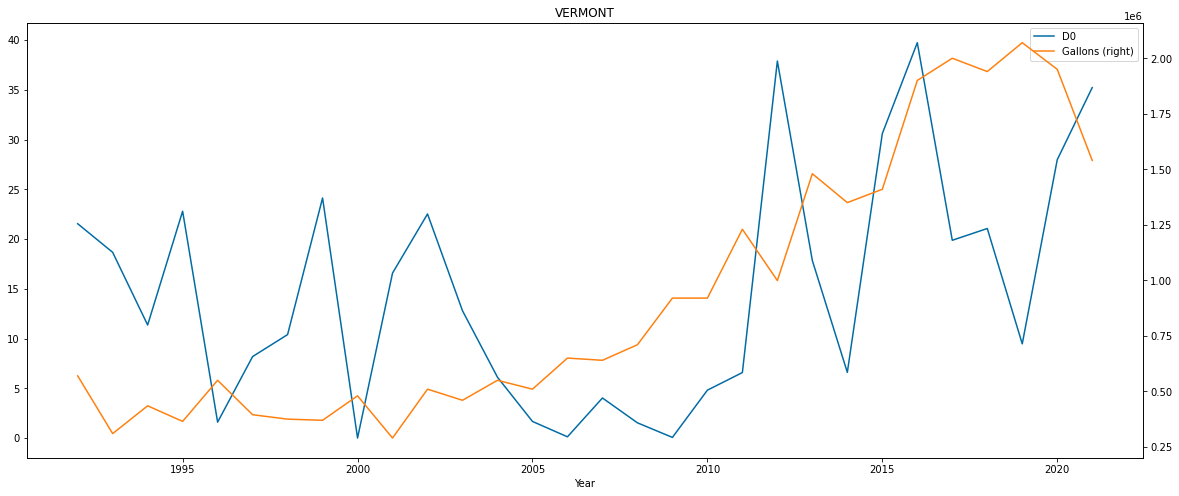

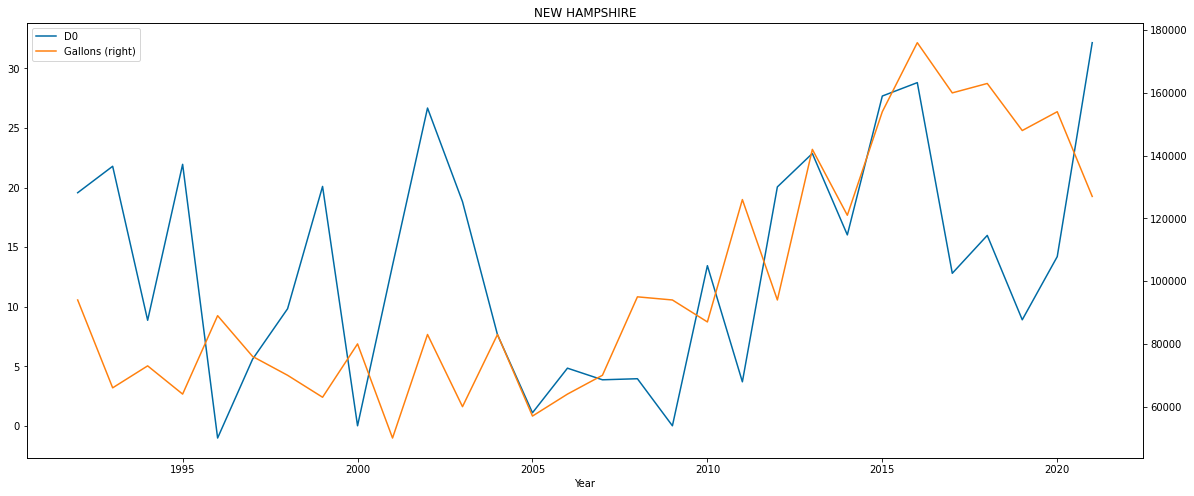

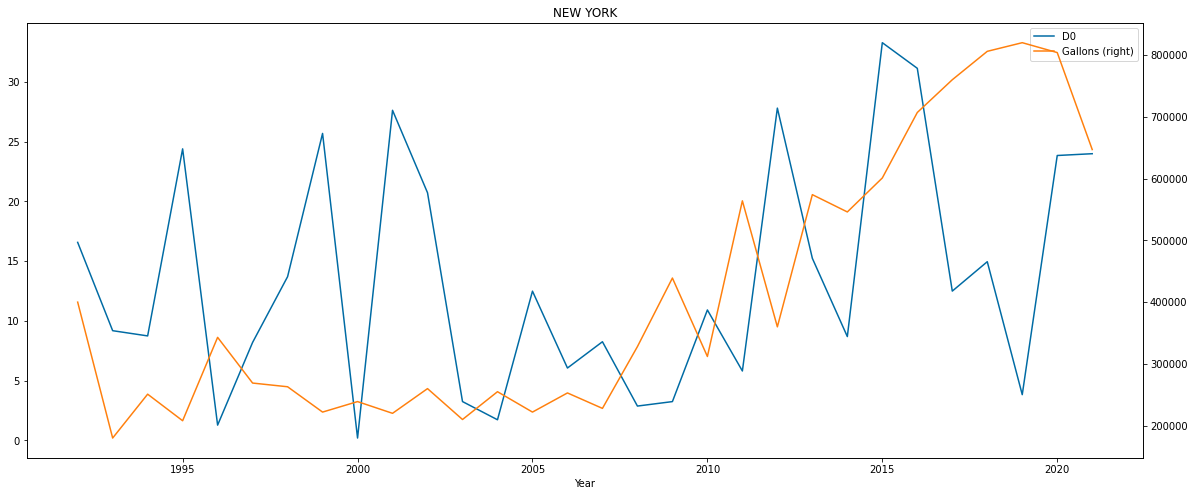

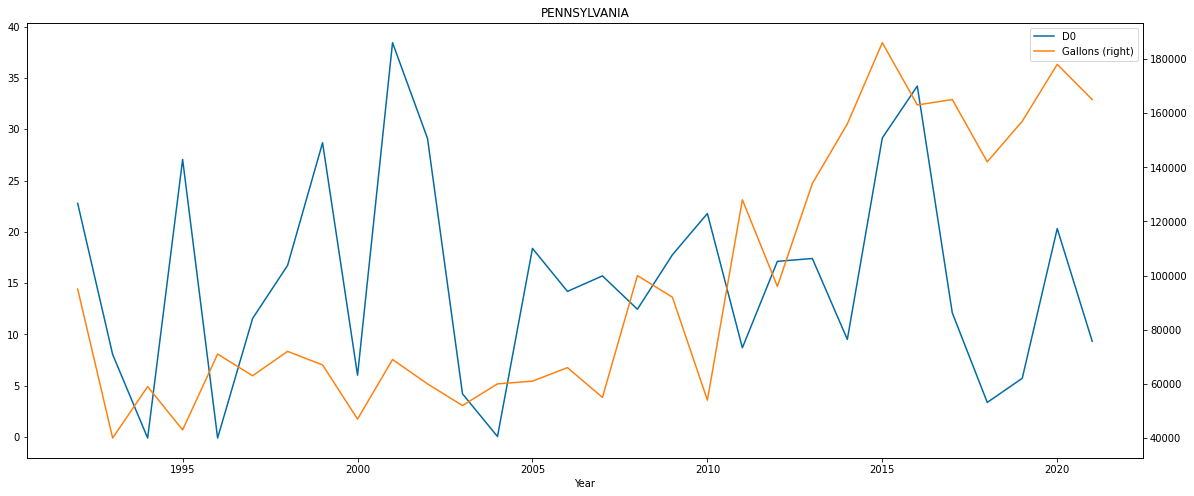

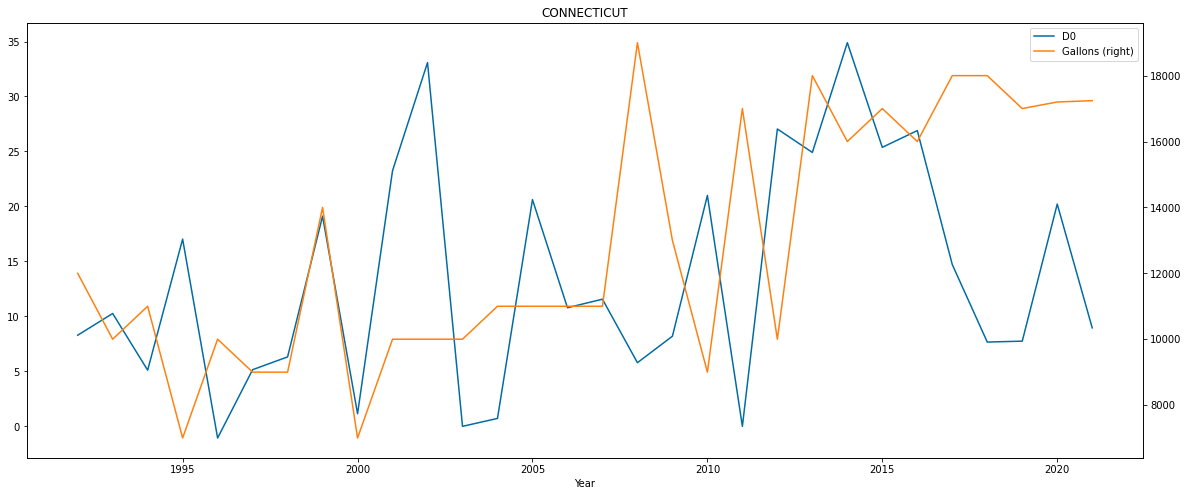

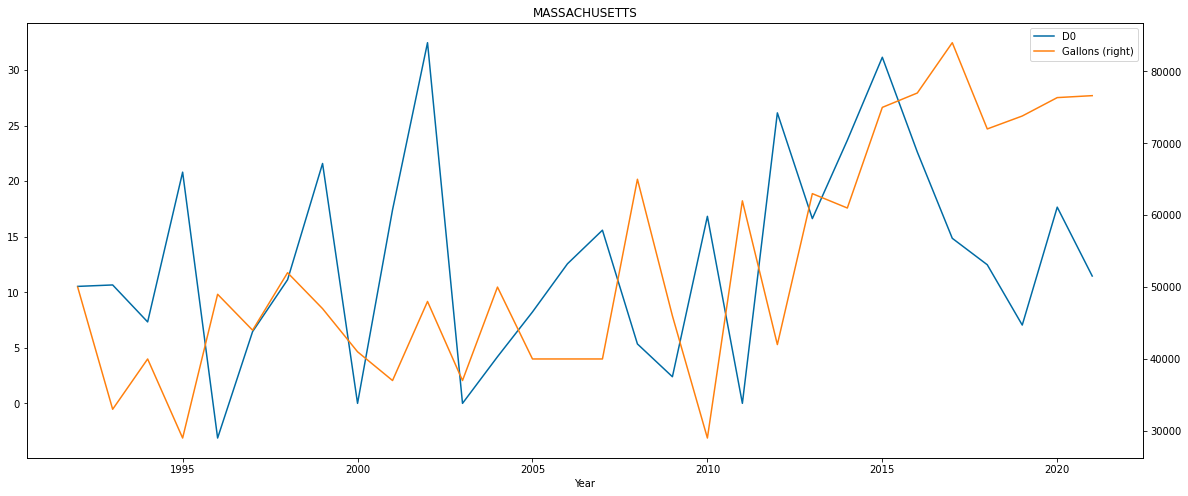

In [ ]:
for i in maple.State.unique():
  d0gallons(i)

During the early 2000s, there was an inverse relationship between D0 (Abnormally dry) levels of drought and gallon production. Over time, that relationsip became less inverse to the point where even high levels of D0 drought did not impede high levels of production of maple syrup. One should not generalize about the relationship  between D0 levels and maple syrup production when it comes to states in the northeast as not all states show the same behavior. With the exception of Massachusetts and Connecticut, for most northeast states, D0 and maple syrup production seem to be on the rise.

In [ ]:
def d1gallons(state='MASSACHUSETTS'):
  df = maple[maple['State']==state]
  fig, ax = plt.subplots() 
  df.plot(x = 'Year', y = 'D1', ax = ax)
  df.plot(x = 'Year', y = 'Gallons', ax = ax, secondary_y = True)
  plt.style.use('tableau-colorblind10')
  plt.title(state)

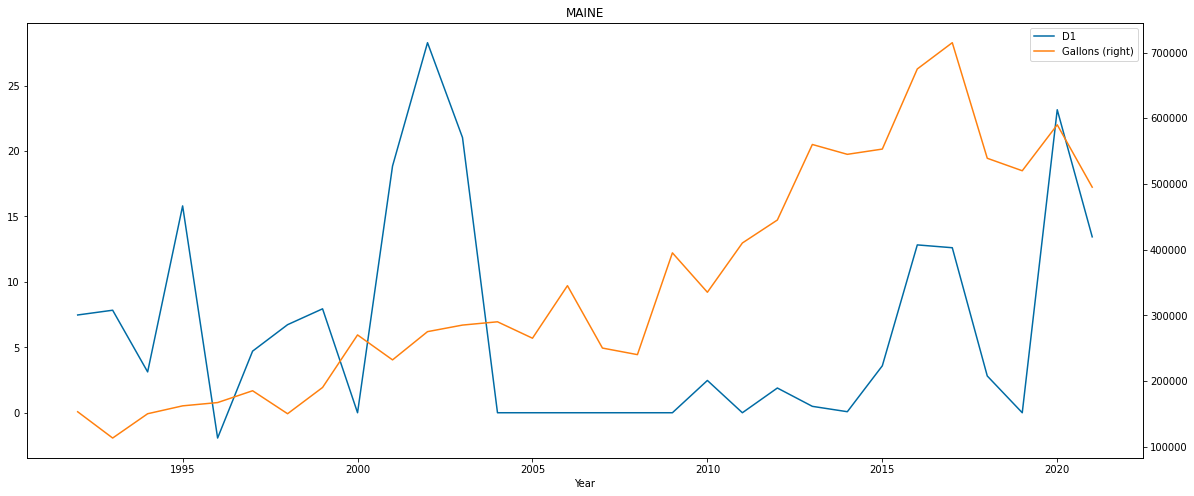

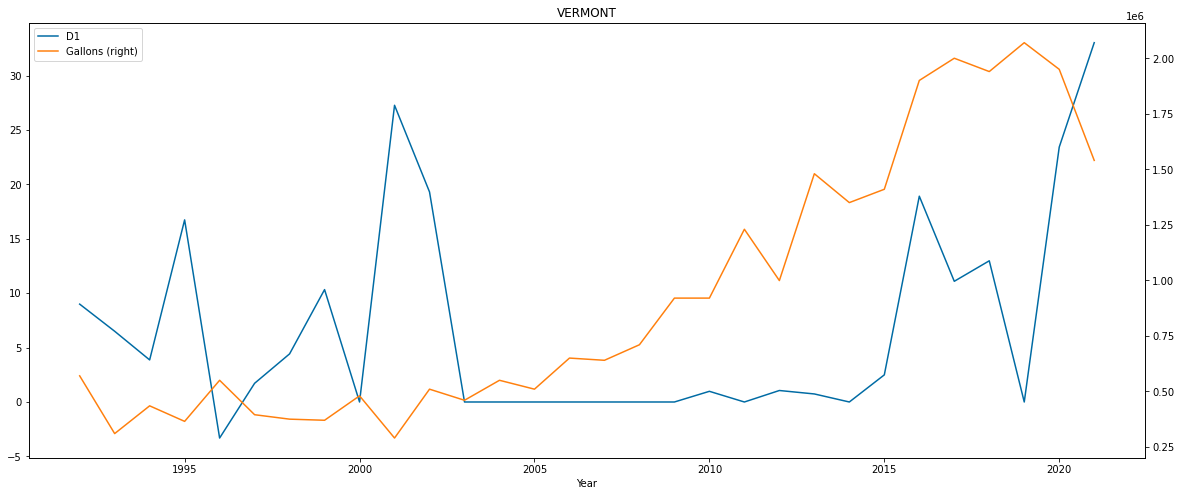

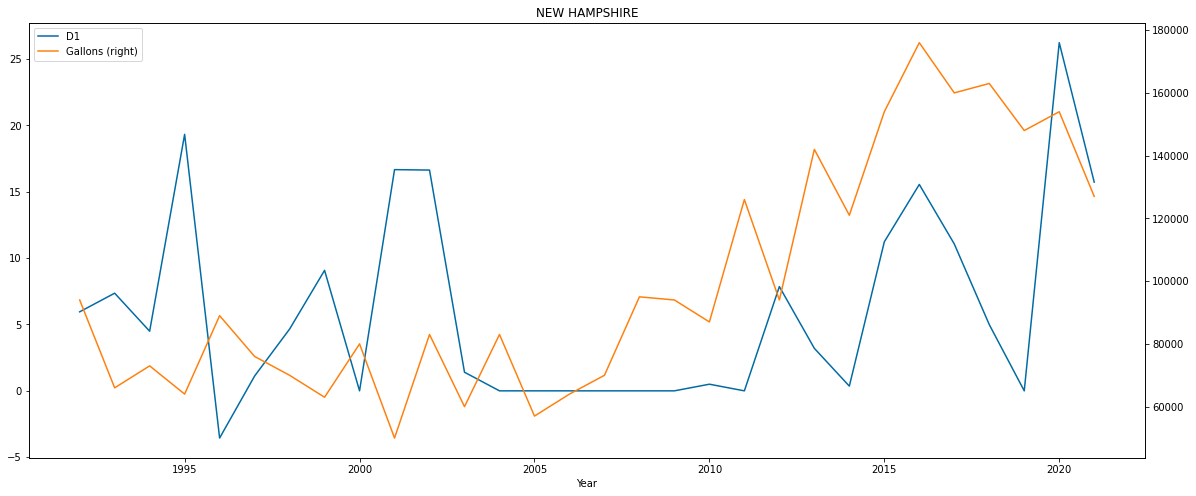

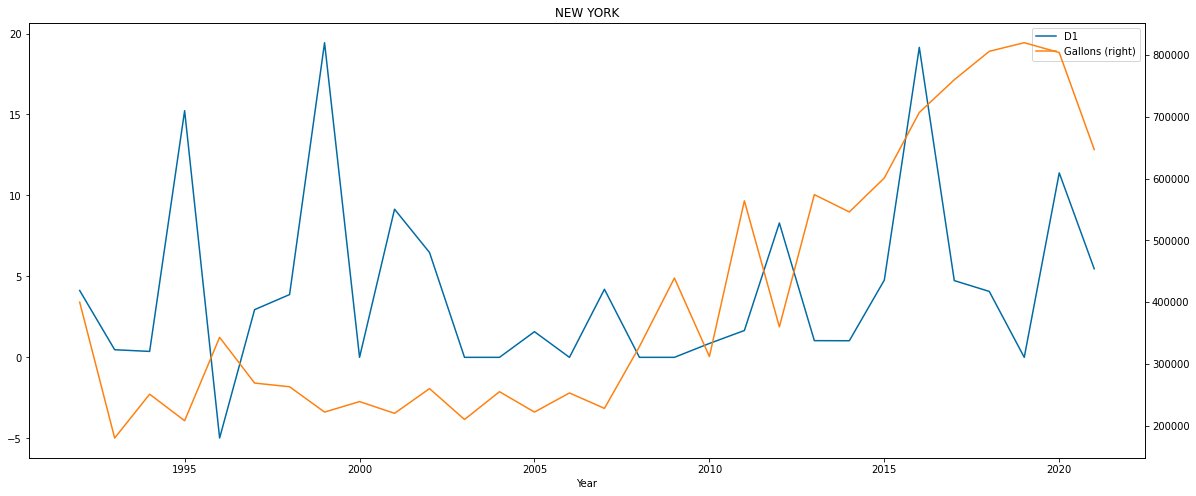

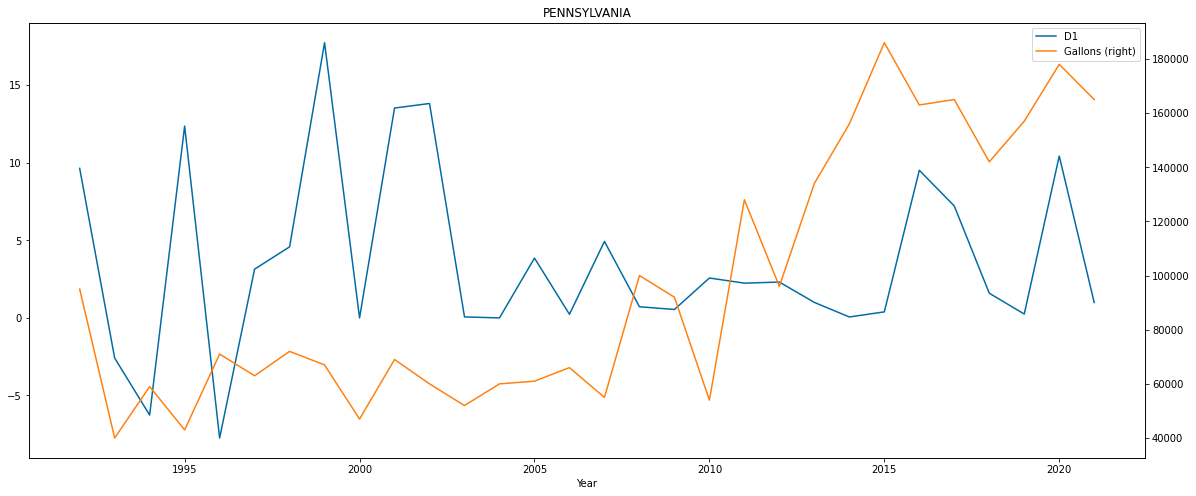

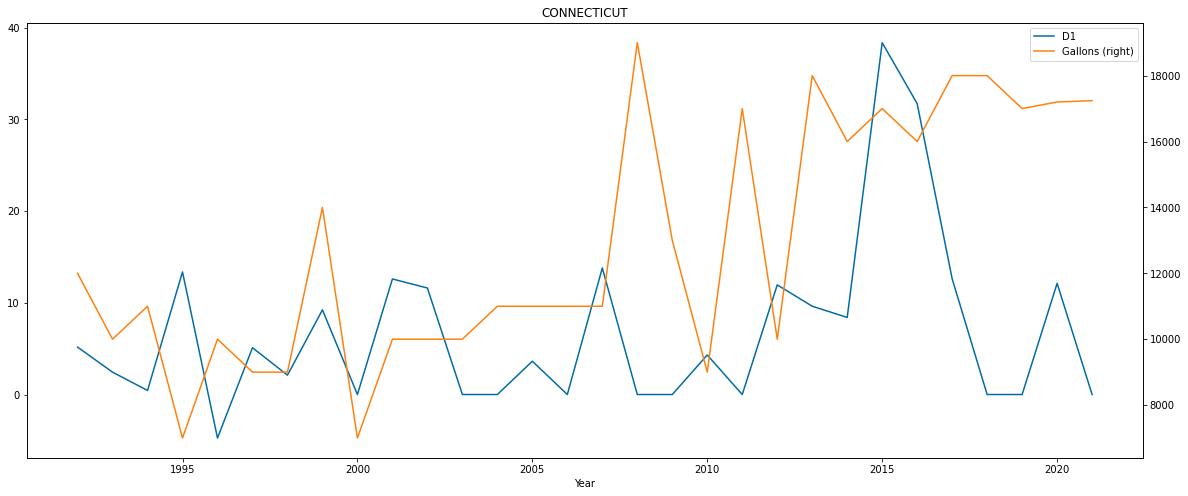

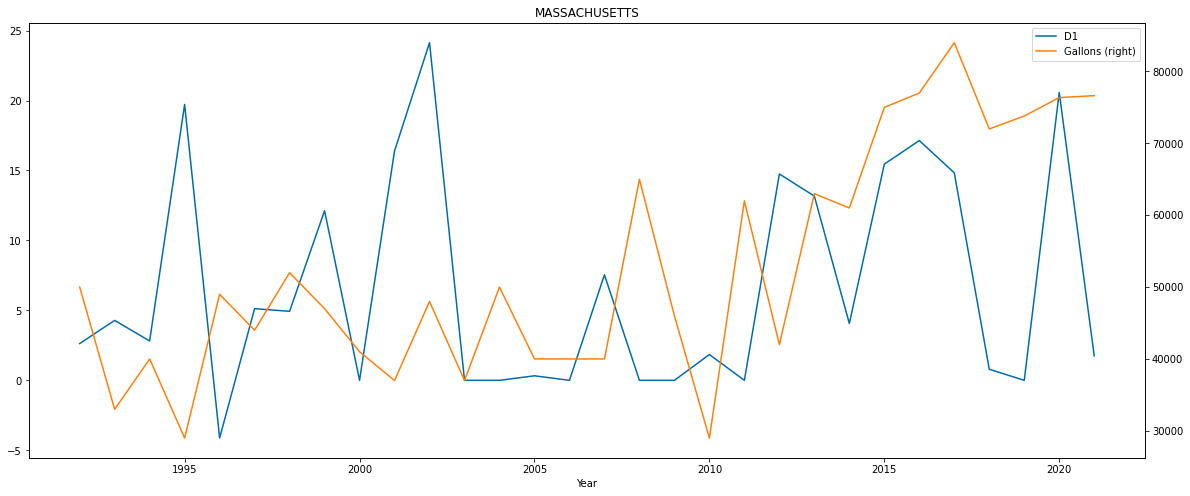

In [ ]:
for i in maple.State.unique():
  d1gallons(i)

Similar to the relationship between D0 and production, D1 (Moderate Drought) levels also started as inverse to production in the early 2000s. Towards the mid-2000s and late 2010s there was not a clear relationship as both variables increased and decreased simultaneously.

In [ ]:
def d2gallons(state='MASSACHUSETTS'):
  df = maple[maple['State']==state]
  fig, ax = plt.subplots() 
  df.plot(x = 'Year', y = 'D2', ax = ax)
  df.plot(x = 'Year', y = 'Gallons', ax = ax, secondary_y = True)
  plt.style.use('tableau-colorblind10')
  plt.title(state)

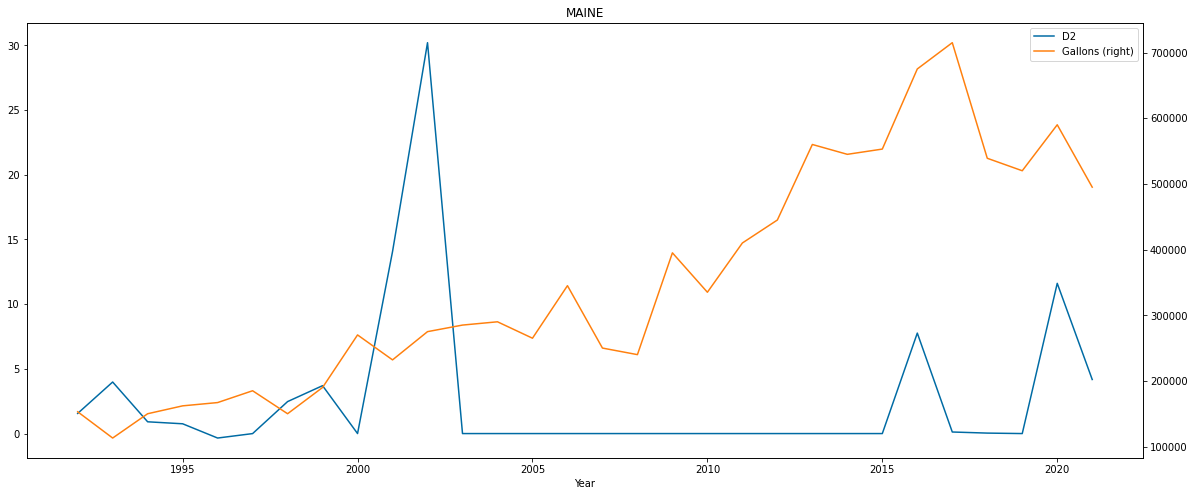

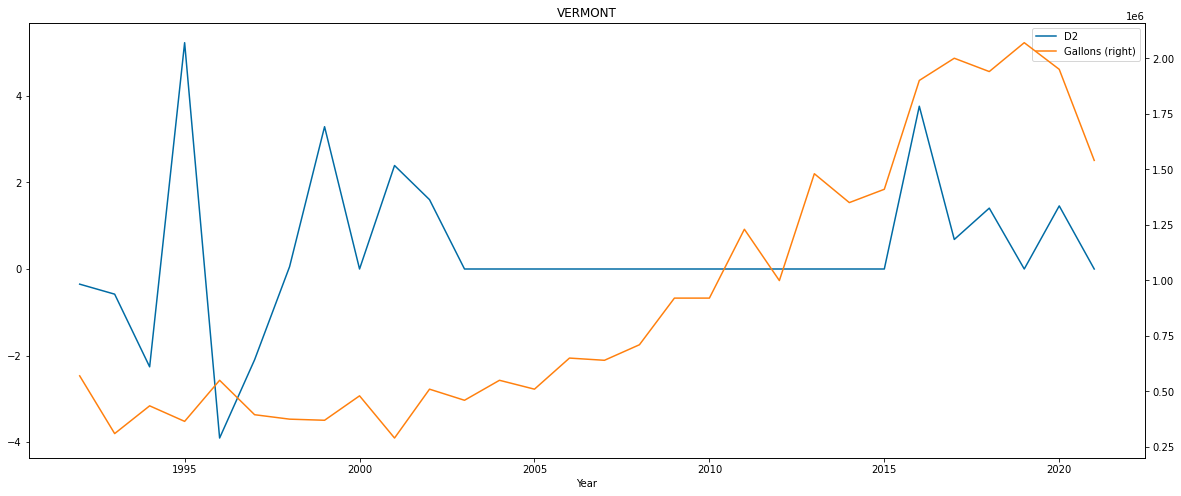

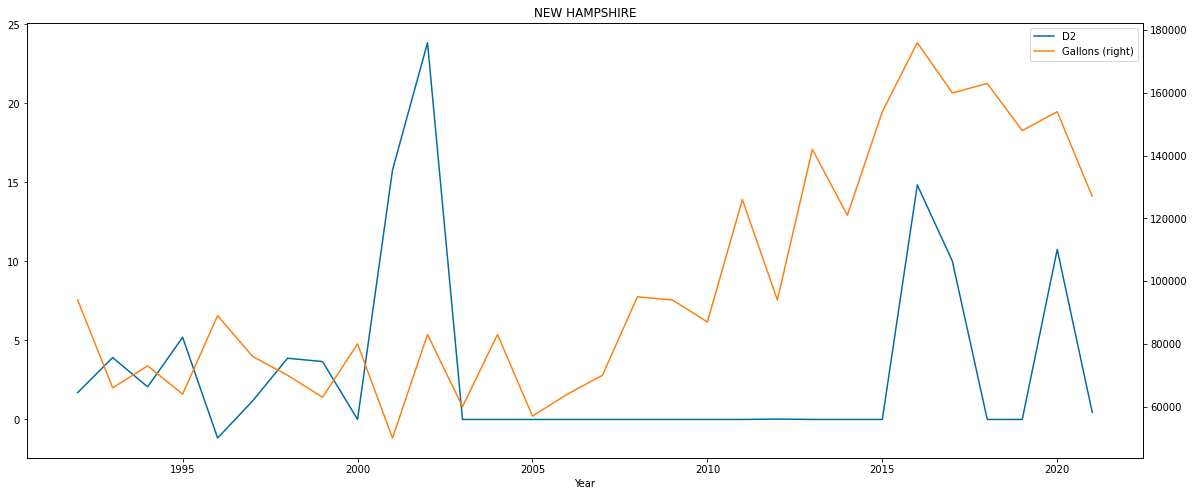

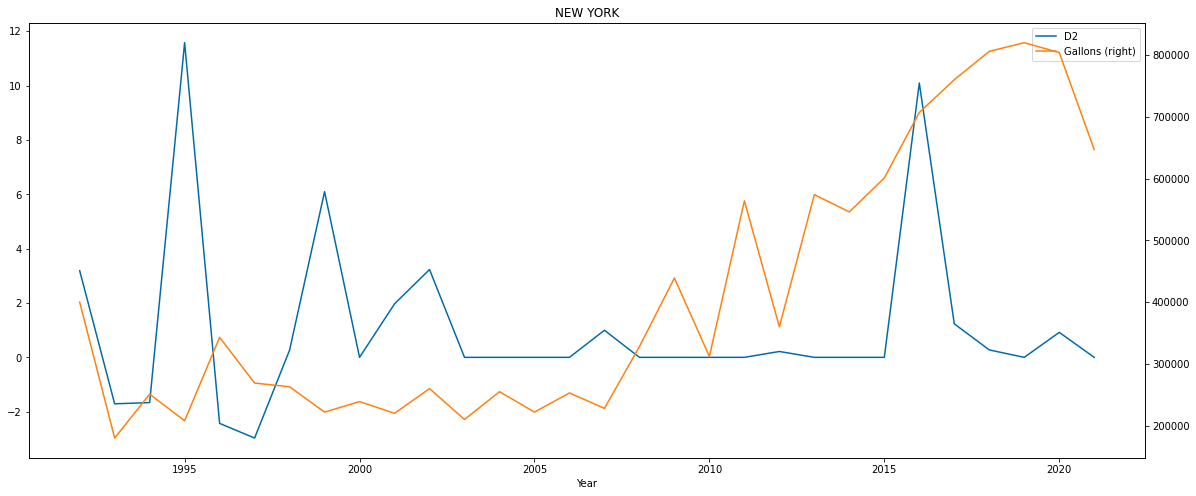

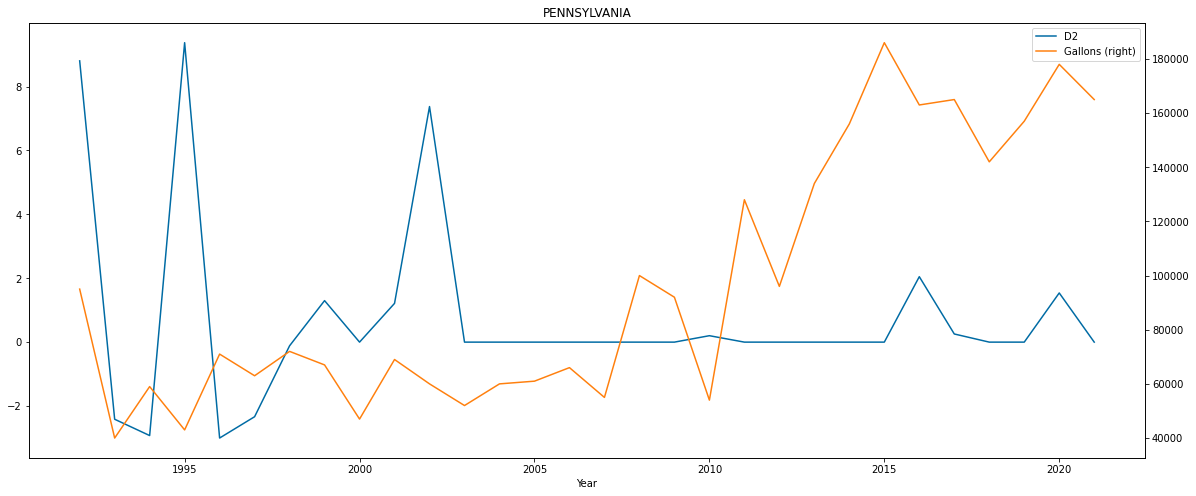

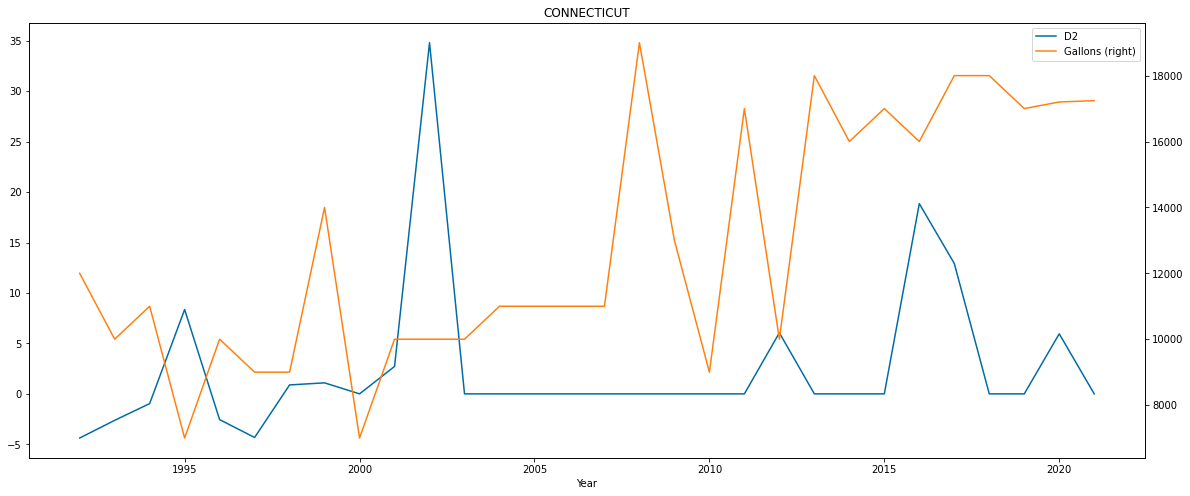

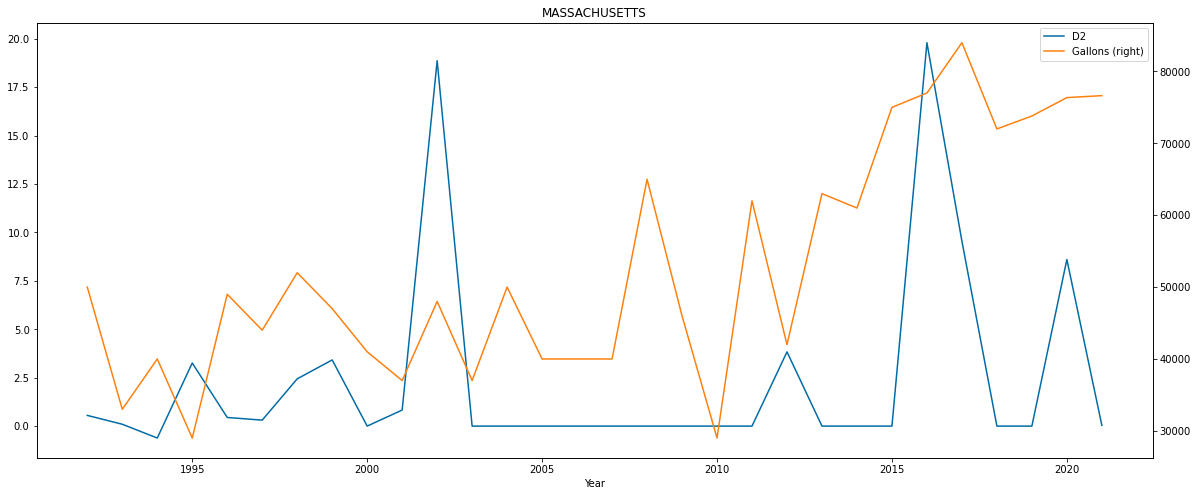

In [ ]:
for i in maple.State.unique():
  d2gallons(i)

During early 2000s, D2(Severe Drought) was high in most states. During middle and late 2000s, D2 levels were essentially 0. During mid-2010s there was a spike in D2 levels and towards late 2010s there was an upward trend in D2 levels for most states, except Massachusetts and Connecticut.

In [ ]:
def d3gallons(state='MASSACHUSETTS'):
  df = maple[maple['State']==state]
  fig, ax = plt.subplots() 
  df.plot(x = 'Year', y = 'D3', ax = ax)
  df.plot(x = 'Year', y = 'Gallons', ax = ax, secondary_y = True)
  plt.style.use('tableau-colorblind10')
  plt.title(state)

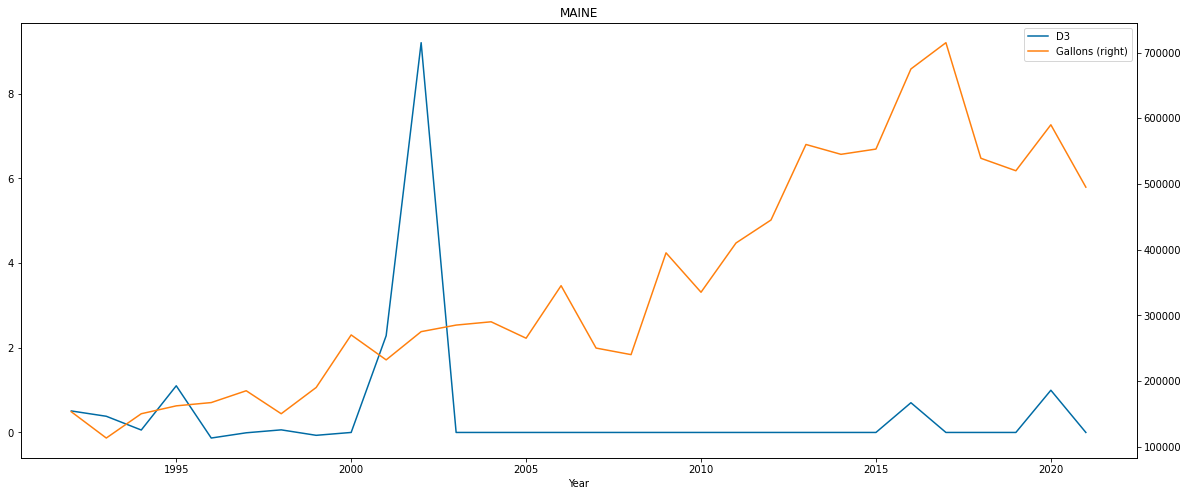

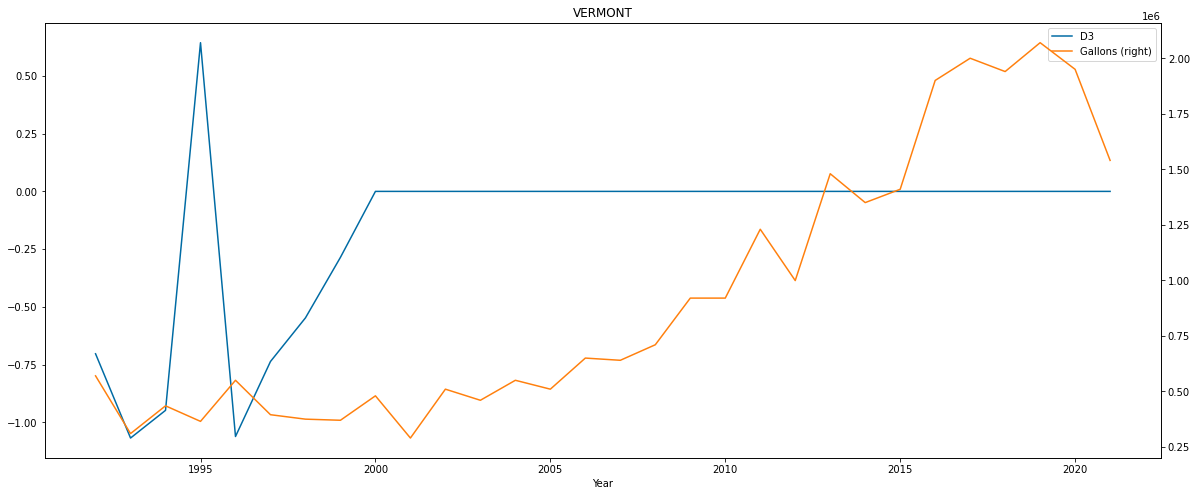

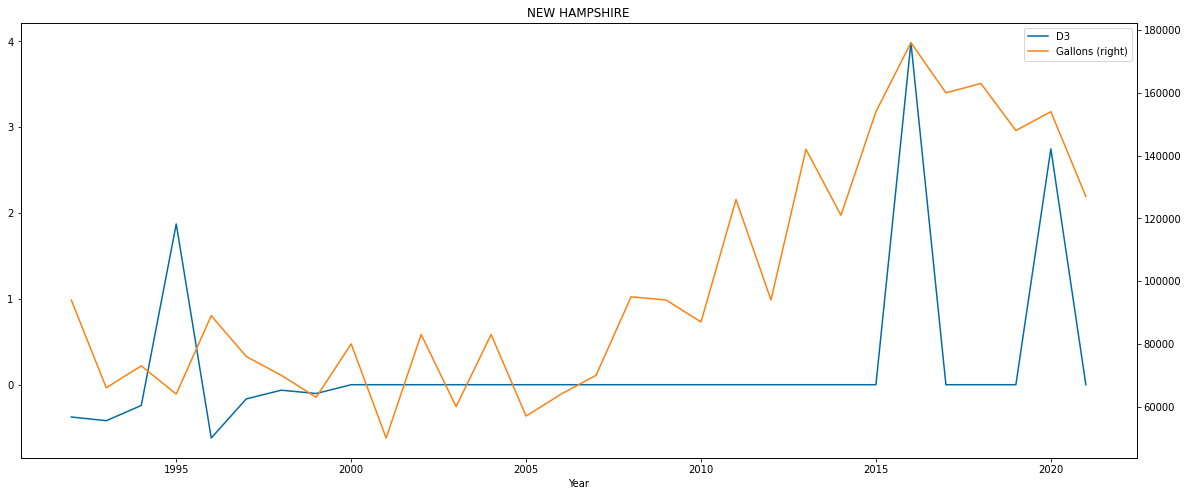

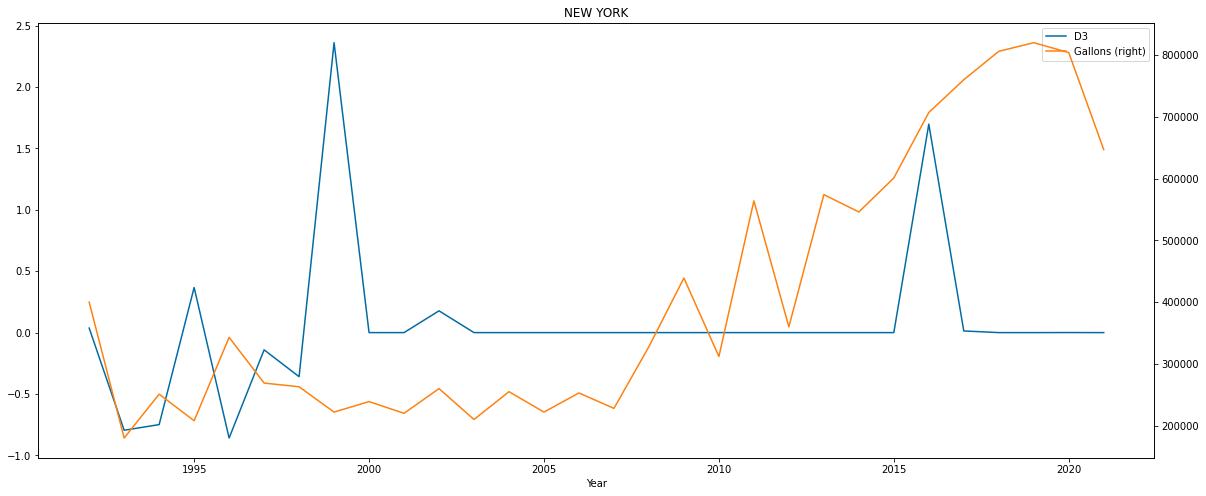

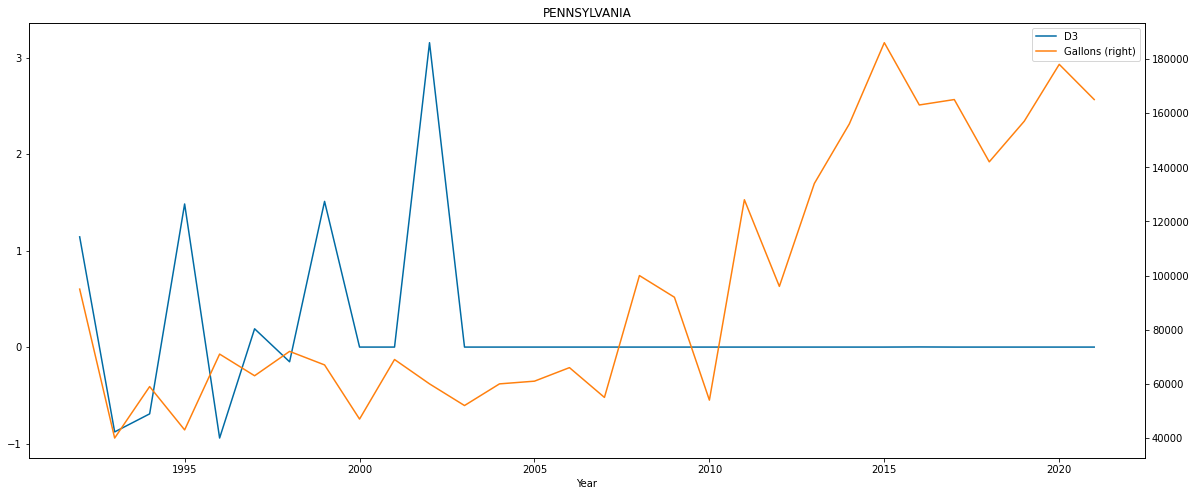

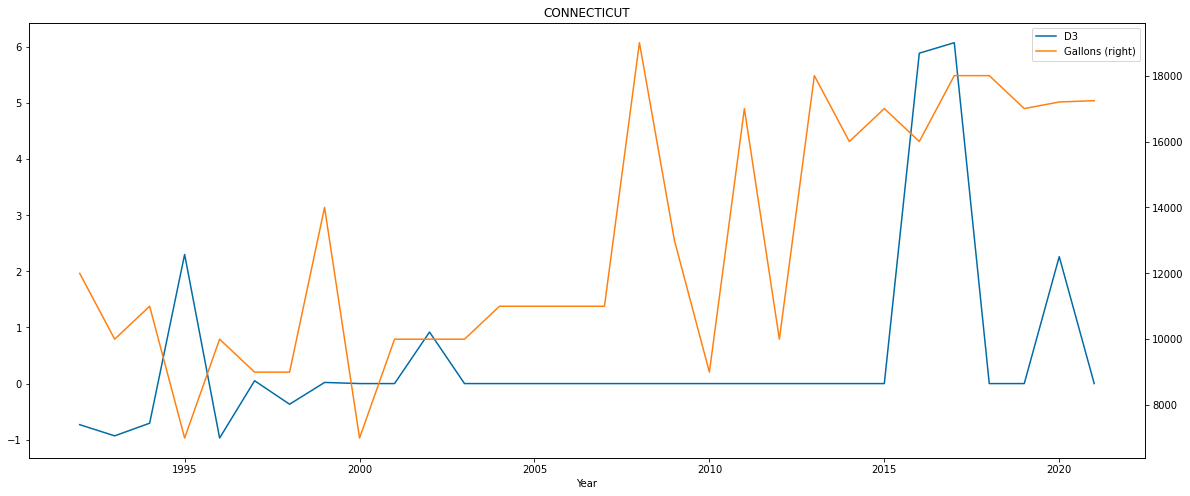

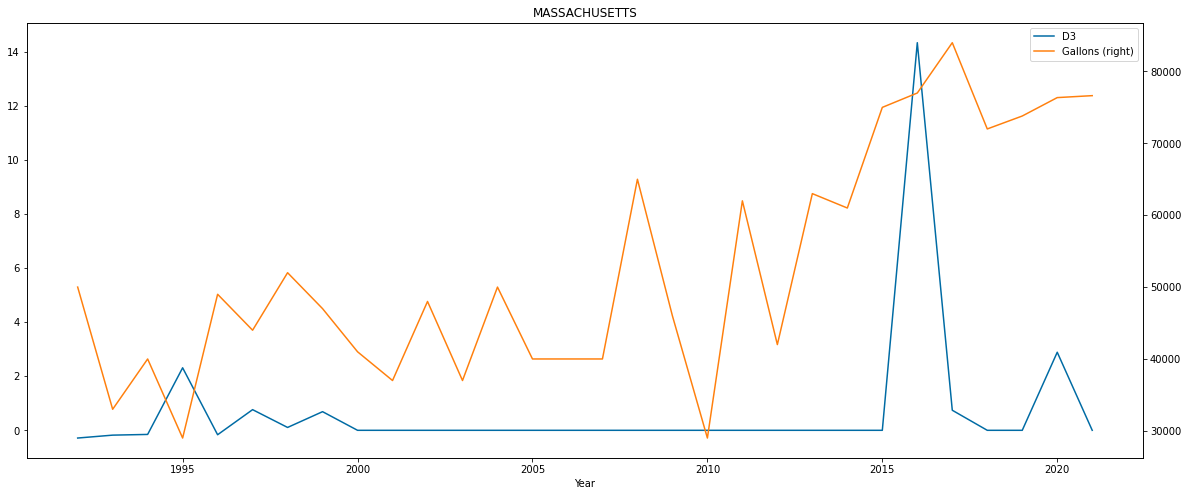

In [ ]:
for i in maple.State.unique():
  d3gallons(i)

It is difficult to generalize the relationship between D3 (Extreme Drought) levels and maple syrup production on the northeast as many states show an even more different behavior in terms of units of D3 levels. For some states D3 levels were essentially 0 for several years. One could argue that the reason for D3 levels to be minimal for many states is because extreme drought is not as common as lesser levels of drought, in the northeast.

####SPI-Drought levels per state

In [ ]:
def stateplot(state='MASSACHUSETTS'):
  df = maple[maple['State']==state]
  df.plot.line(x = 'Year', y ='SPI-Drought')
  plt.title(state)

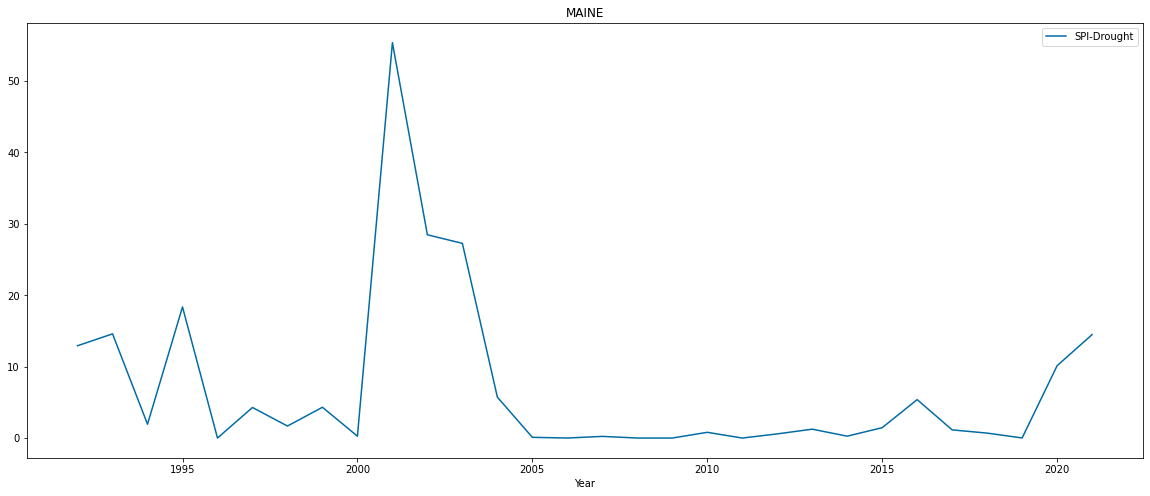

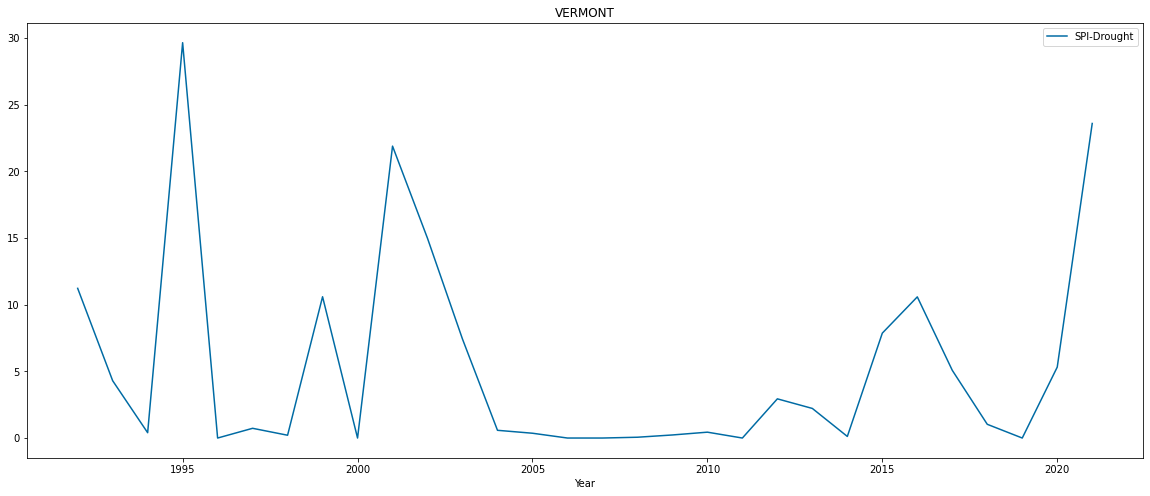

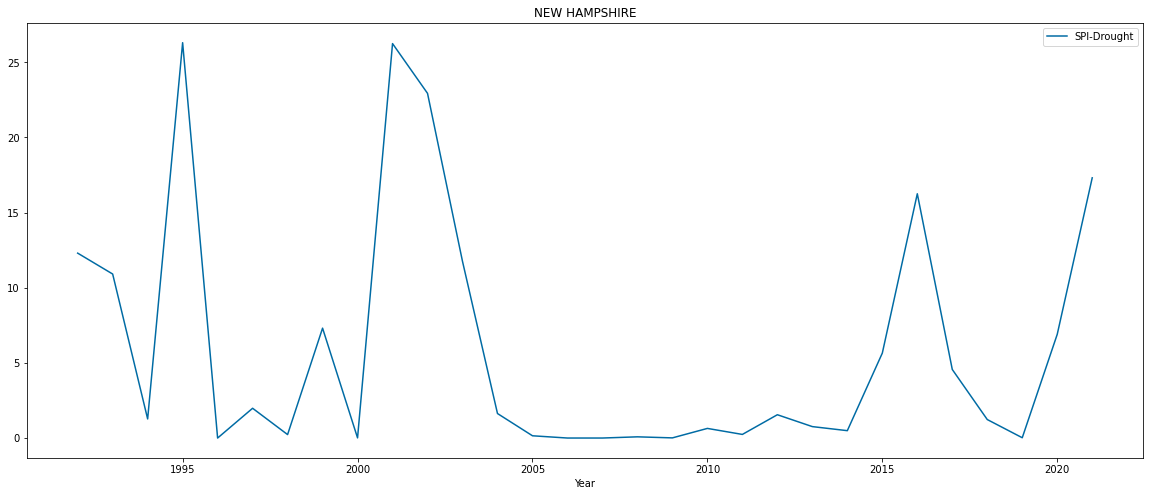

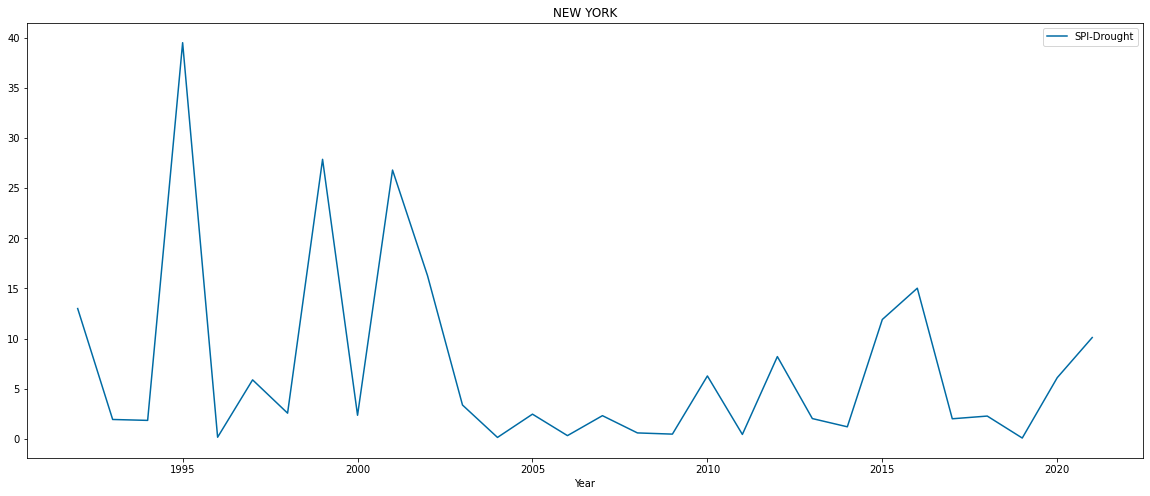

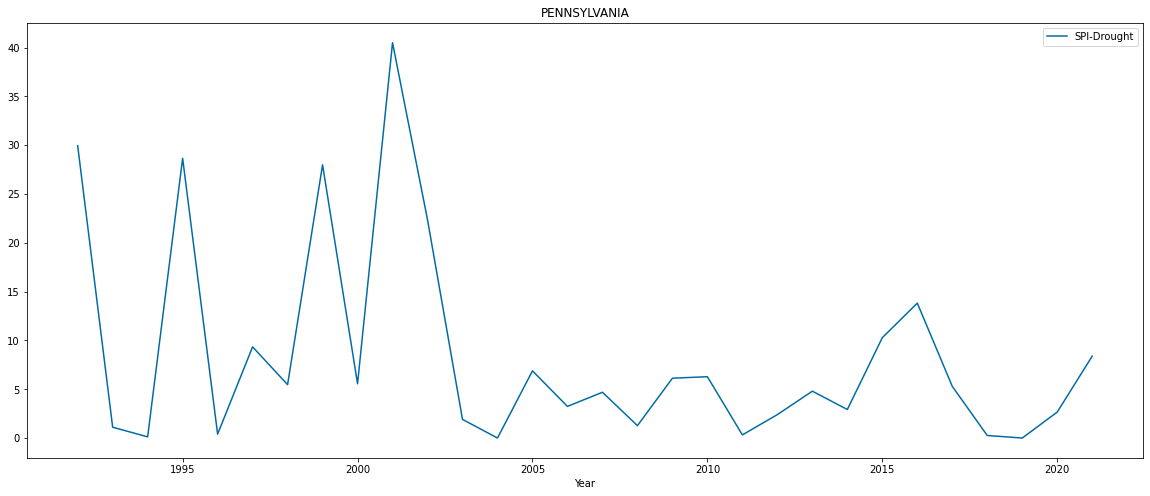

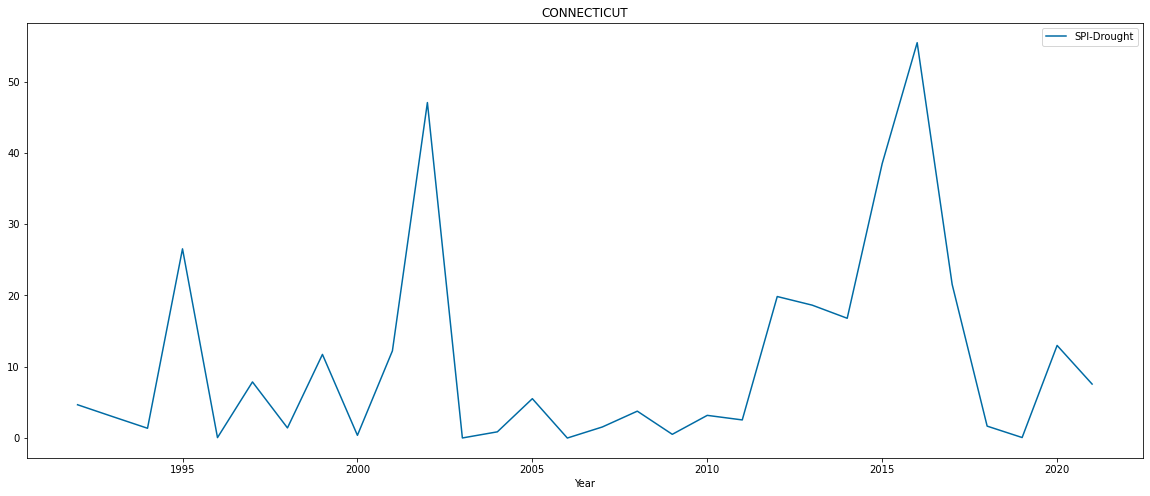

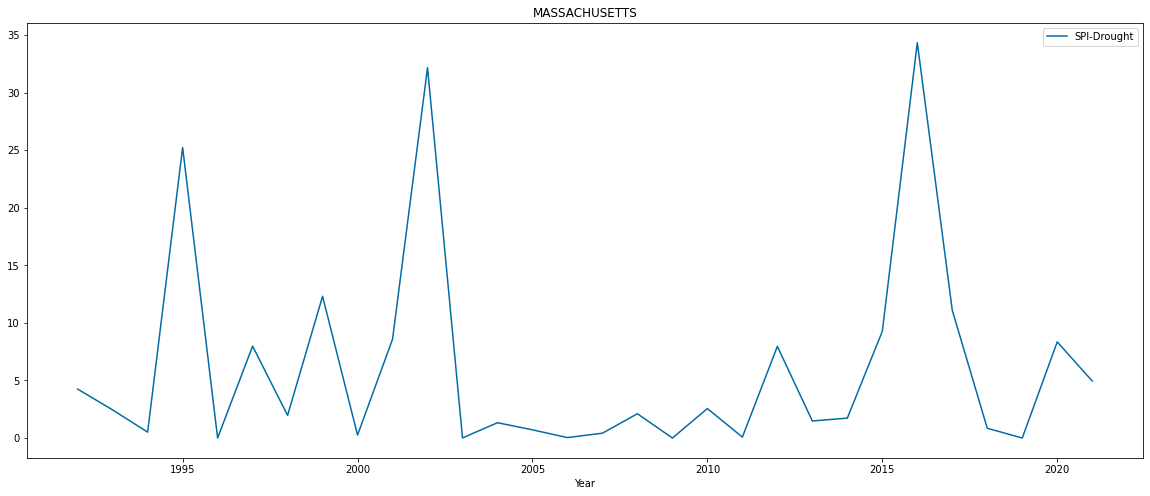

In [ ]:
for i in maple.State.unique():
  stateplot(i)

In [ ]:
def stateplot1(state='MASSACHUSETTS'):
  df = maple[maple['State']==state]
  fig, ax = plt.subplots() 
  df.plot(x = 'Year', y = 'SPI-Drought', ax = ax) 
  df.plot(x = 'Year', y = 'SPI-Wet', ax = ax, secondary_y = True)
  plt.title(state) 

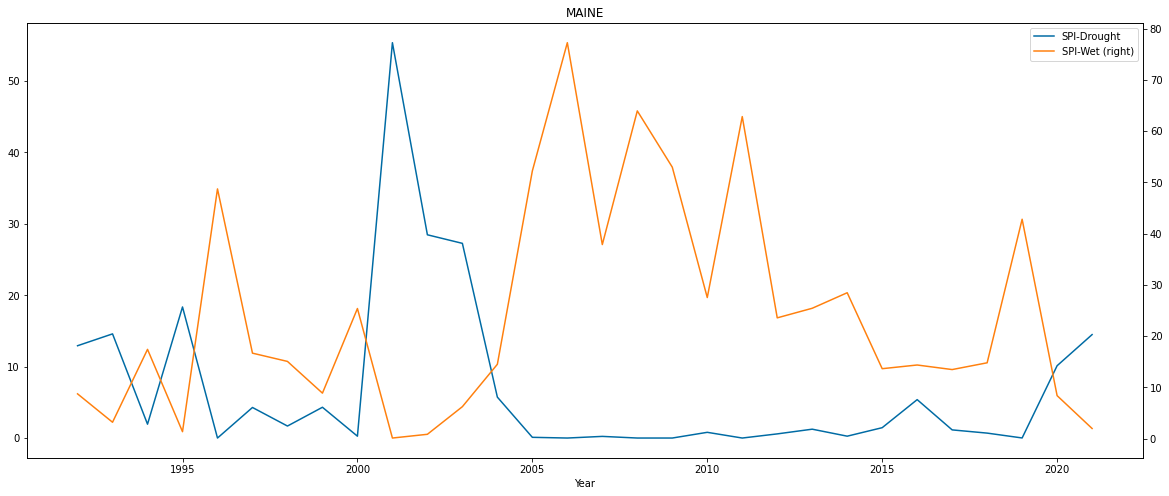

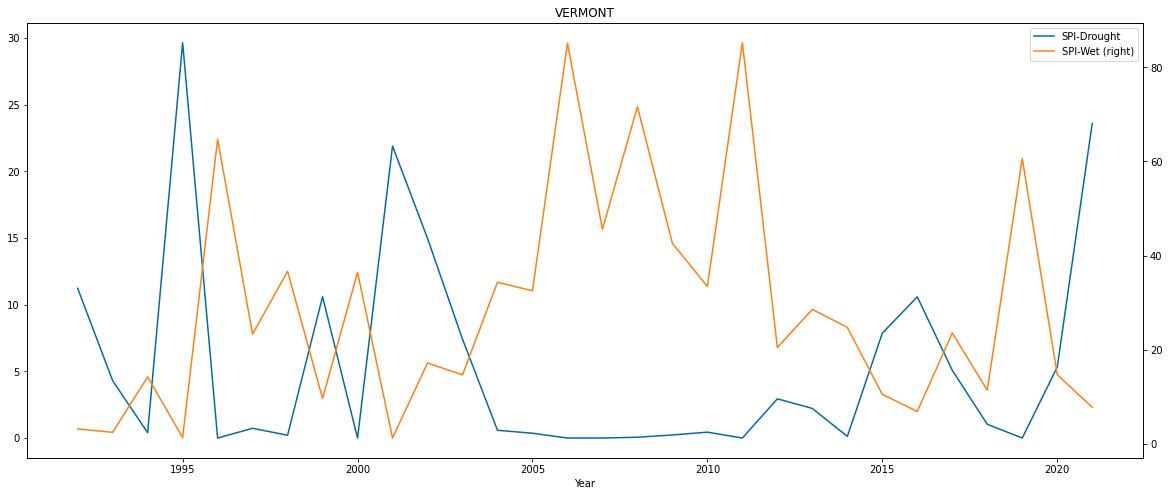

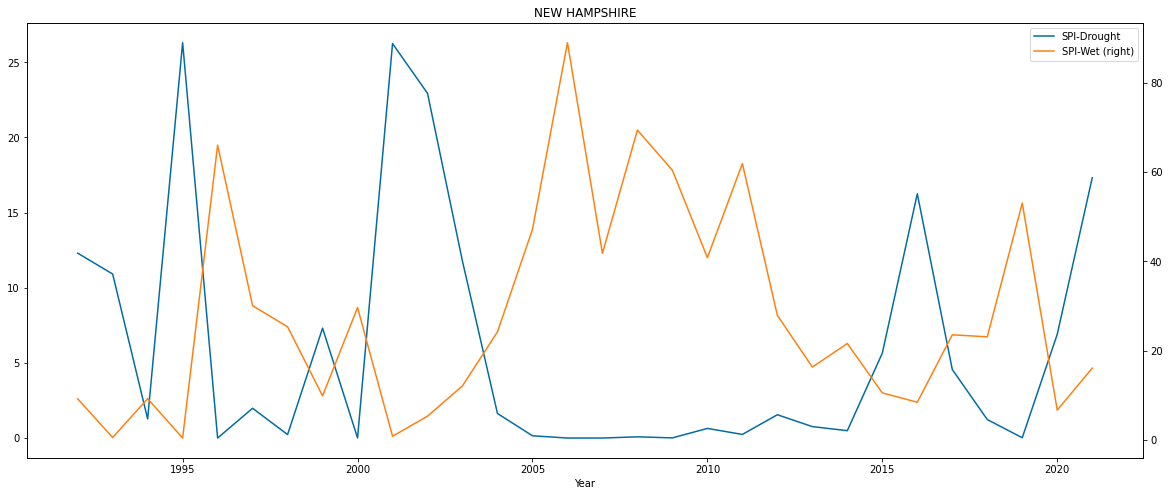

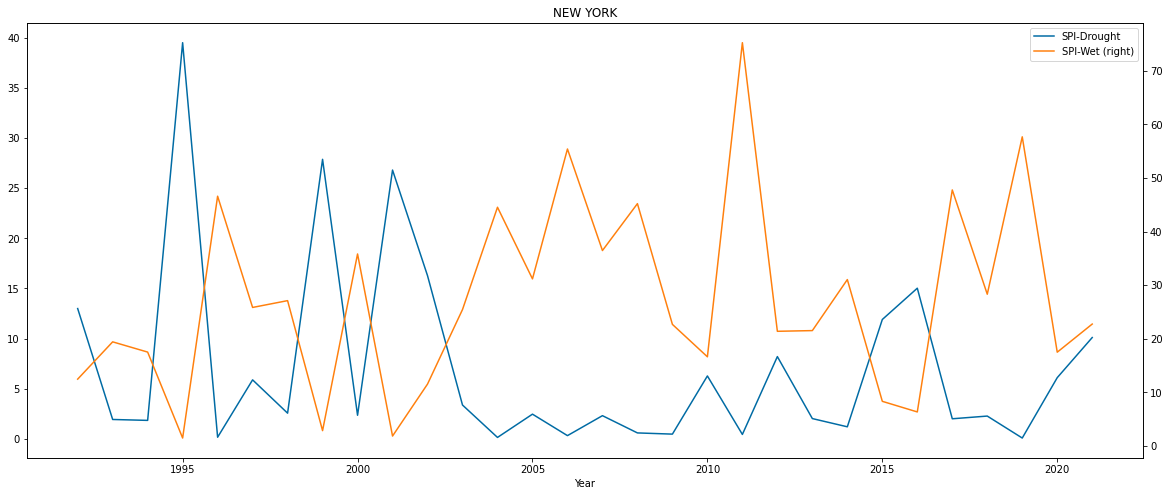

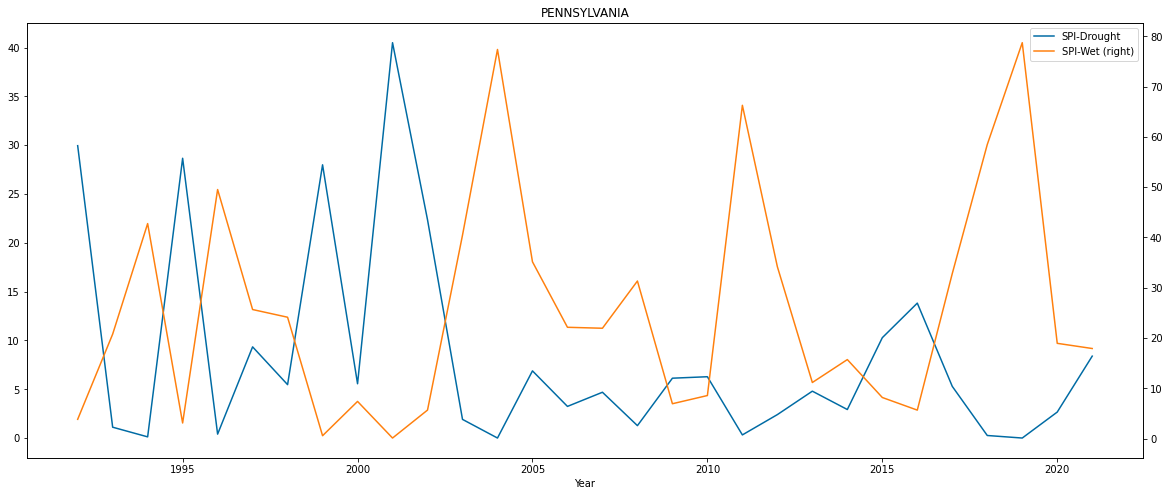

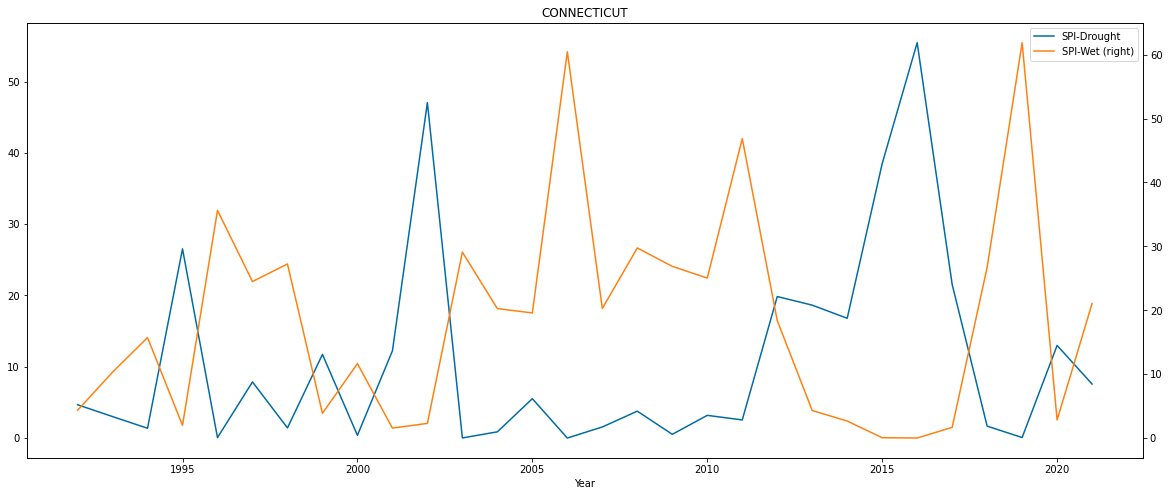

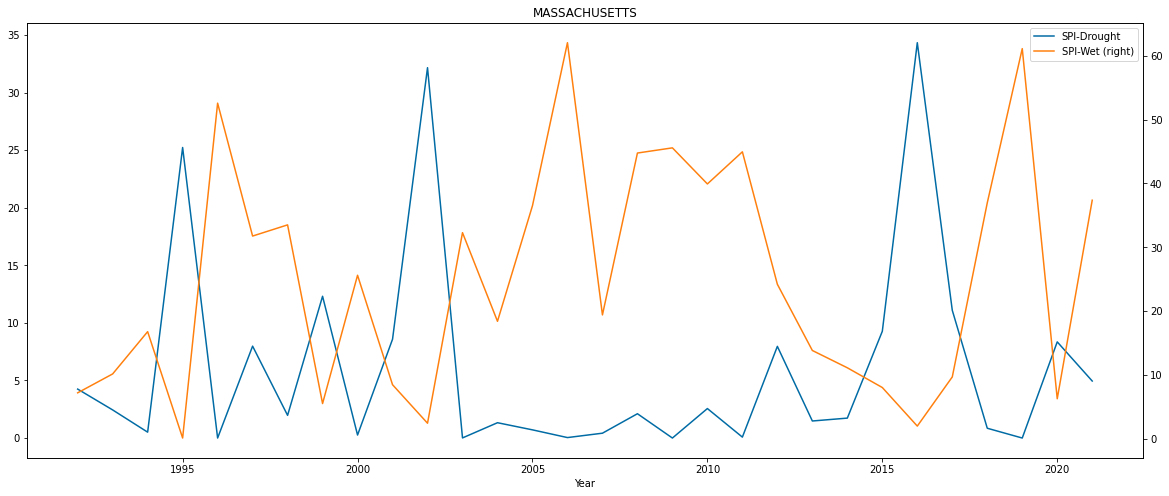

In [ ]:
for i in maple.State.unique():
  stateplot1(i)

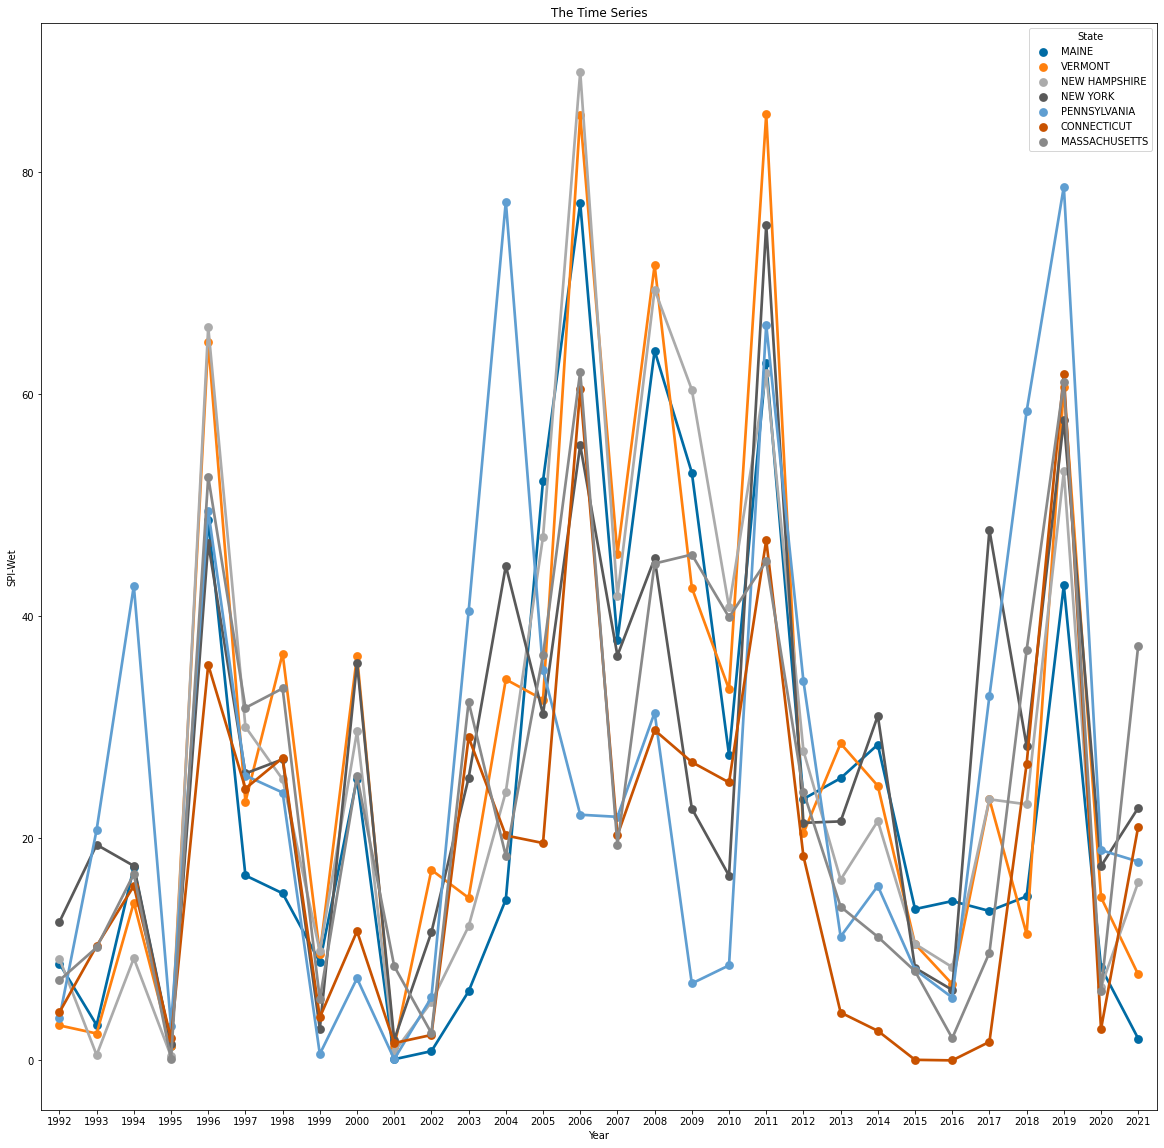

In [ ]:
plt.figure(figsize=(20,20))
plt.title('The Time Series')
sns.pointplot(x='Year',y='SPI-Wet',hue='State',data=maple);

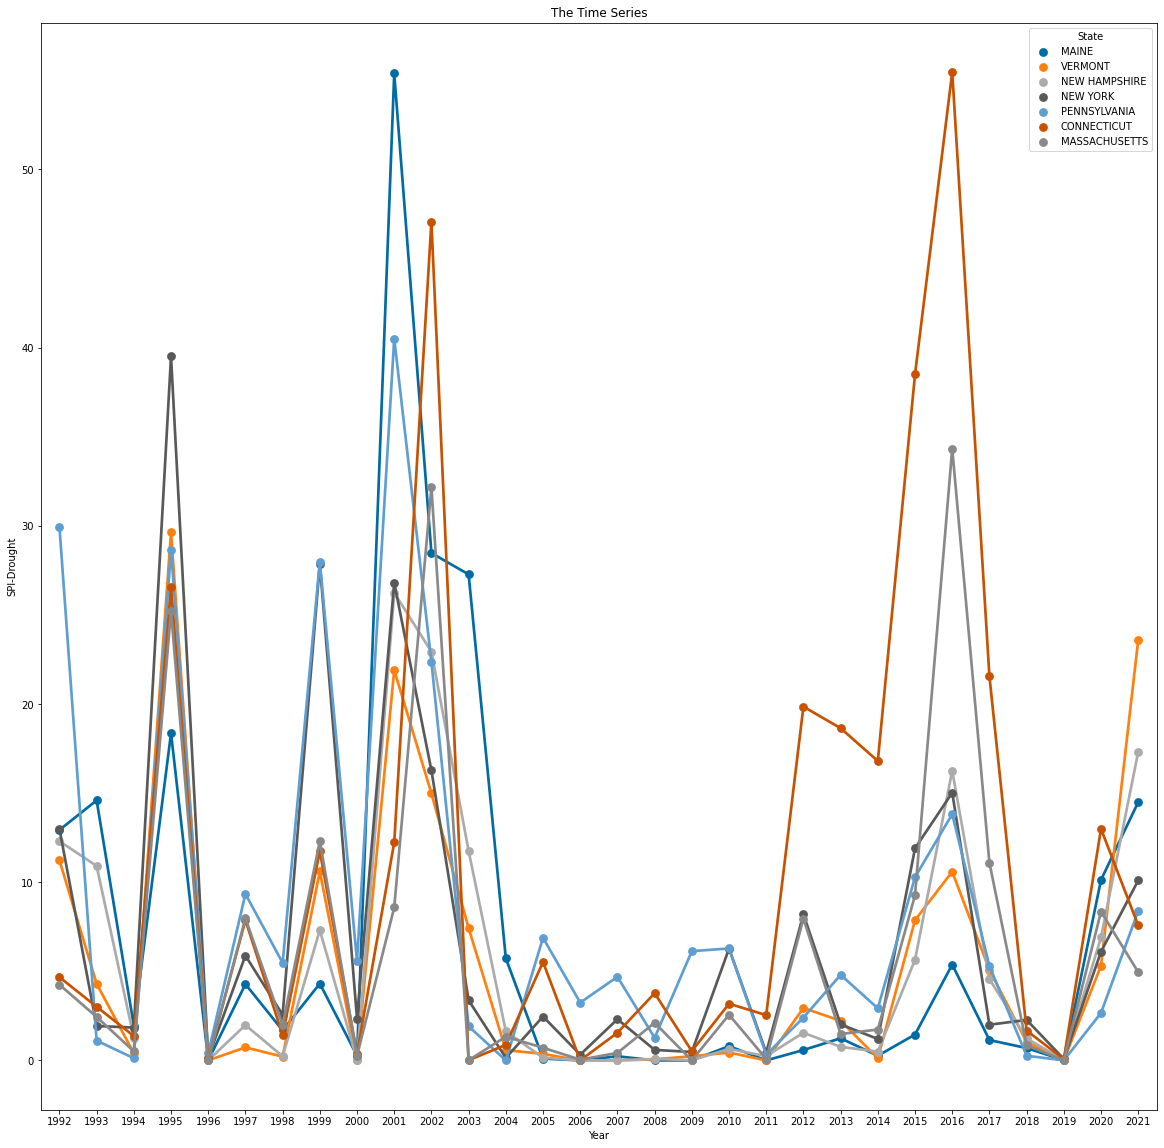

In [ ]:
# early 2000s Maine, Mass, Connect
# mid2000s similar levels
# 2010s Connect and Mass different than rest
plt.figure(figsize=(20,20))
plt.title('The Time Series')
sns.pointplot(x='Year',y='SPI-Drought',hue='State',data=maple);

- In early 2000s Maine, Massachusetts, Connecticut had highest drought levels
- In mid-2000s all northeast states had similar levels
- In 2010s Connecticut and Massachusetts were the leading states with highest levels of drought than rest
- In 2021 the trend of high levels of drought seems to be on the rise for all New England states 

#**3. Regressions**




*   Regressions on each state 
*   Regressions on all states 
*   Lag-effect regression on all states 





##3.1 Regression on each state

###Linearity Check

We first did linearity checks to try to eyeball the dataset. For some variables such as ‘Yield per Taps’ and ‘Number of Taps’, the relationship with our target variable ‘Gallons’ is actually obviously linear. This is because maple syrup production is calculated by multiplying yield per taps with the number of taps. However, for other variables such as ‘SPI Wet’ and ‘Avg Temperature’, the linearity relationship is not that obvious. Further regression analysis should be made to investigate the real relationship between them.


In [ ]:
maple = maple.rename(columns={'Precipitation (6-Months)': 'Precipitation_six_month','Precipitation (1-Year)': 'Precipitation_one_year',
                              'Avg. Temperature (6-Months)': 'Avg.Temperature_six_month','Avg. Temperture (1-Year)': 'Avg.Temperature_one_year'})

In [ ]:
columns_check = ['Avg.Temperature_one_year', 'Avg.Temperature_six_month',
       'Precipitation_one_year', 'Precipitation_six_month', 'none', 'D0', 'D1',
       'D2', 'D3', 'D4', 'DSCI', 'SPI-Drought', 'SPI-Wet', 'EMNT(in air)',
       'EMXT(in air)', 'Number of Taps', 'Yield per Tap']

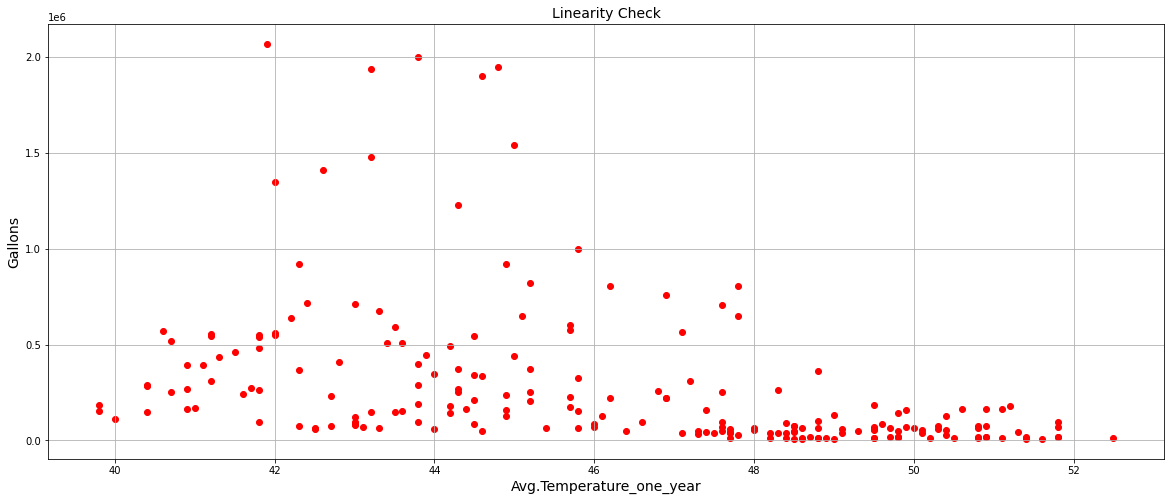

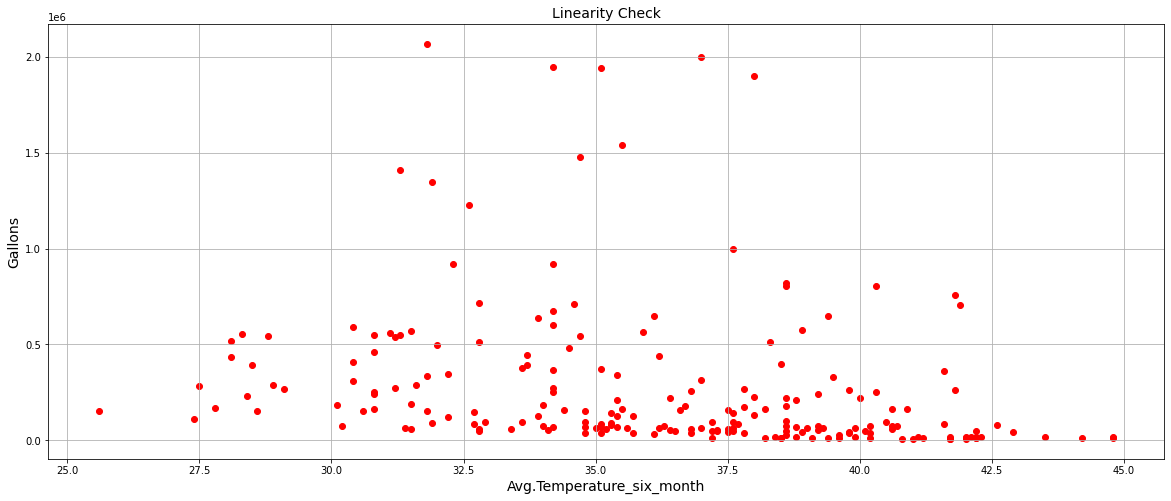

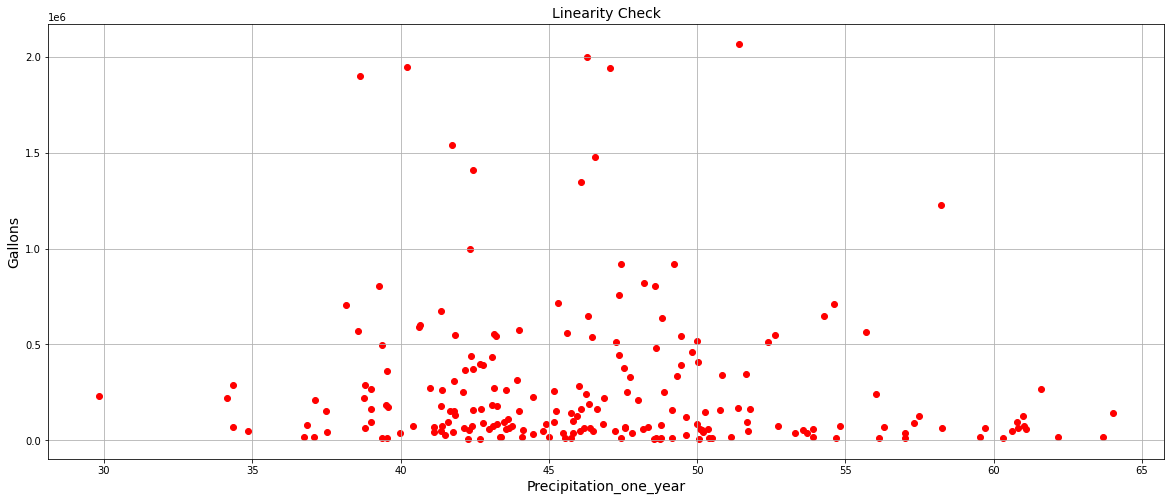

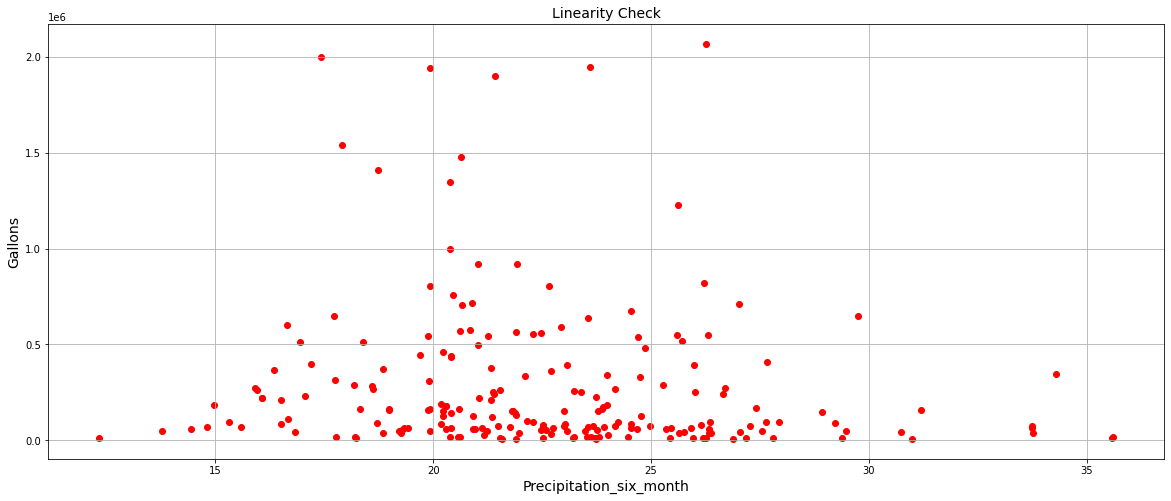

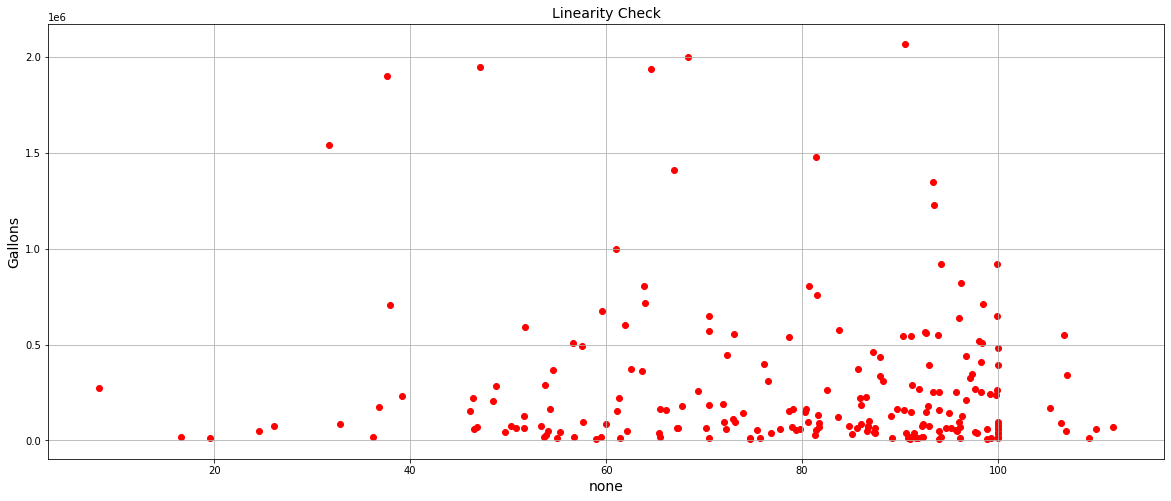

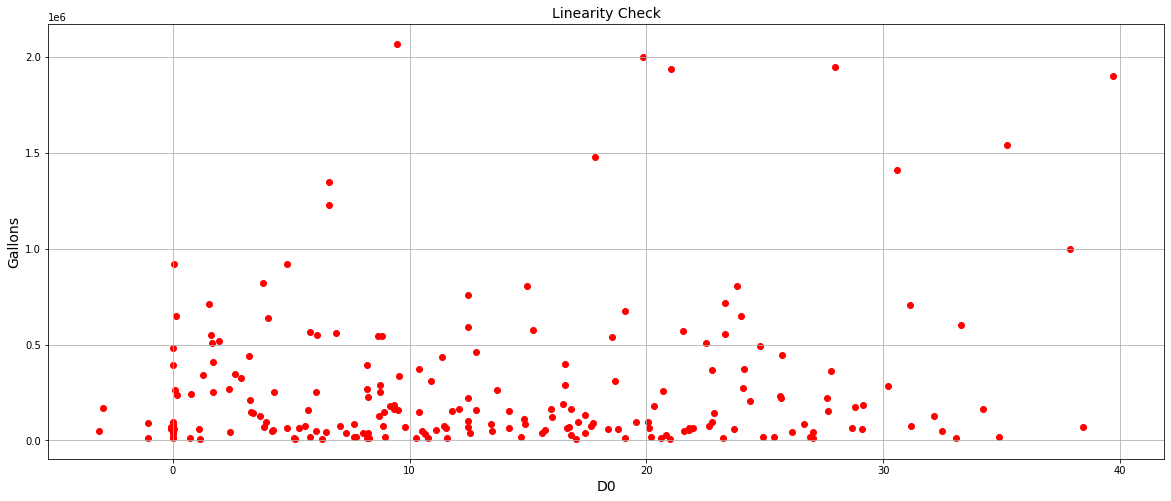

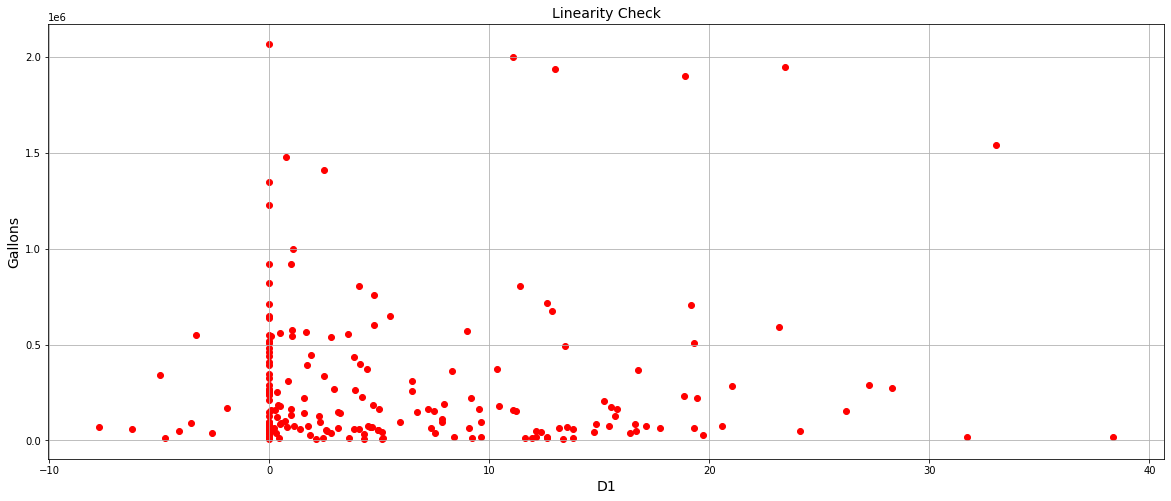

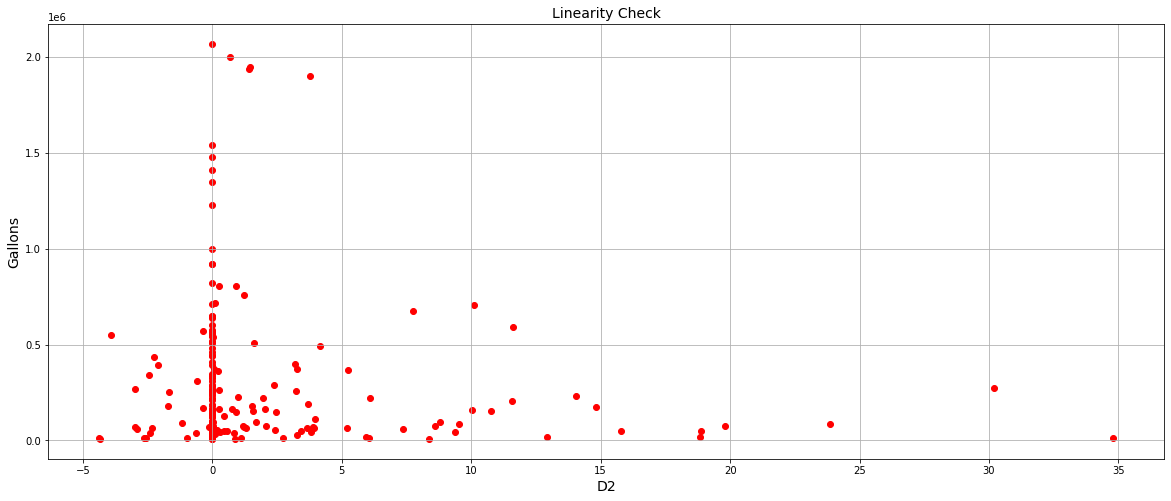

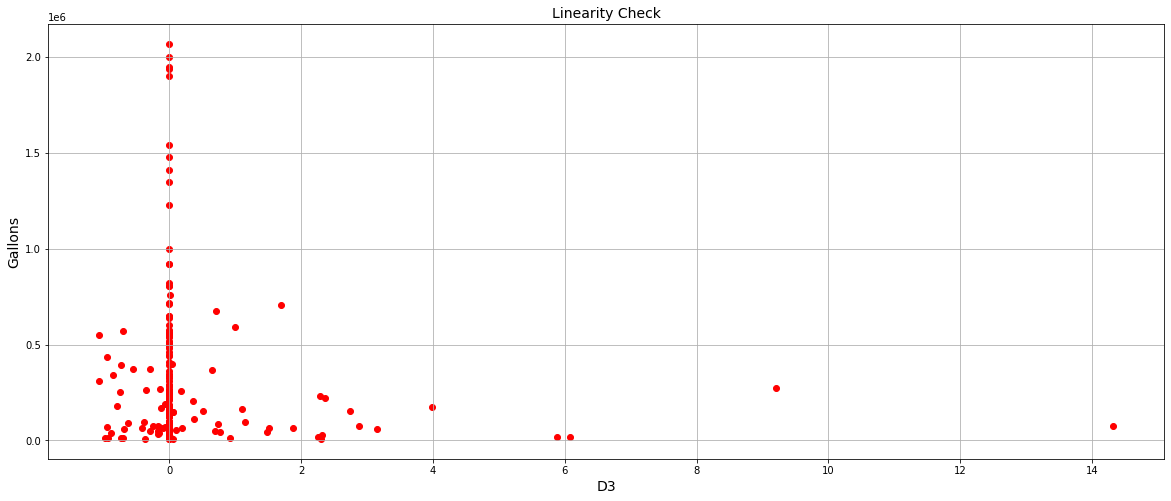

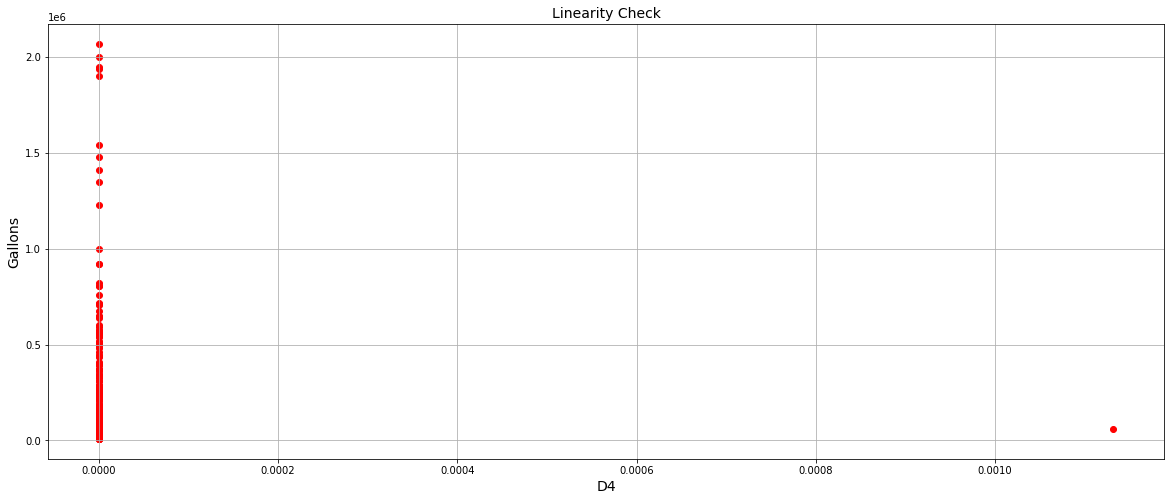

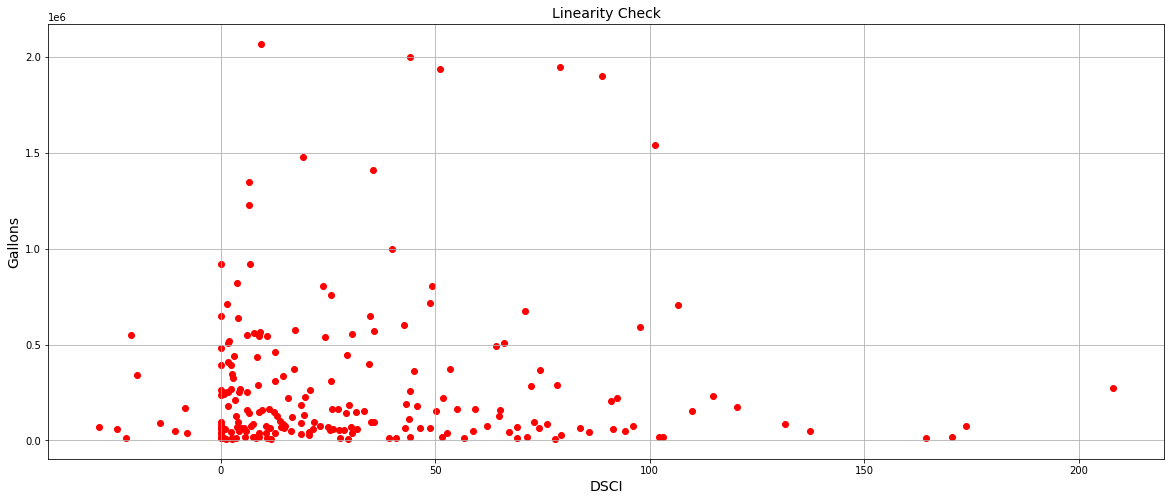

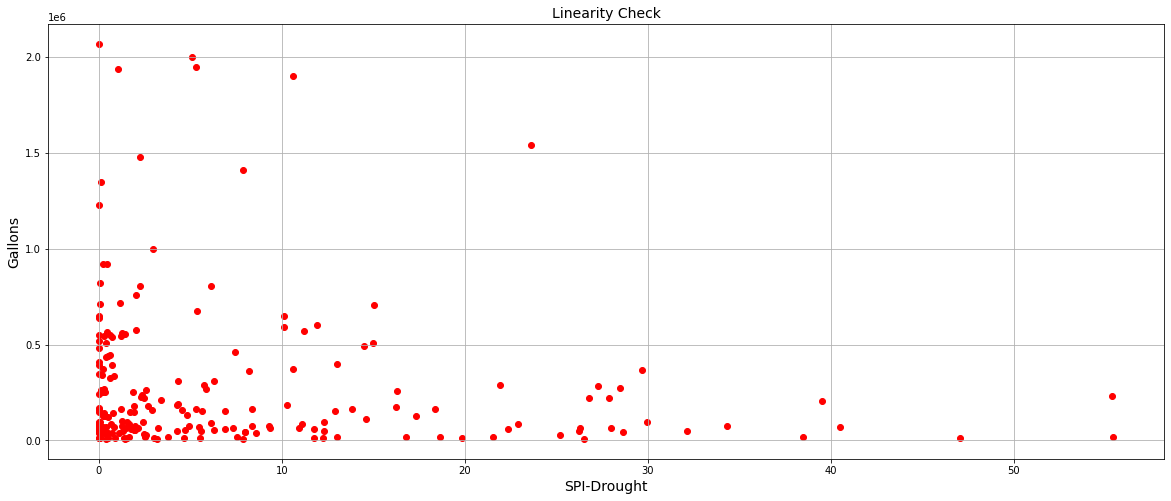

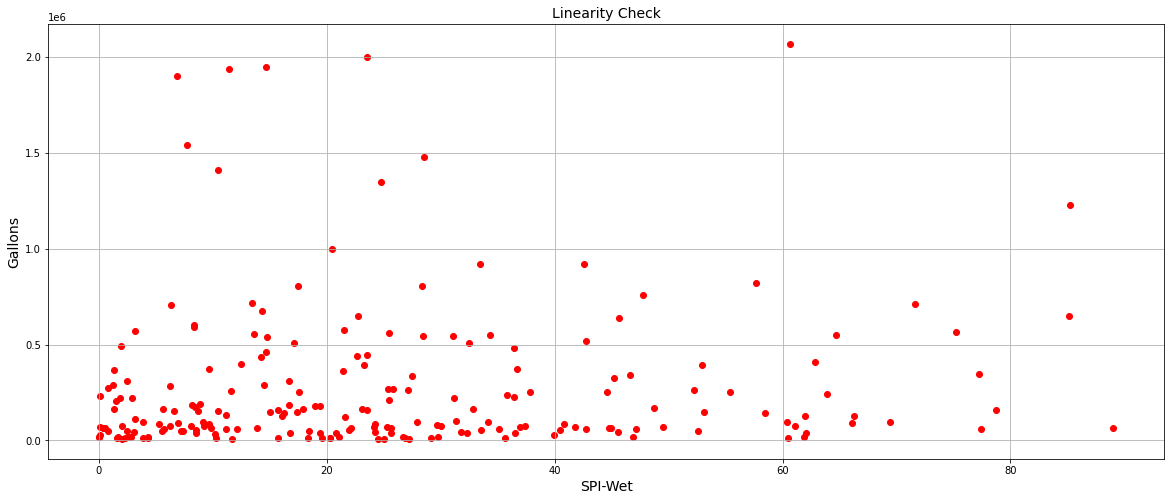

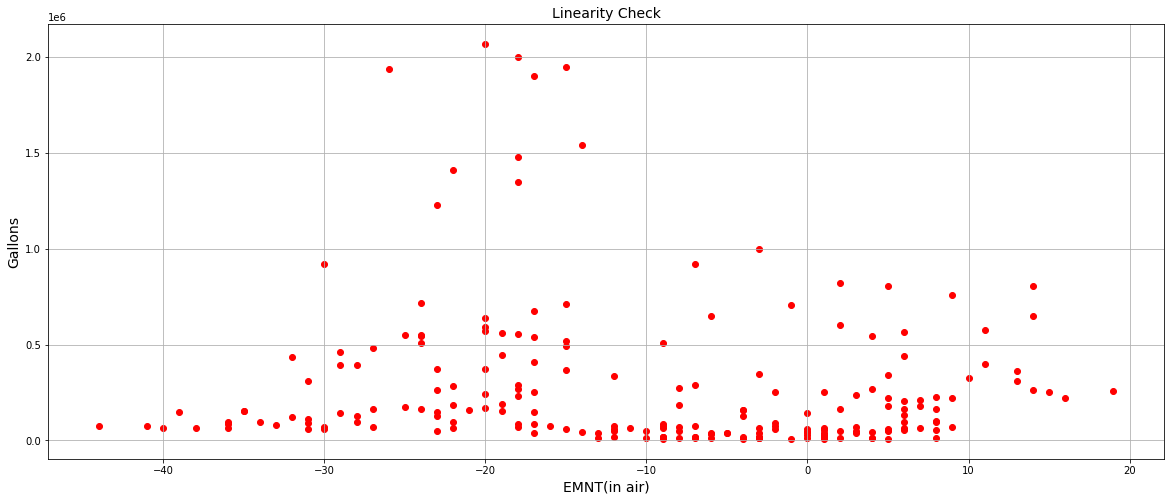

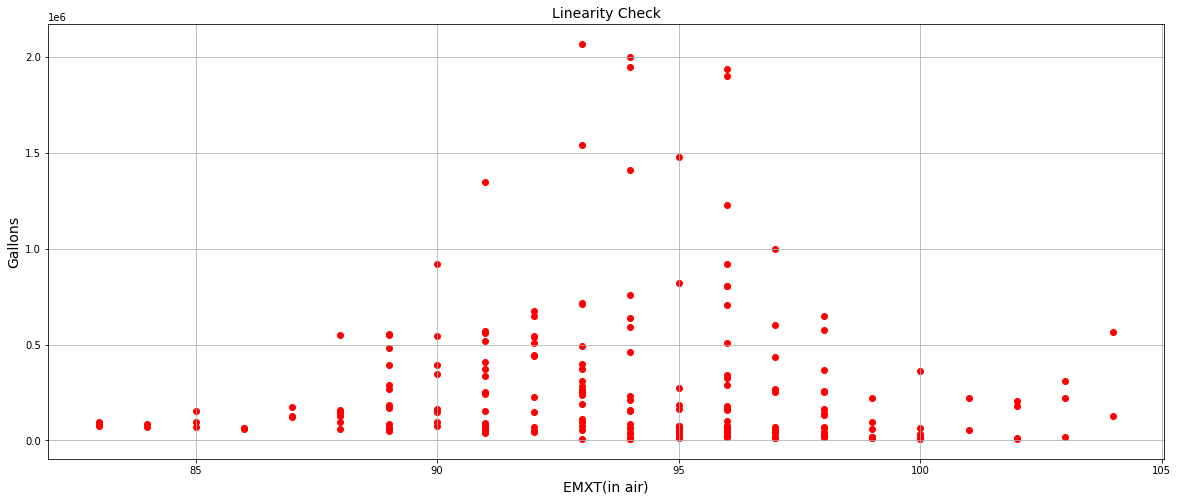

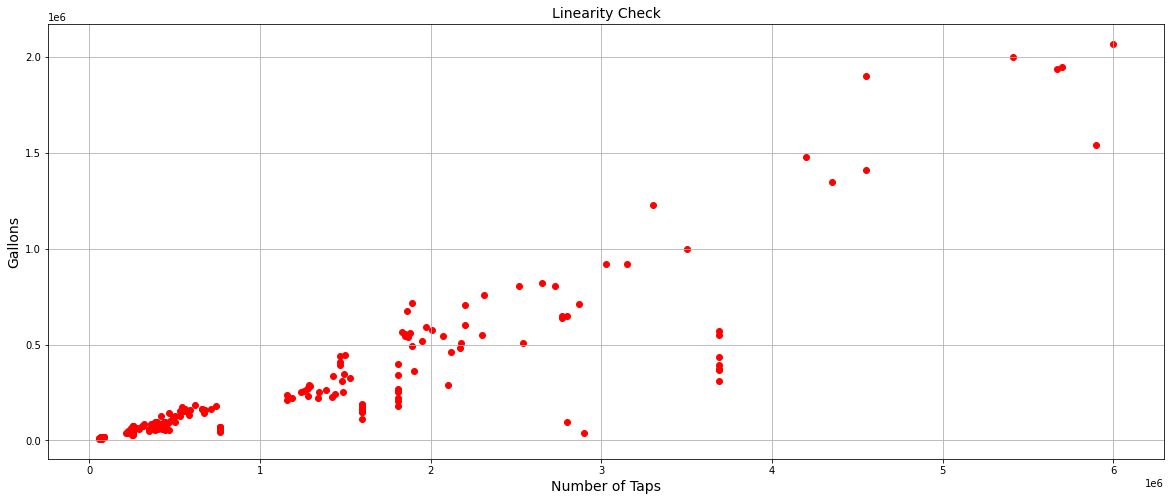

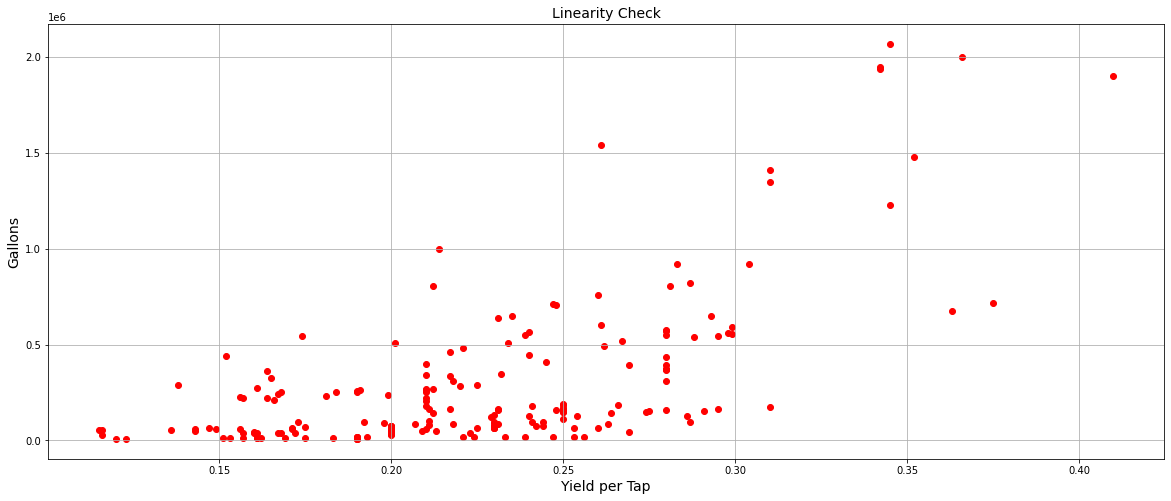

In [ ]:
for i in columns_check :
  plt.scatter(maple[i], maple['Gallons'], color='red')
  plt.title('Linearity Check', fontsize=14)
  plt.xlabel(i, fontsize=14)
  plt.ylabel('Gallons', fontsize=14)
  plt.grid(True)
  plt.show()

### Regression

We ran the regression with the whole year temerapture and precipitation as well as the half year(from last year's September to next's years' Feburary)，bt according to the R square comparison table, the lag effect does not give us better result. Thus, we decided to continue without the lag effect. 

####1.State-level: Whole year temerature and precipitation

In [ ]:
! pip install regressors

  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12401 sha256=40d71981bc98f428f7222b4cfe27666410ea5d7fed7f96f19e5960ab87d63ee1
  Stored in directory: /root/.cache/pip/wheels/5e/84/7d/c7f674a24c508709cdd3aa6cf0f129899f21061b2821ceed32
Successfully built regressors


In [ ]:
columns_check_12 = ['Avg.Temperature_one_year', 'Precipitation_one_year',  'none', 'D0', 'D1',
       'D2', 'D3', 'DSCI', 'SPI-Drought', 'SPI-Wet', 'EMNT(in air)',
       'EMXT(in air)']

In [ ]:
columns_check_6 =  ['Avg.Temperature_six_month','Precipitation_six_month',  'none', 'D0', 'D1',
       'D2', 'D3', 'DSCI', 'SPI-Drought', 'SPI-Wet', 'EMNT(in air)',
       'EMXT(in air)']

In [ ]:
def lin_gp(state = 'MAINE'):
  df = maple[maple['State'] == state]
  x = df.drop(columns=['Gallons','Year','Value','State','State ANSI','D4','Precipitation_six_month','Avg.Temperature_six_month','Number of Taps','Yield per Tap'])
  x = sm.add_constant(x)
  y = df.Gallons.values.tolist()
  x = sm.add_constant(x)
  result = sm.OLS(y, x).fit()
  print(result.summary())

In [ ]:
lin_gp("MASSACHUSETTS")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     1.849
Date:                Sun, 01 May 2022   Prob (F-statistic):              0.120
Time:                        20:42:27   Log-Likelihood:                -320.16
No. Observations:                  30   AIC:                             666.3
Df Residuals:                      17   BIC:                             684.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lin_gp("VERMONT")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     4.595
Date:                Sun, 01 May 2022   Prob (F-statistic):            0.00230
Time:                        20:42:27   Log-Likelihood:                -419.31
No. Observations:                  30   AIC:                             864.6
Df Residuals:                      17   BIC:                             882.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lin_gp('NEW HAMPSHIRE')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     5.718
Date:                Sun, 01 May 2022   Prob (F-statistic):           0.000656
Time:                        20:42:27   Log-Likelihood:                -333.72
No. Observations:                  30   AIC:                             693.4
Df Residuals:                      17   BIC:                             711.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lin_gp('NEW YORK')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1.919
Date:                Sun, 01 May 2022   Prob (F-statistic):              0.107
Time:                        20:42:27   Log-Likelihood:                -397.31
No. Observations:                  30   AIC:                             820.6
Df Residuals:                      17   BIC:                             838.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lin_gp('PENNSYLVANIA')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                 -0.064
Method:                 Least Squares   F-statistic:                    0.8552
Date:                Sun, 01 May 2022   Prob (F-statistic):              0.601
Time:                        20:42:27   Log-Likelihood:                -357.80
No. Observations:                  30   AIC:                             741.6
Df Residuals:                      17   BIC:                             759.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lin_gp('CONNECTICUT')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     1.412
Date:                Sun, 01 May 2022   Prob (F-statistic):              0.251
Time:                        20:42:27   Log-Likelihood:                -278.58
No. Observations:                  30   AIC:                             583.2
Df Residuals:                      17   BIC:                             601.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
lin_gp('MAINE')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     1.583
Date:                Sun, 01 May 2022   Prob (F-statistic):              0.188
Time:                        20:42:27   Log-Likelihood:                -392.85
No. Observations:                  30   AIC:                             811.7
Df Residuals:                      17   BIC:                             829.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

####2.State level- Regression considering growing seasons



In [ ]:
from sklearn.linear_model import LinearRegression
from regressors import stats
def lin_gp2(state = 'MAINE'):
  df = maple[maple['State'] == state]
  x = df.drop(columns=['Gallons','Year','Value','State','State ANSI','D4','Precipitation_one_year','Avg.Temperature_one_year','Number of Taps','Yield per Tap'])
  y = df.Gallons.values.tolist()
  x = sm.add_constant(x)
  result = sm.OLS(y, x).fit()
  print(result.summary())

In [ ]:
lin_gp2("MASSACHUSETTS")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     2.339
Date:                Sun, 01 May 2022   Prob (F-statistic):             0.0535
Time:                        20:42:28   Log-Likelihood:                -318.07
No. Observations:                  30   AIC:                             662.1
Df Residuals:                      17   BIC:                             680.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lin_gp2("VERMONT")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     4.476
Date:                Sun, 01 May 2022   Prob (F-statistic):            0.00265
Time:                        20:42:28   Log-Likelihood:                -419.61
No. Observations:                  30   AIC:                             865.2
Df Residuals:                      17   BIC:                             883.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lin_gp2('NEW HAMPSHIRE')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     4.568
Date:                Sun, 01 May 2022   Prob (F-statistic):            0.00237
Time:                        20:42:28   Log-Likelihood:                -336.36
No. Observations:                  30   AIC:                             698.7
Df Residuals:                      17   BIC:                             716.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lin_gp2('NEW YORK')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     1.786
Date:                Sun, 01 May 2022   Prob (F-statistic):              0.133
Time:                        20:42:28   Log-Likelihood:                -397.92
No. Observations:                  30   AIC:                             821.8
Df Residuals:                      17   BIC:                             840.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lin_gp2('PENNSYLVANIA')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     1.533
Date:                Sun, 01 May 2022   Prob (F-statistic):              0.205
Time:                        20:42:28   Log-Likelihood:                -353.88
No. Observations:                  30   AIC:                             733.8
Df Residuals:                      17   BIC:                             752.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lin_gp2('CONNECTICUT')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.070
Date:                Sun, 01 May 2022   Prob (F-statistic):              0.438
Time:                        20:42:28   Log-Likelihood:                -280.51
No. Observations:                  30   AIC:                             587.0
Df Residuals:                      17   BIC:                             605.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
lin_gp2("MAINE")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     1.499
Date:                Sun, 01 May 2022   Prob (F-statistic):              0.217
Time:                        20:42:28   Log-Likelihood:                -393.27
No. Observations:                  30   AIC:                             812.5
Df Residuals:                      17   BIC:                             830.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

####3. Regression with lag effect

In [ ]:
# Feature columns to play with lag effect
col_lag = ['Avg.Temperature_one_year', 'Avg.Temperature_six_month',
       'Precipitation_one_year', 'Precipitation_six_month','DSCI']
# Create data for lag-effect analysis
maple_lag = maple.copy()

# Create function to generate data
def lag_data(state_val):
  df_temp = maple_lag[maple_lag['State'] == state_val]
  for i in col_lag:
    df_temp["Lag_{}".format(i)] = df_temp[i].shift(1)
  return df_temp

In [ ]:
# Finalize the lag_effect dataset
d1 = lag_data('MAINE')
d2 = lag_data('VERMONT')
d3 = lag_data('NEW HAMPSHIRE')
d4 = lag_data('NEW YORK')
d5 = lag_data('PENNSYLVANIA')
d6 = lag_data('CONNECTICUT')
d7 = lag_data('MASSACHUSETTS')

df_lag = pd.concat([d1,d2,d3,d4,d5,d6,d7])
df_lag = df_lag.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
# Feature combination for lag_effect analysis
# Focus on one_year Temprature/Percipitation
lg1 = ['Avg.Temperature_one_year', 'Precipitation_one_year',  'none', 'D0', 'D1',
       'D2', 'D3', 'DSCI', 'SPI-Drought', 'SPI-Wet', 'EMNT(in air)',
       'EMXT(in air)']

lg2 = ['Lag_Avg.Temperature_one_year', 'Precipitation_one_year',  'none', 'D0', 'D1',
       'D2', 'D3', 'DSCI', 'SPI-Drought', 'SPI-Wet', 'EMNT(in air)',
       'EMXT(in air)']

lg3 = ['Avg.Temperature_one_year', 'Lag_Precipitation_one_year',  'none', 'D0', 'D1',
       'D2', 'D3', 'DSCI', 'SPI-Drought', 'SPI-Wet', 'EMNT(in air)',
       'EMXT(in air)']

lg4 = ['Lag_Avg.Temperature_one_year', 'Lag_Precipitation_one_year',  'none', 'D0', 'D1',
       'D2', 'D3', 'DSCI', 'SPI-Drought', 'SPI-Wet', 'EMNT(in air)',
       'EMXT(in air)']

# Focus on six_month Temprature/Percipitation
lg5 = ['Avg.Temperature_six_month', 'Precipitation_six_month',  'none', 'D0', 'D1',
       'D2', 'D3', 'DSCI', 'SPI-Drought', 'SPI-Wet', 'EMNT(in air)',
       'EMXT(in air)']

lg6 = ['Lag_Avg.Temperature_six_month', 'Precipitation_six_month',  'none', 'D0', 'D1',
       'D2', 'D3', 'DSCI', 'SPI-Drought', 'SPI-Wet', 'EMNT(in air)',
       'EMXT(in air)']

lg7 = ['Avg.Temperature_six_month', 'Lag_Precipitation_six_month',  'none', 'D0', 'D1',
       'D2', 'D3', 'DSCI', 'SPI-Drought', 'SPI-Wet', 'EMNT(in air)',
       'EMXT(in air)']

lg8 = ['Lag_Avg.Temperature_six_month', 'Lag_Precipitation_six_month',  'none', 'D0', 'D1',
       'D2', 'D3', 'DSCI', 'SPI-Drought', 'SPI-Wet', 'EMNT(in air)',
       'EMXT(in air)']

In [ ]:
def lin_gp(lg_feature):
  df = df_lag
  x = df[lg_feature]
  x = sm.add_constant(x)
  y = df.Gallons.values.tolist()
  x = sm.add_constant(x)
  result = sm.OLS(y, x).fit()
  return result.rsquared

In [ ]:
val = {}
# Compare r_2 value:
for i,j in enumerate([lg1,lg2,lg3,lg4,lg5,lg6,lg7,lg8]):
  val['reg_{}'.format(i+1)] = lin_gp(j)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
val = pd.DataFrame(val,index=[0])
val

reg_1     reg_2     reg_3     reg_4     reg_5    reg_6     reg_7  \
0  0.459112  0.370491  0.466921  0.388108  0.317437  0.30054  0.303148   

      reg_8  
0  0.272252

### Feature Selection

After this step we deicded to eliminate several variables that returned very high P-values in the previous regression. After checking the significance of these features, we decided to eliminate D1, D2, D3, D4 and DSCI. Then we reran the regression. Now vairables D0 and SPI drought both became significant. 

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(state = 'MAINE'):
  df = maple[maple['State'] == state]
  x_temp = sm.add_constant(df[columns_check])
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
  vif["features"] = x_temp.columns
  print(vif.round(1))

In [ ]:
vif('MAINE')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


      VIF Factor                   features
0   1.860953e+11                      const
1   3.700000e+00   Avg.Temperature_one_year
2   5.000000e+00  Avg.Temperature_six_month
3   1.140000e+01     Precipitation_one_year
4   8.800000e+00    Precipitation_six_month
5   8.767573e+09                       none
6            inf                         D0
7            inf                         D1
8            inf                         D2
9            inf                         D3
10           NaN                         D4
11           inf                       DSCI
12  1.490000e+01                SPI-Drought
13  1.740000e+01                    SPI-Wet
14  4.200000e+00               EMNT(in air)
15  4.200000e+00               EMXT(in air)
16  5.600000e+00             Number of Taps
17  6.800000e+00              Yield per Tap


In [ ]:
def lin_gp3(state = 'MAINE'):
  df = maple[maple['State'] == state]
  x = df.drop(columns=['Gallons','Year','Value','State','State ANSI','D4','Precipitation_six_month','Avg.Temperature_six_month','Number of Taps','Yield per Tap','DSCI','D1','D2','D3'])
  y = df.Gallons.values.tolist()
  x = sm.add_constant(x)
  result = sm.OLS(y, x).fit()
  print(result.summary())

In [ ]:
lin_gp('MAINE')

KeyError: ignored

In [ ]:
lin_gp3('MAINE')

## 3.2 Multivariate Regression

In [ ]:
# Creating lists of variables to use in regressions (didn't use growing season temp and one year precipitation as that didn't help our analysis)

avg_temp_and_pre  = ['Avg.Temperature_one_year', 'Precipitation_six_month', 'none', 'D0', 'D1', 'D2', 'D2', 'D3', 'D4', 'DSCI', 'SPI-Drought',
        'SPI-Wet', 'EMNT(in air)', 'EMXT(in air)', 'Gallons']

In [ ]:
maple_all = maple[avg_temp_and_pre]

In [ ]:
# Regression with all variables 

x = maple_all.drop(columns = ['Gallons'])
x = sm.add_constant(x)
y = maple_all['Gallons']
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

The combined regression indicate that our independent variables explain around 44% of the variability of the maple syrup production in gallons. Moreover, looking at our P-values, we can see that only average temperature, precipitation, SPI values, and extreme max temperature are significant. Lastly, temperature has more correlation compared to precipitation on production. 